**Dataset Description**

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate

**objective**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\data.xlsx - Sheet1.csv")

In [3]:
data.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
data.tail()

Unnamed: 0      ID    Salary           DOJ           DOL  \
3993      train   47916  280000.0  10/1/11 0:00  10/1/12 0:00   
3994      train  752781  100000.0   7/1/13 0:00   7/1/13 0:00   
3995      train  355888  320000.0   7/1/13 0:00       present   
3996      train  947111  200000.0   7/1/14 0:00   1/1/15 0:00   
3997      train  324966  400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage  ... ComputerScience  MechanicalEngg  ElectricalEngg  \
3993         52.09  ...              -1              -1              -1   
3994         90.00  ...              -1              -1              -1   
3995         81.86  ...              -1              -1              -1   
3996         78.72  ...             438              -1              -1   
3997         70.60  ...              -1              -1              -1   

     TelecomEngg  CivilEngg  conscientiousness agreeableness extraversion  \
3993          -1         -1            -0.1082        0.3448       0.2366   
3994          -1         -1            -0.3027        0.8784       0.9322   
3995          -1         -1            -1.5765       -1.5273      -1.5051   
3996          -1         -1            -0.1590        0.0459      -0.4511   
3997          -1         -1            -1.1128       -0.2793      -0.6343   

      nueroticism  openess_to_experience  
3993      0.64980                -0.9194  
3994      0.77980                -0.0943  
3995     -1.31840                -0.7615  
3996     -0.36120                -0.0943  
3997      1.32553                -0.6035  

[5 rows x 39 columns]

In [5]:
data.shape

(3998, 39)

In [6]:
data.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [8]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [9]:
data.duplicated().sum()

0

In [10]:
data.nunique()

Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [11]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [12]:
data['ID']

0       203097
1       579905
2       810601
3       267447
4       343523
         ...  
3993     47916
3994    752781
3995    355888
3996    947111
3997    324966
Name: ID, Length: 3998, dtype: int64

In [13]:
data['CollegeCityID']

0        1141
1        5807
2          64
3        6920
4       11368
        ...  
3993     6268
3994     4883
3995     9786
3996      979
3997     6609
Name: CollegeCityID, Length: 3998, dtype: int64

In [14]:
data['CollegeID']

0        1141
1        5807
2          64
3        6920
4       11368
        ...  
3993     6268
3994     4883
3995     9786
3996      979
3997     6609
Name: CollegeID, Length: 3998, dtype: int64

# Data Cleaning

In [15]:
data=data.drop(['Unnamed: 0','CollegeID','CollegeCityID'],axis=1)

In [16]:
data

ID     Salary           DOJ           DOL  \
0     203097   420000.0   6/1/12 0:00       present   
1     579905   500000.0   9/1/13 0:00       present   
2     810601   325000.0   6/1/14 0:00       present   
3     267447  1100000.0   7/1/11 0:00       present   
4     343523   200000.0   3/1/14 0:00   3/1/15 0:00   
...      ...        ...           ...           ...   
3993   47916   280000.0  10/1/11 0:00  10/1/12 0:00   
3994  752781   100000.0   7/1/13 0:00   7/1/13 0:00   
3995  355888   320000.0   7/1/13 0:00       present   
3996  947111   200000.0   7/1/14 0:00   1/1/15 0:00   
3997  324966   400000.0   2/1/13 0:00       present   

                      Designation           JobCity Gender           DOB  \
0         senior quality engineer         Bangalore      f  2/19/90 0:00   
1               assistant manager            Indore      m  10/4/89 0:00   
2                systems engineer           Chennai      f   8/3/92 0:00   
3        senior software engineer           Gurgaon      m  12/5/89 0:00   
4                             get           Manesar      m  2/27/91 0:00   
...                           ...               ...    ...           ...   
3993            software engineer        New Delhi       m  4/15/87 0:00   
3994             technical writer         Hyderabad      f  8/27/92 0:00   
3995  associate software engineer         Bangalore      m   7/3/91 0:00   
3996           software developer  Asifabadbanglore      f  3/20/92 0:00   
3997      senior systems engineer           Chennai      f  2/26/91 0:00   

      10percentage                         10board  ...  ComputerScience  \
0            84.30  board ofsecondary education,ap  ...               -1   
1            85.40                            cbse  ...               -1   
2            85.00                            cbse  ...               -1   
3            85.60                            cbse  ...               -1   
4            78.00                            cbse  ...               -1   
...            ...                             ...  ...              ...   
3993         52.09                            cbse  ...               -1   
3994         90.00                     state board  ...               -1   
3995         81.86                      bse,odisha  ...               -1   
3996         78.72                     state board  ...              438   
3997         70.60                            cbse  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg conscientiousness  \
0                 -1             -1           -1        -1            0.9737   
1                 -1             -1           -1        -1           -0.7335   
2                 -1             -1           -1        -1            0.2718   
3                 -1             -1           -1        -1            0.0464   
4                 -1             -1           -1        -1           -0.8810   
...              ...            ...          ...       ...               ...   
3993              -1             -1           -1        -1           -0.1082   
3994              -1             -1           -1        -1           -0.3027   
3995              -1             -1           -1        -1           -1.5765   
3996              -1             -1           -1        -1           -0.1590   
3997              -1             -1           -1        -1           -1.1128   

      agreeableness  extraversion nueroticism  openess_to_experience  
0            0.8128        0.5269     1.35490                -0.4455  
1            0.3789        1.2396    -0.10760                 0.8637  
2            1.7109        0.1637    -0.86820                 0.6721  
3            0.3448       -0.3440    -0.40780                -0.9194  
4           -0.2793       -1.0697     0.09163                -0.1295  
...             ...           ...         ...                    ...  
3993         0.3448        0.2366     0.64980                -0.9

**Type Conversion**

In [17]:
data['DOL'].replace('present','2015-12-31',inplace=True)
data['DOL']=pd.to_datetime(data['DOL'])
data['DOJ']=pd.to_datetime(data['DOJ'])
data['DOB']=pd.to_datetime(data['DOB'])

In [18]:
data.shape

(3998, 36)

In [19]:
data=data.drop(data[(data['DOL']<data['DOJ'])].index)

In [20]:
data.shape

(3958, 36)

# Univariate Analysis

# Numerical Analysis

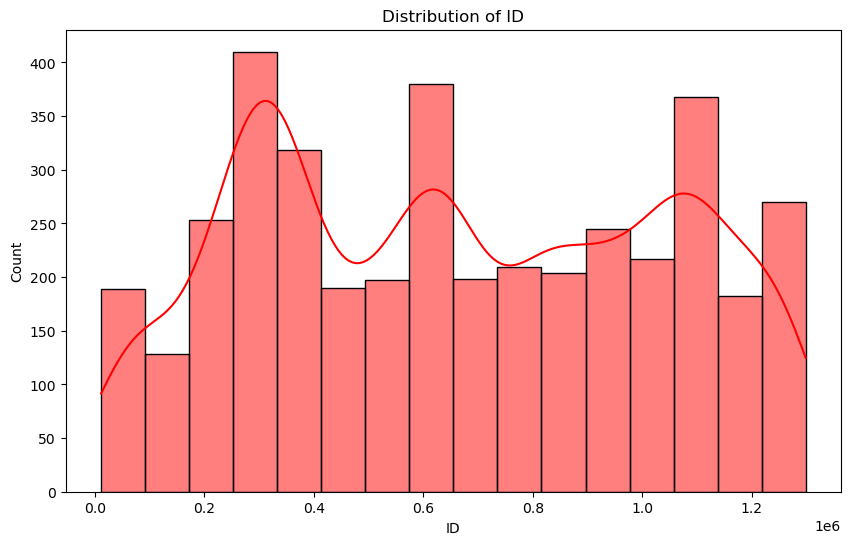

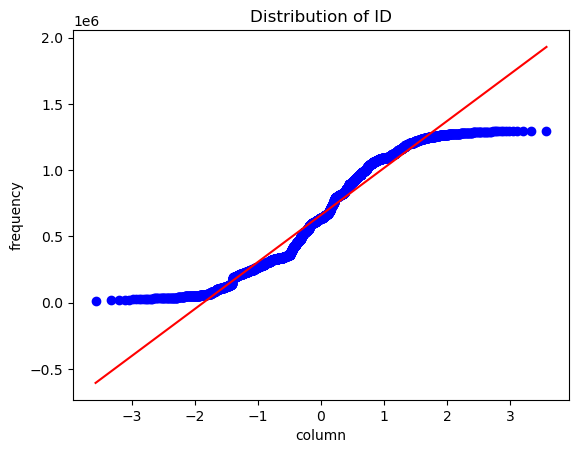

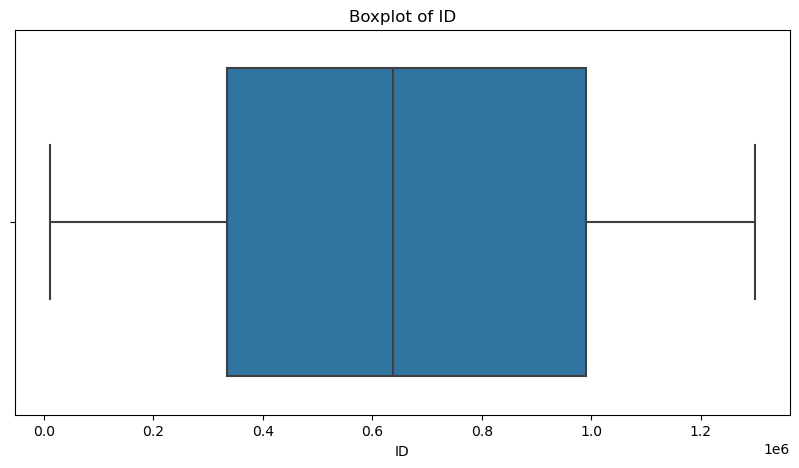

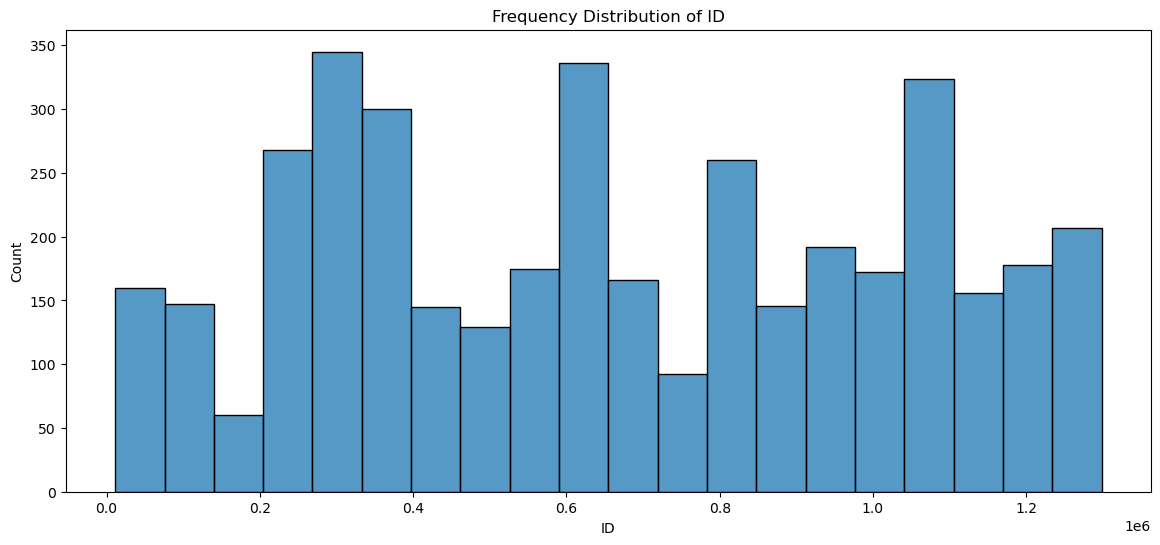

Outliers in ID:
Empty DataFrame
Columns: [ID, Salary, DOJ, DOL, Designation, JobCity, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience]
Index: []

[0 rows x 36 columns]


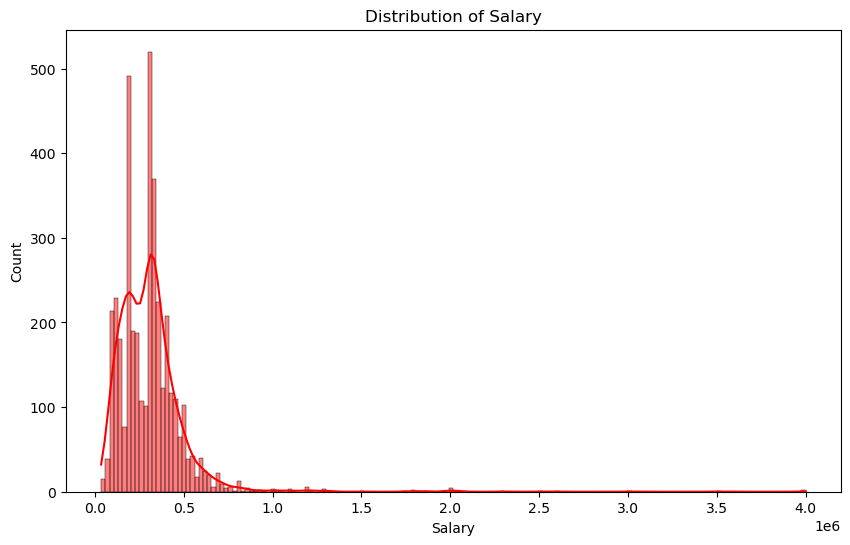

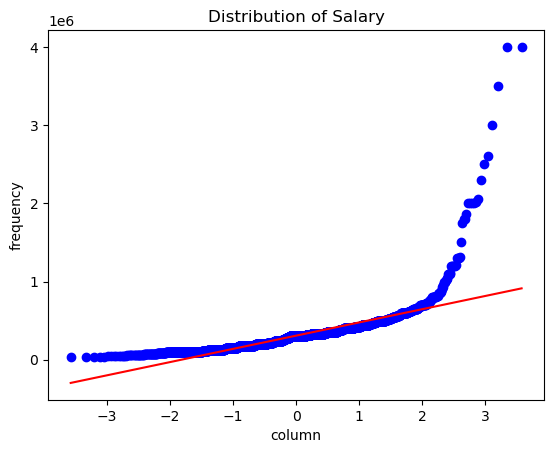

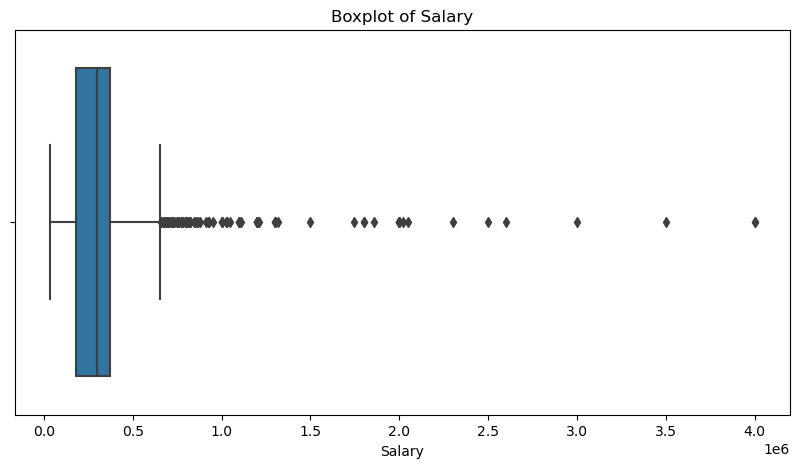

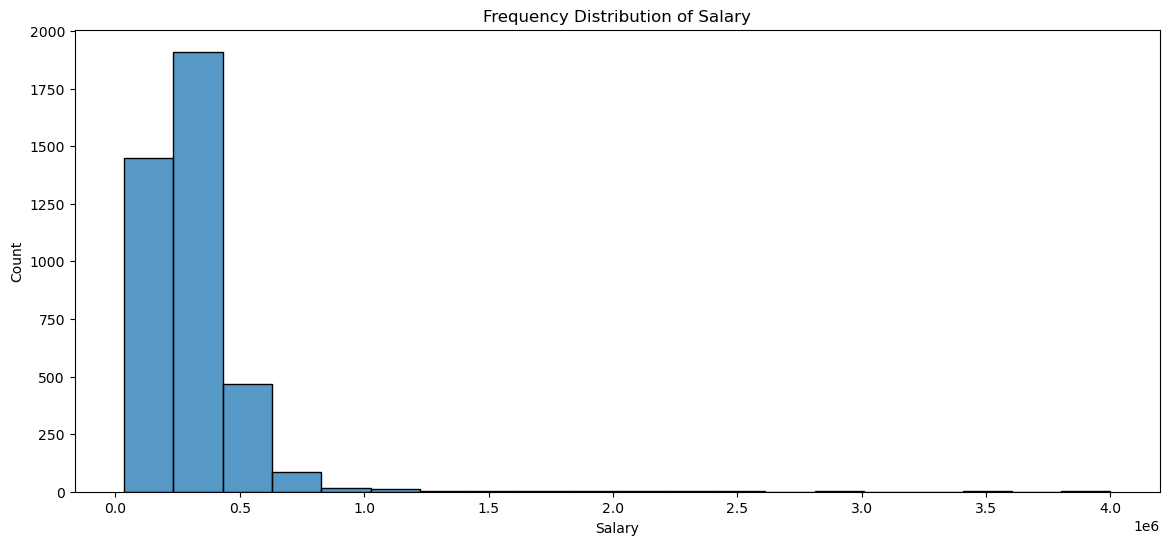

Outliers in Salary:
          ID     Salary        DOJ        DOL                 Designation  \
3     267447  1100000.0 2011-07-01 2015-12-31    senior software engineer   
76    361583   800000.0 2012-06-01 2015-12-31           software engineer   
123   312164  1200000.0 2010-07-01 2011-07-01            engineer trainee   
128   206734   675000.0 2011-11-01 2015-12-31    senior software engineer   
166   323894  1860000.0 2012-07-01 2014-10-01              field engineer   
...      ...        ...        ...        ...                         ...   
3823  918568   775000.0 2014-08-01 2015-12-31  mechanical design engineer   
3904  267121   850000.0 2011-09-01 2015-12-31        operations assistant   
3912  231229   730000.0 2013-07-01 2015-12-31          research scientist   
3961  230702   700000.0 2011-07-01 2014-09-01           planning engineer   
3992  344407   800000.0 2014-04-01 2015-04-01                     manager   

          JobCity Gender        DOB  10percentage      

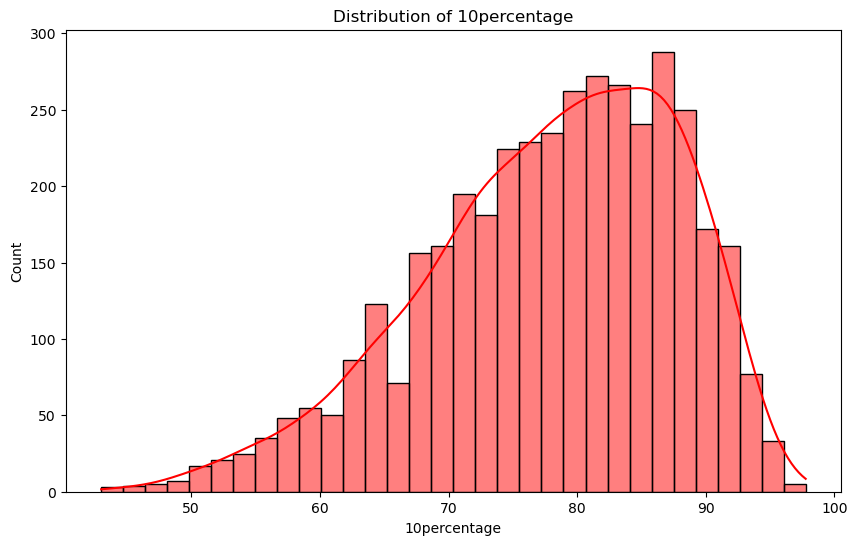

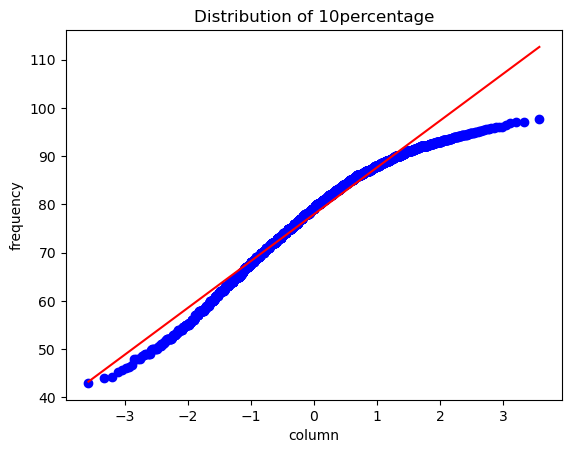

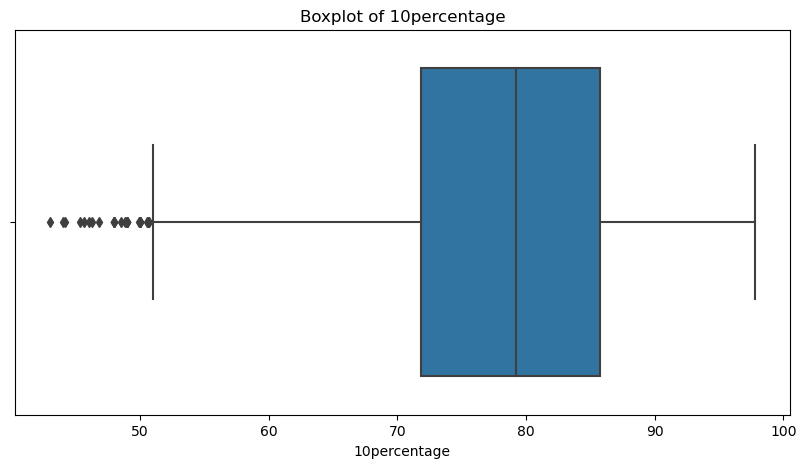

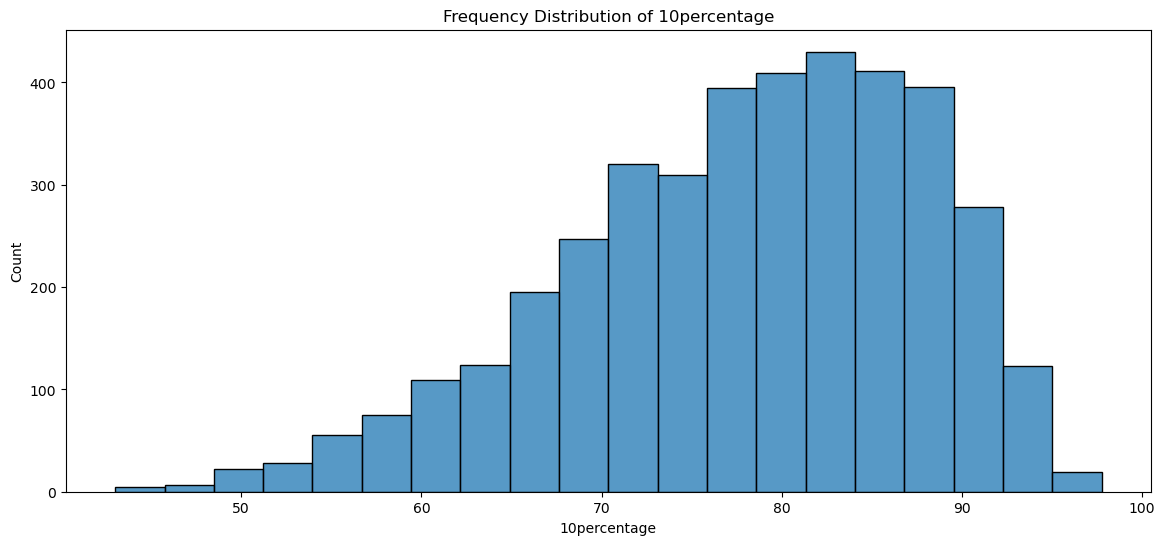

Outliers in 10percentage:
           ID    Salary        DOJ        DOL                  Designation  \
245    984958  285000.0 2014-08-01 2015-04-01   technical support engineer   
466   1245184  215000.0 2015-01-01 2015-04-01           software developer   
490    302937  150000.0 2011-07-01 2012-11-01              design engineer   
491     53838  100000.0 2010-05-01 2011-01-01           software developer   
502   1160766  240000.0 2015-01-01 2015-04-01    electrical field engineer   
600    918414  200000.0 2008-11-01 2012-11-01             project engineer   
613    228081  440000.0 2013-05-01 2015-12-31           operations manager   
898    212005  270000.0 2013-03-01 2015-12-31            asp.net developer   
919   1231953  450000.0 2014-07-01 2015-06-01              system engineer   
1064   277260  250000.0 2011-09-01 2014-12-01               .net developer   
1102   311098  120000.0 2012-12-01 2015-01-01               .net developer   
1169   179878  105000.0 2011-01-01 201

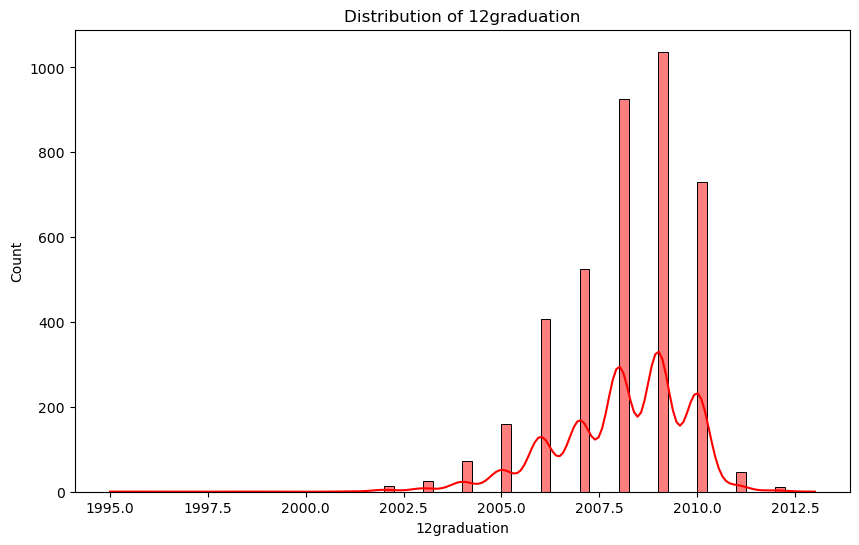

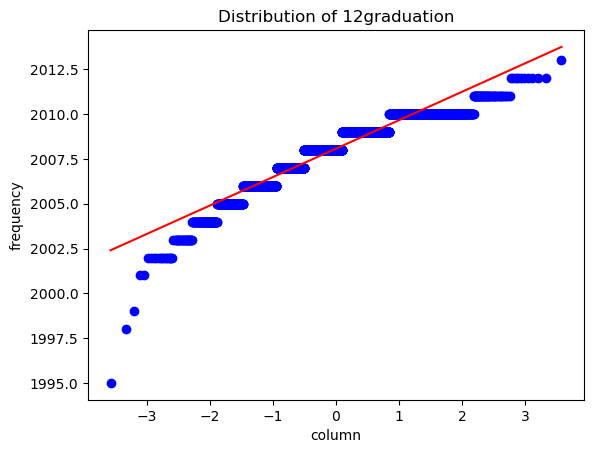

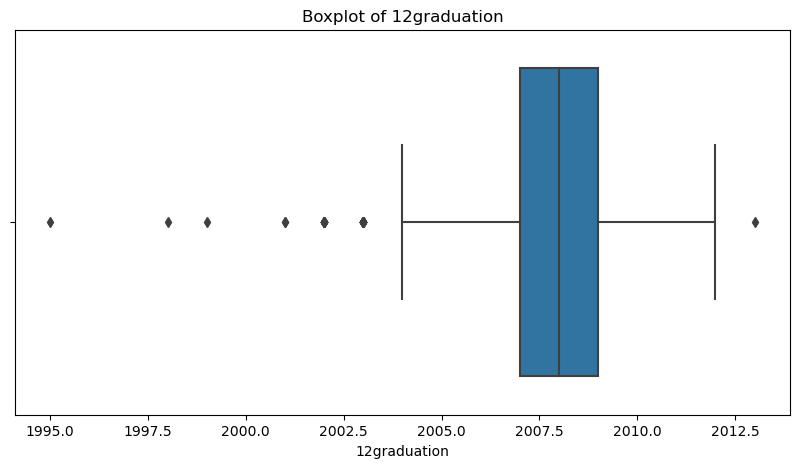

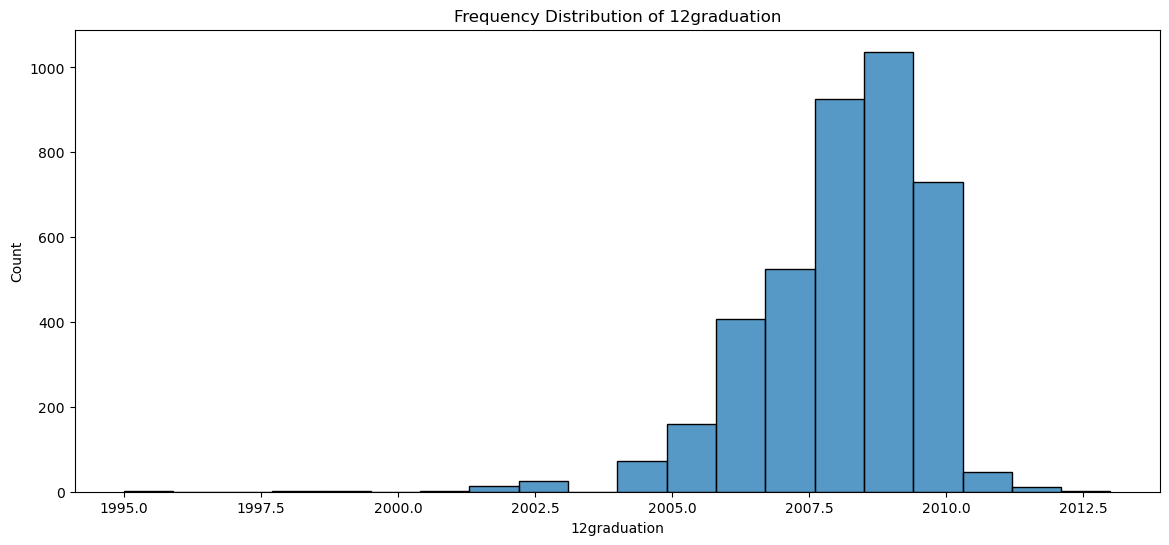

Outliers in 12graduation:
           ID     Salary        DOJ        DOL                Designation  \
59     536053   120000.0 2009-09-01 2013-04-01          software engineer   
193    231253   550000.0 2011-08-01 2015-04-01         software developer   
528    289374   250000.0 2011-05-01 2013-09-01            design engineer   
584    203323   430000.0 2010-04-01 2015-12-31              lead engineer   
600    918414   200000.0 2008-11-01 2012-11-01           project engineer   
670     50670   160000.0 2010-02-01 2013-02-01           project engineer   
712    114364   400000.0 2010-11-01 2013-09-01         programmer analyst   
772   1000456   320000.0 2013-07-01 2015-02-01             java developer   
828     54579   195000.0 2010-04-01 2011-12-01        technical recruiter   
890    134985   310000.0 2010-09-01 2015-02-01         software developer   
1083   243897   400000.0 2012-01-01 2015-12-31        assistant professor   
1169   179878   105000.0 2011-01-01 2011-06-01    

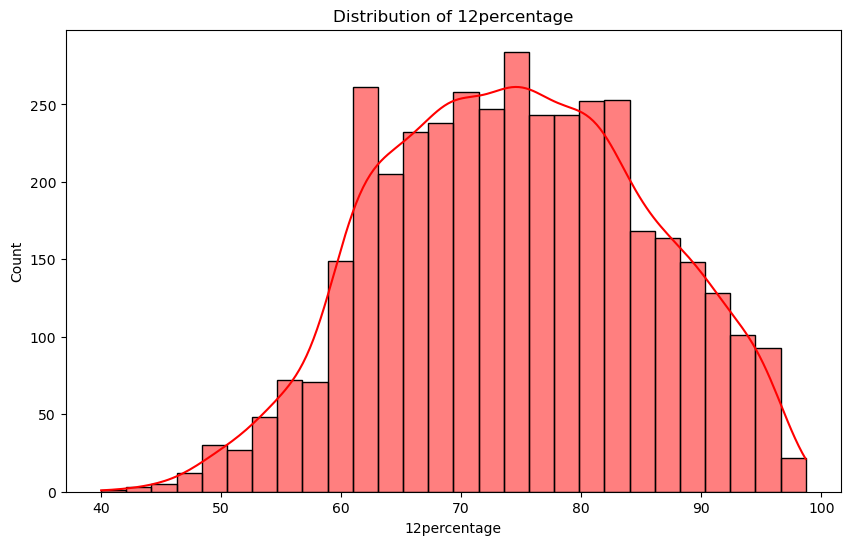

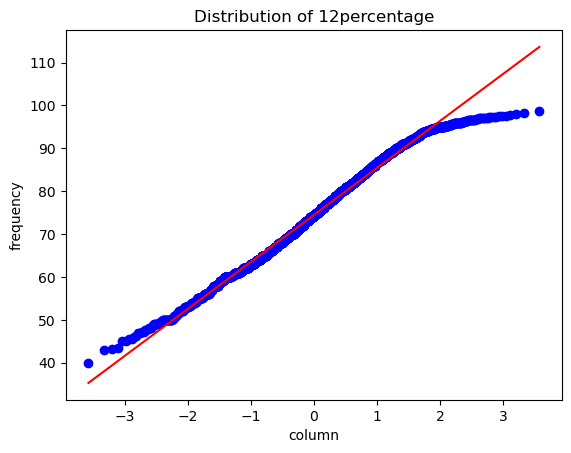

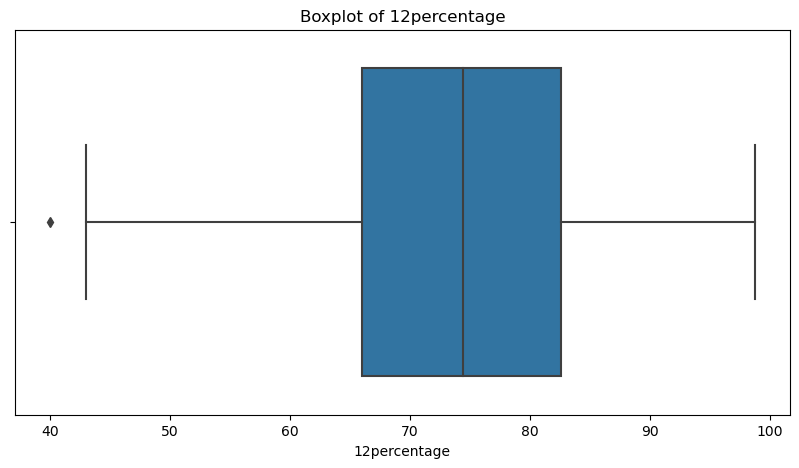

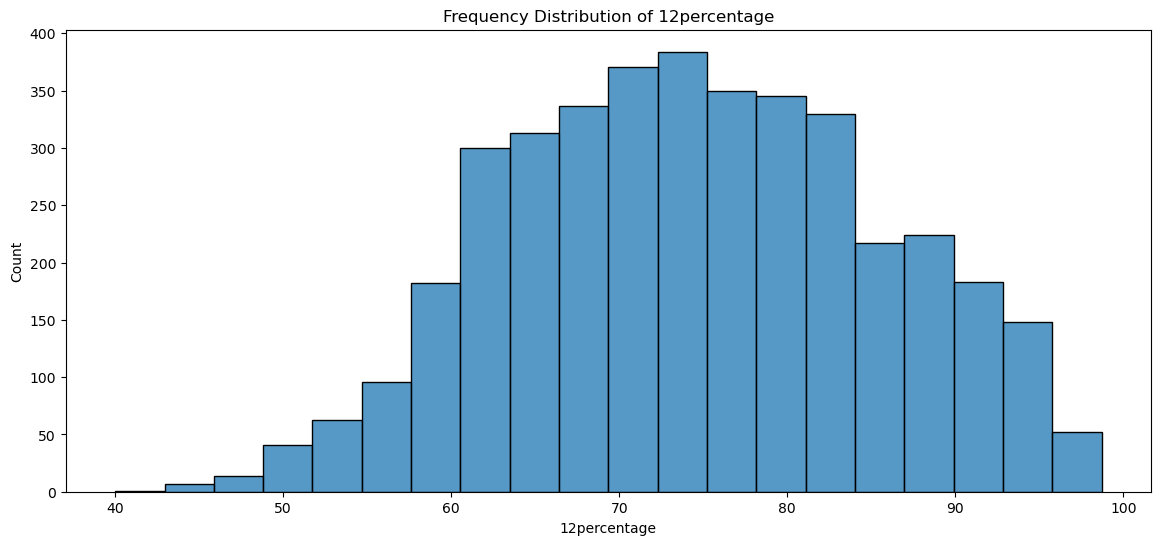

Outliers in 12percentage:
          ID    Salary        DOJ        DOL           Designation    JobCity  \
3337  258677  300000.0 2010-09-01 2014-06-01  system administrator  Hyderabad   

     Gender        DOB  10percentage 10board  ...  ComputerScience  \
3337      m 1984-06-21          74.0       0  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg conscientiousness  \
3337              -1             -1           -1        -1            -0.881   

      agreeableness  extraversion nueroticism  openess_to_experience  
3337         0.0328       -1.5051     -0.2902                -0.9194  

[1 rows x 36 columns]


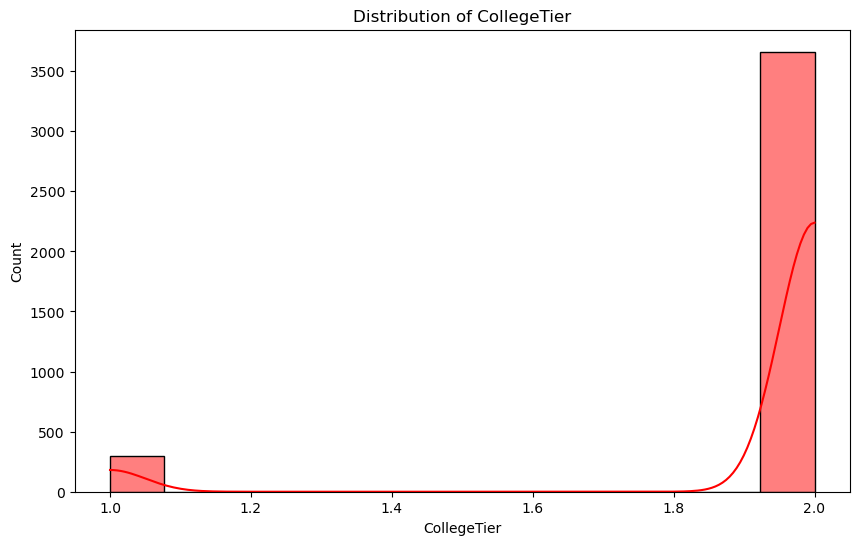

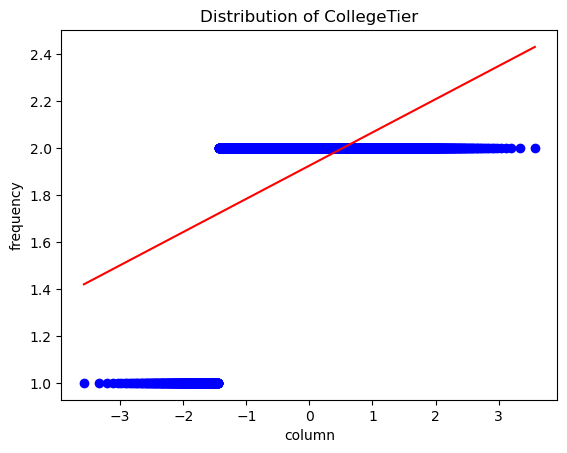

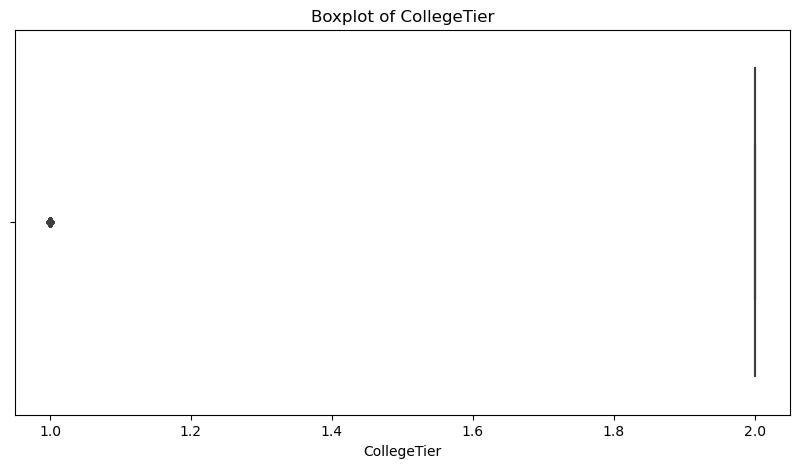

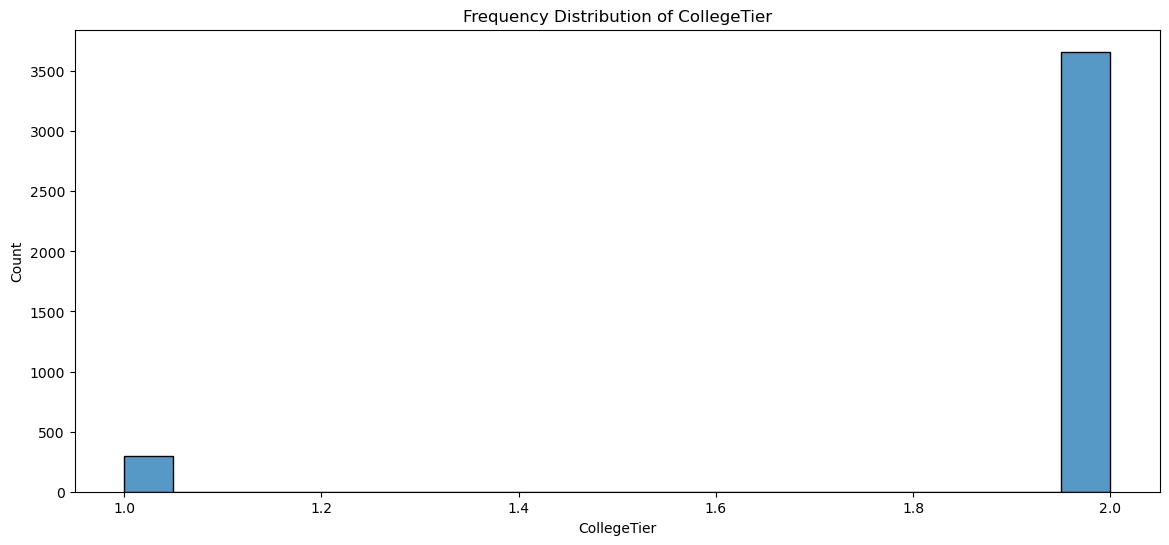

Outliers in CollegeTier:
           ID     Salary        DOJ        DOL  \
3      267447  1100000.0 2011-07-01 2015-12-31   
7      912934   400000.0 2014-07-01 2015-07-01   
8      552574   600000.0 2013-07-01 2015-12-31   
11     190393   450000.0 2011-08-01 2014-10-01   
32     580616   360000.0 2013-10-01 2015-12-31   
...       ...        ...        ...        ...   
3912   231229   730000.0 2013-07-01 2015-12-31   
3913   913446   370000.0 2014-06-01 2015-04-01   
3914   816649   220000.0 2014-10-01 2015-03-01   
3972  1044603   180000.0 2015-03-01 2015-05-01   
3979   212055   550000.0 2013-07-01 2014-04-01   

                               Designation     JobCity Gender        DOB  \
3                 senior software engineer     Gurgaon      m 1989-12-05   
7                      mechanical engineer   Bangalore      m 1992-05-27   
8                      electrical engineer       Noida      m 1991-09-17   
11                 senior systems engineer        Pune      m 1990-02-

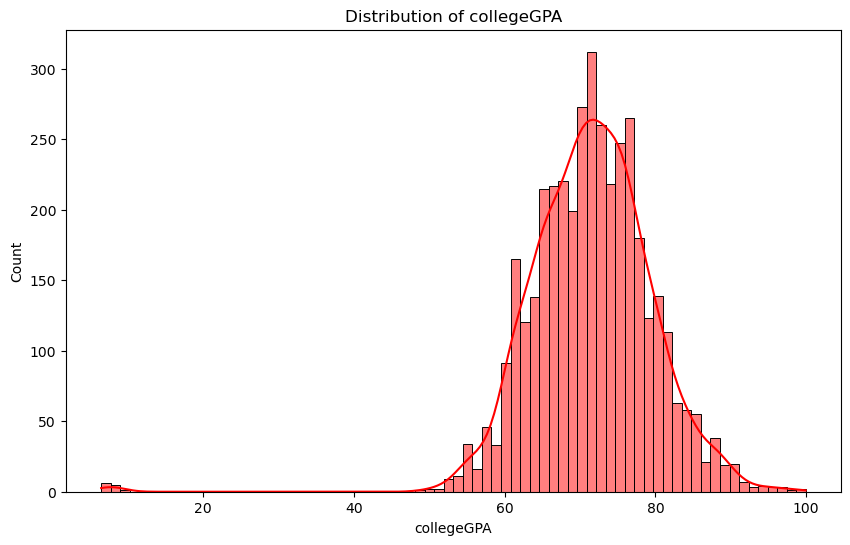

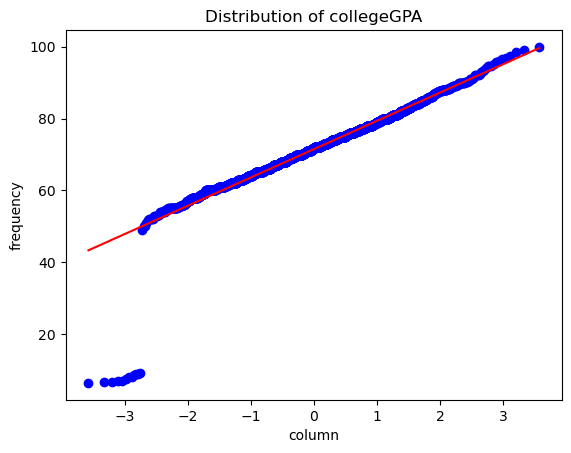

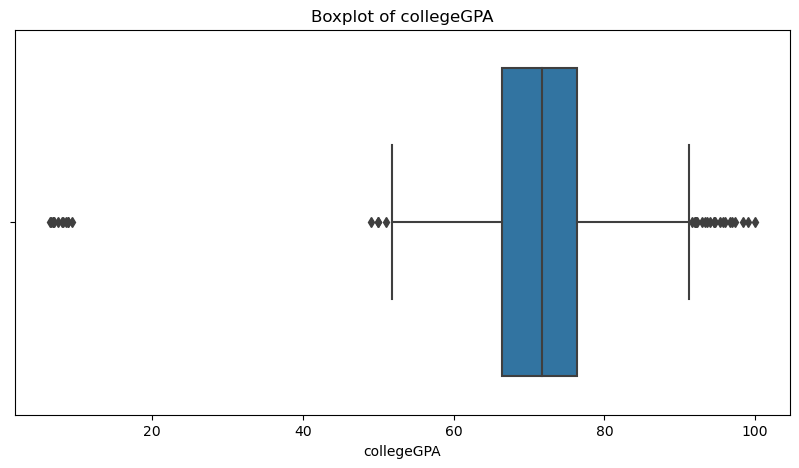

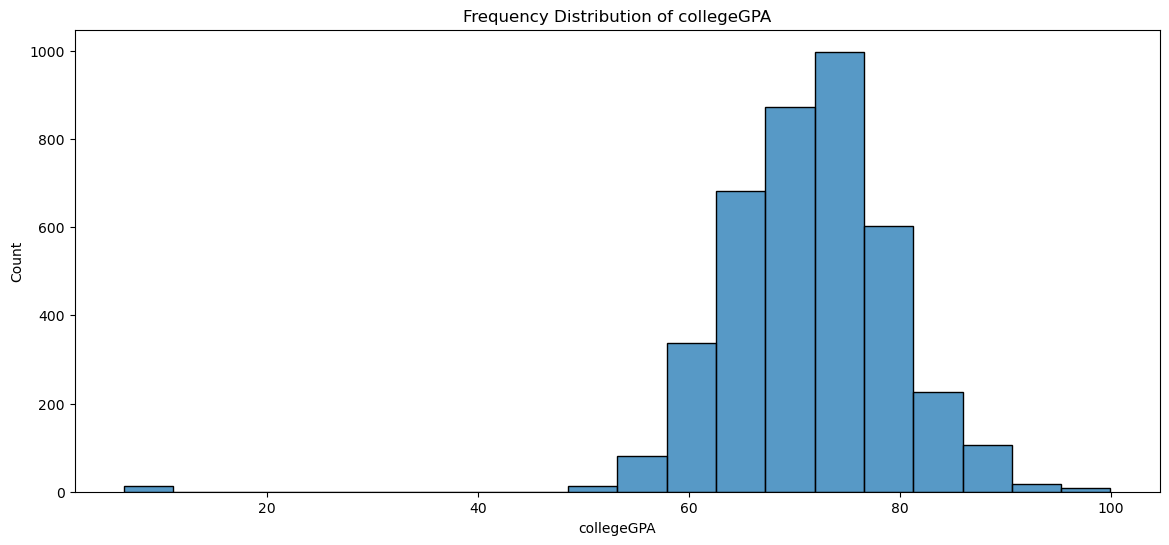

Outliers in collegeGPA:
           ID     Salary        DOJ        DOL  \
7      912934   400000.0 2014-07-01 2015-07-01   
44     247617   380000.0 2012-05-01 2015-04-01   
138    964319   195000.0 2014-10-01 2015-01-01   
187    336792   410000.0 2013-02-01 2015-12-31   
477    345838   225000.0 2013-06-01 2015-04-01   
614    237941   655000.0 2011-07-01 2015-12-31   
690    609356   440000.0 2013-10-01 2015-04-01   
788    249853   180000.0 2012-05-01 2013-06-01   
874    337594   400000.0 2013-02-01 2015-04-01   
907    324190   100000.0 2013-02-01 2014-04-01   
1029   337629   300000.0 2013-04-01 2015-04-01   
1134    56871   350000.0 2010-04-01 2012-08-01   
1264   220634   500000.0 2011-08-01 2012-06-01   
1345   619658   460000.0 2013-07-01 2014-11-01   
1419  1262900   180000.0 2014-10-01 2015-04-01   
1439   299447   360000.0 2011-08-01 2015-12-31   
1510   331122   560000.0 2014-08-01 2015-12-31   
1685   619652   325000.0 2013-10-01 2015-04-01   
1767   813008   180000.0 2

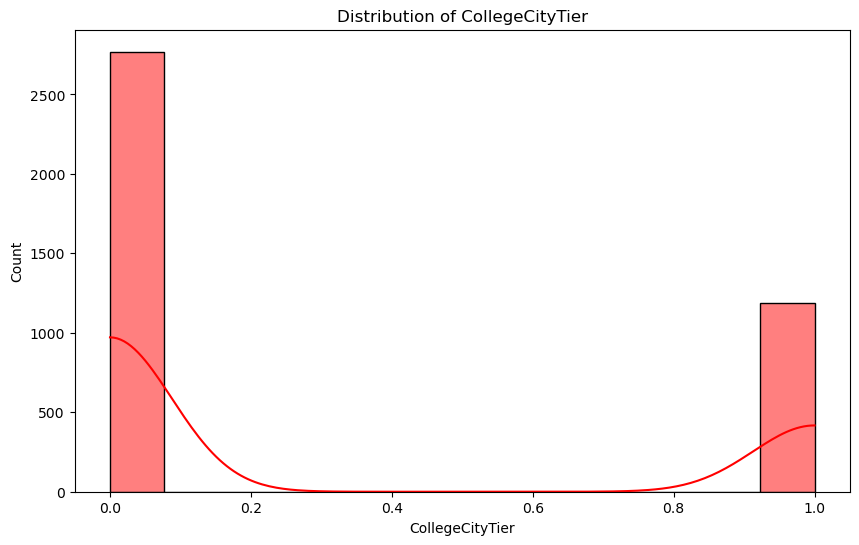

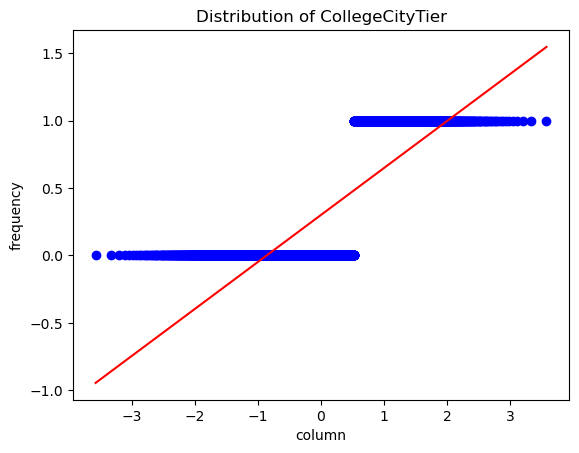

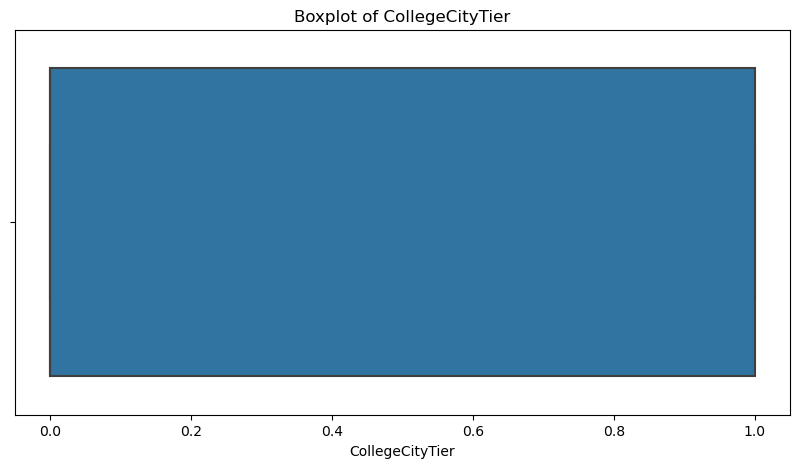

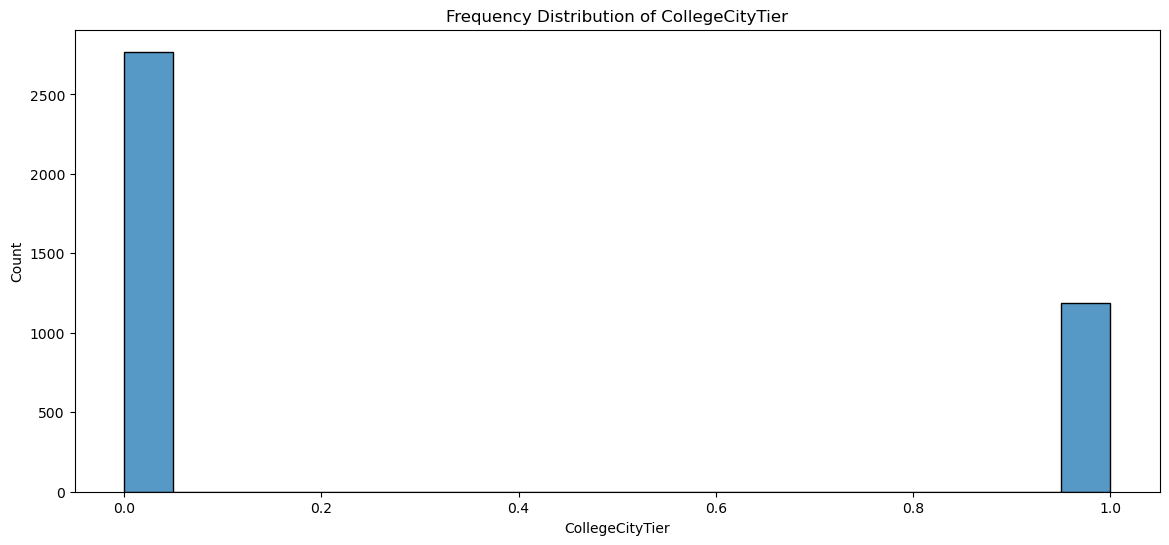

Outliers in CollegeCityTier:
Empty DataFrame
Columns: [ID, Salary, DOJ, DOL, Designation, JobCity, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience]
Index: []

[0 rows x 36 columns]


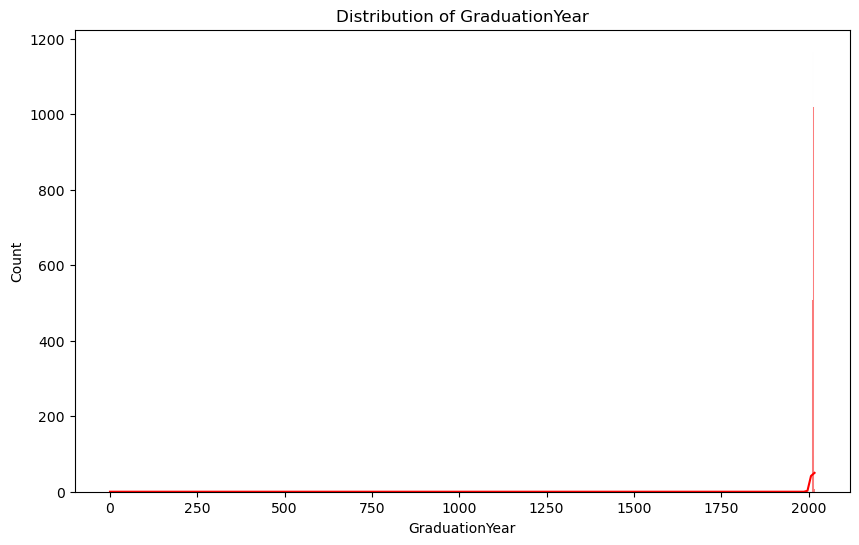

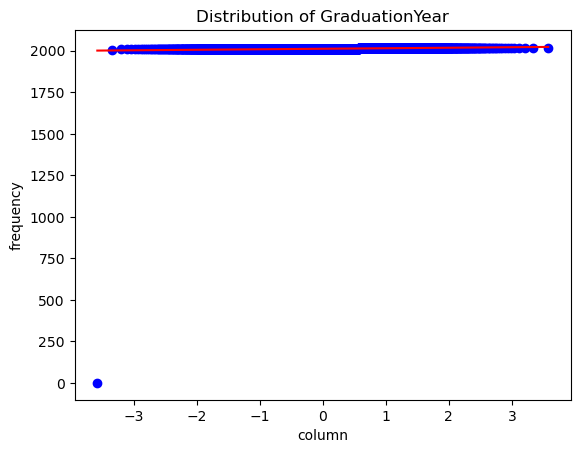

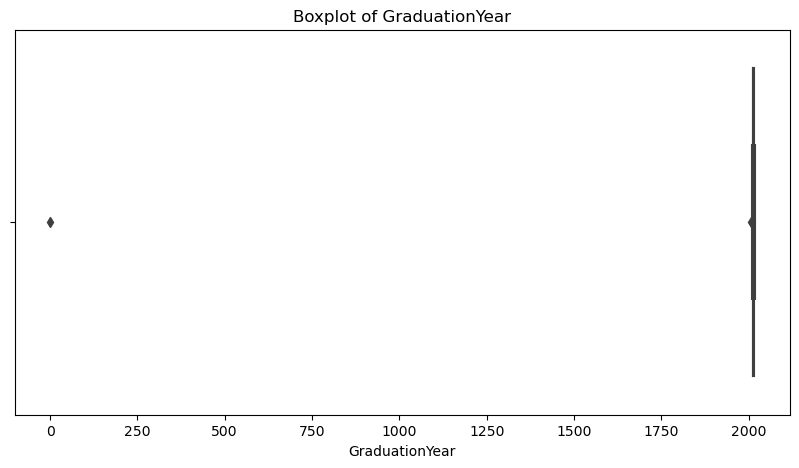

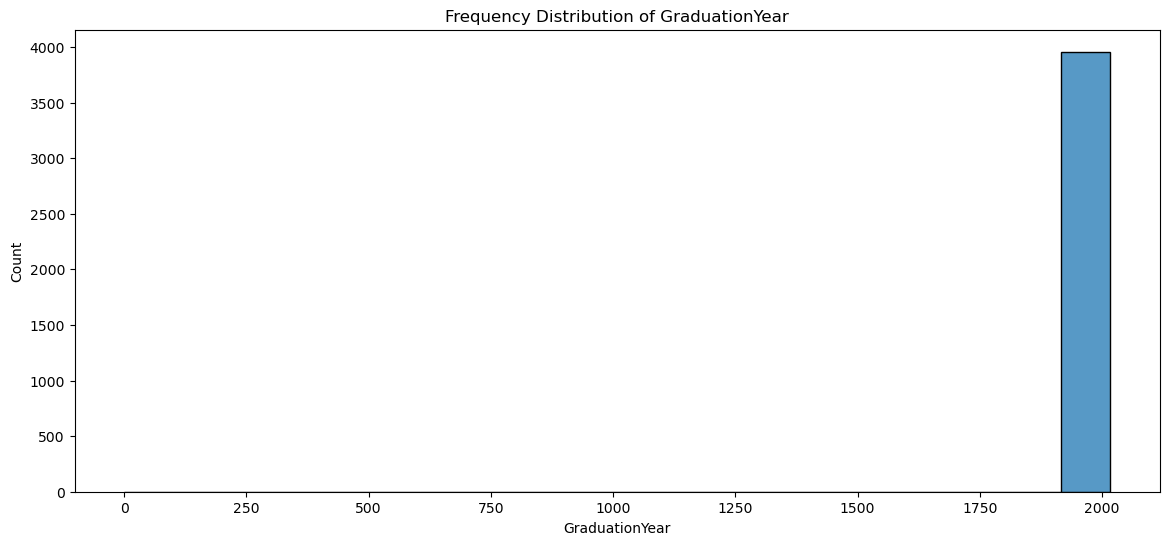

Outliers in GraduationYear:
          ID    Salary        DOJ        DOL        Designation     JobCity  \
2664  794381  325000.0 2014-07-01 2015-07-01   systems engineer  Chandigarh   
3193  480729  120000.0 2007-06-01 2009-06-01  software engineer   Hyderabad   

     Gender        DOB  10percentage         10board  ...  ComputerScience  \
2664      m 1991-12-17          89.0            cbse  ...               -1   
3193      m 1986-06-18          83.5  ap state board  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg conscientiousness  \
2664             446             -1           -1        -1            1.1336   
3193              -1             -1           -1        -1           -1.4992   

      agreeableness  extraversion nueroticism  openess_to_experience  
2664         0.3789       -0.2974     -0.3612                -1.2440  
3193        -0.7863       -2.0131      0.4148                -0.6035  

[2 rows x 36 columns]


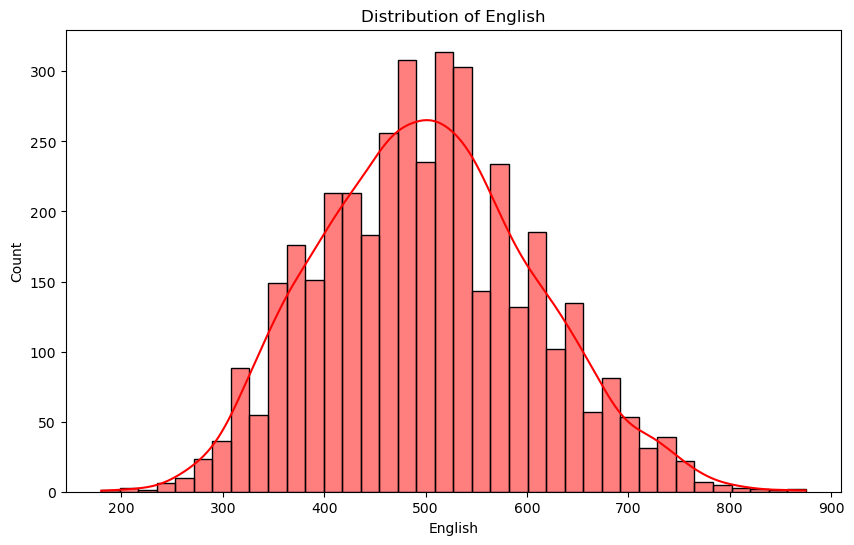

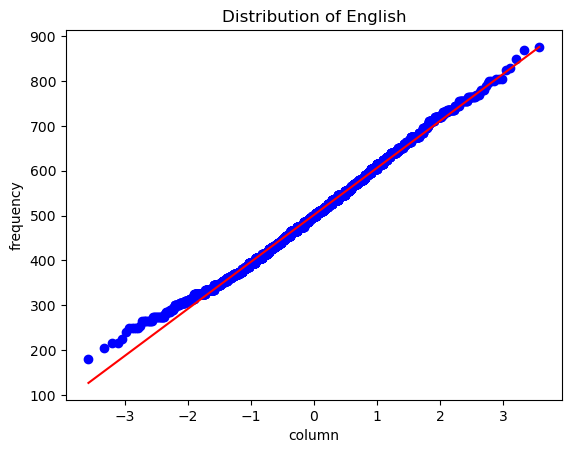

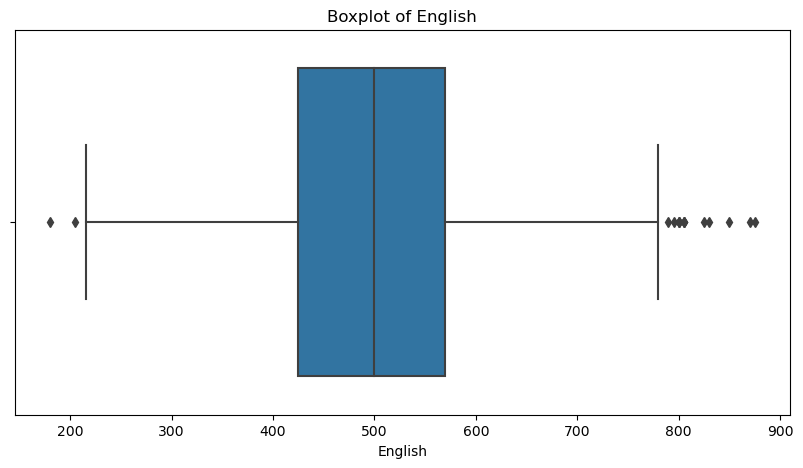

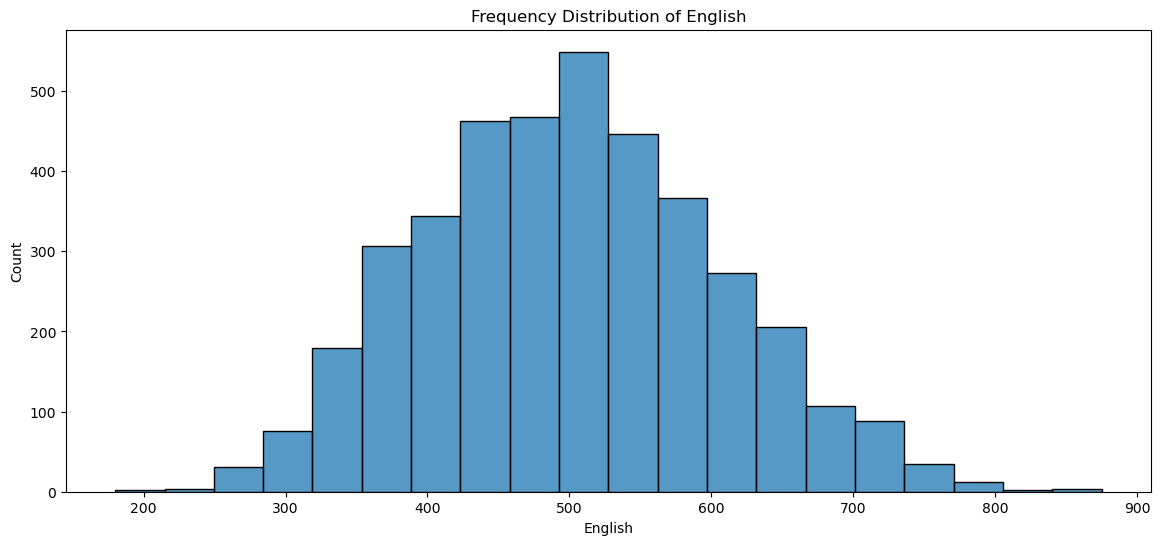

Outliers in English:
           ID    Salary        DOJ        DOL  \
275   1023622  305000.0 2014-08-01 2015-12-31   
444    283164  715000.0 2012-01-01 2015-12-31   
668    609043  440000.0 2013-10-01 2015-12-31   
839    693533  315000.0 2013-08-01 2015-02-01   
847    608938  600000.0 2013-07-01 2014-06-01   
935    513149  150000.0 2012-09-01 2013-08-01   
1183  1083037  310000.0 2014-09-01 2015-12-31   
1217   669692  600000.0 2014-10-01 2015-02-01   
1450  1284437  200000.0 2015-01-01 2015-07-01   
1519   984550  320000.0 2014-10-01 2015-12-31   
2077   922684  305000.0 2014-09-01 2015-04-01   
2122   605290  180000.0 2012-04-01 2013-02-01   
2385   683102  325000.0 2014-02-01 2015-12-31   
2596  1088319  610000.0 2014-07-01 2015-04-01   
3044   837923  360000.0 2013-12-01 2015-03-01   

                          Designation     JobCity Gender        DOB  \
275                 software engineer          -1      m 1993-03-01   
444                   senior engineer          -1   

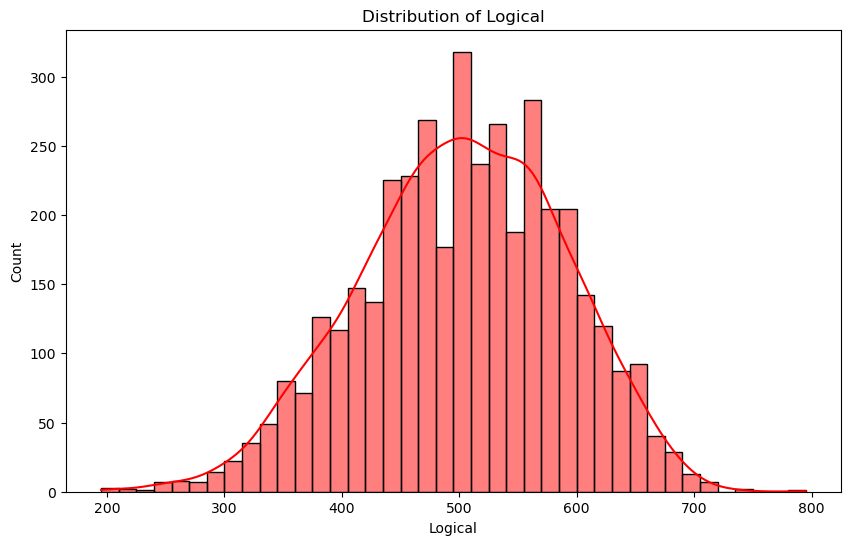

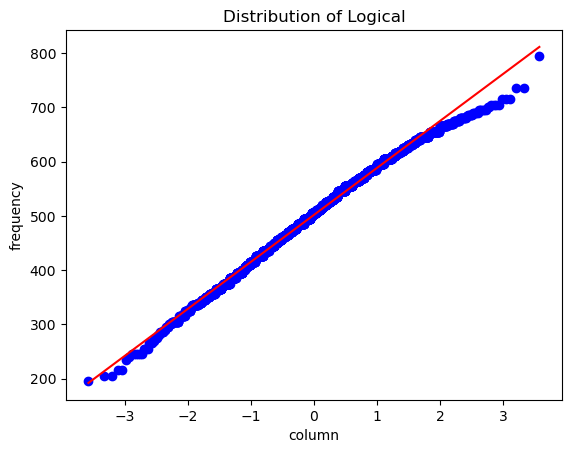

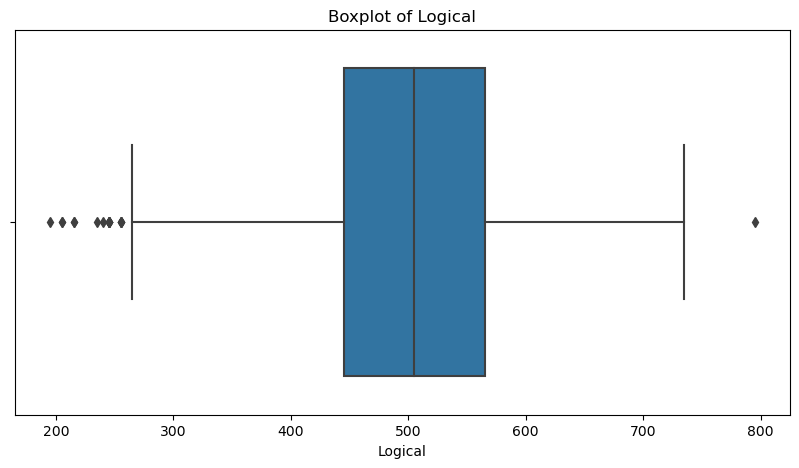

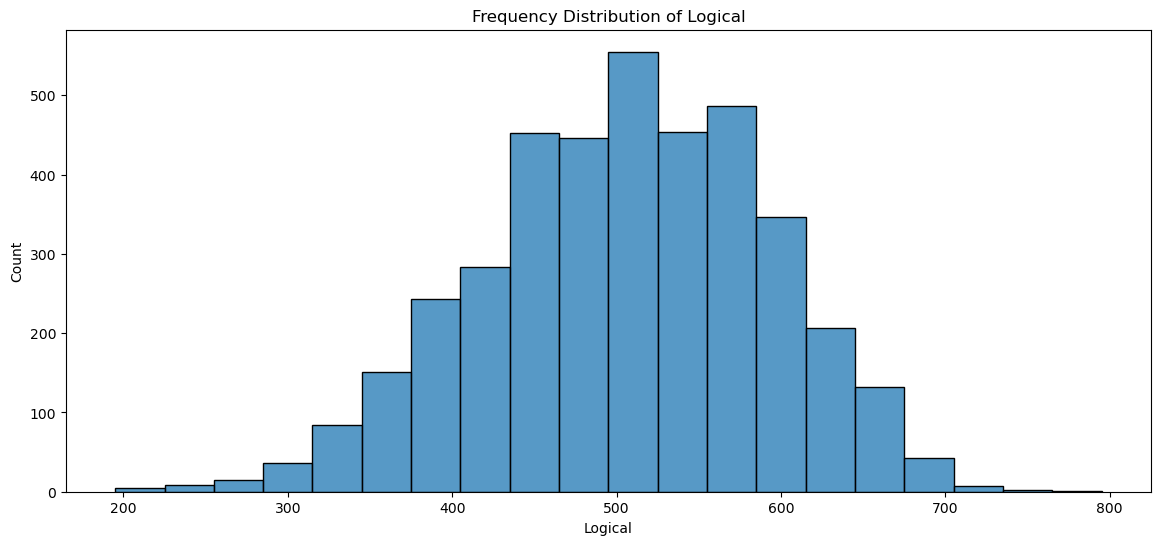

Outliers in Logical:
           ID    Salary        DOJ        DOL               Designation  \
101     43693  205000.0 2011-12-01 2015-12-31       electrical engineer   
133    434552  300000.0 2014-06-01 2015-04-01     marketing coordinator   
207    457244  360000.0 2013-04-01 2015-12-31         software engineer   
345     60315  110000.0 2011-07-01 2012-05-01      maintenance engineer   
628     47805  505000.0 2010-12-01 2014-06-01  senior software engineer   
1014   649530  350000.0 2014-02-01 2015-12-31           system engineer   
1160    65483  325000.0 2012-04-01 2015-12-31    software test engineer   
1439   299447  360000.0 2011-08-01 2015-12-31       assistant professor   
2141   340045  100000.0 2013-04-01 2013-09-01        software developer   
2265   126975  300000.0 2010-09-01 2013-10-01           senior engineer   
2796  1087183  100000.0 2015-02-01 2015-03-01        software developer   
2830   133458  150000.0 2010-10-01 2011-12-01    maintenance supervisor   
2891

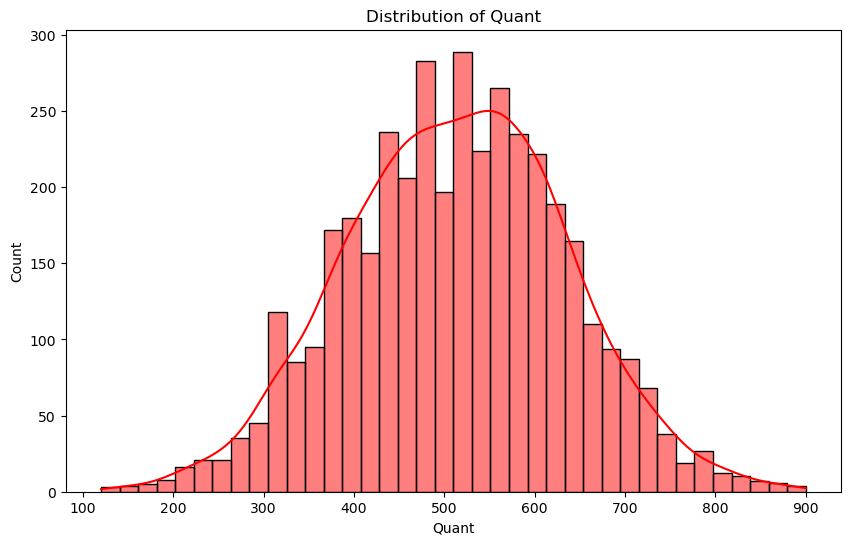

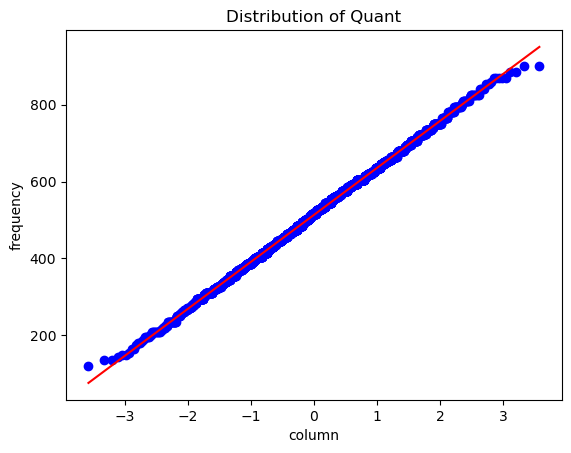

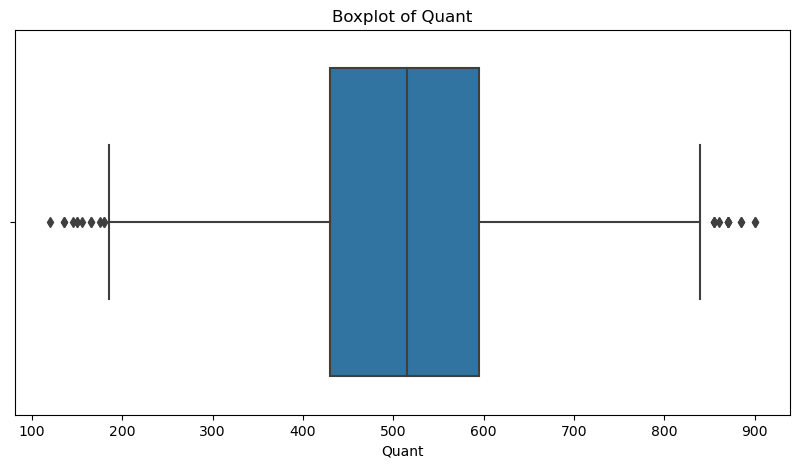

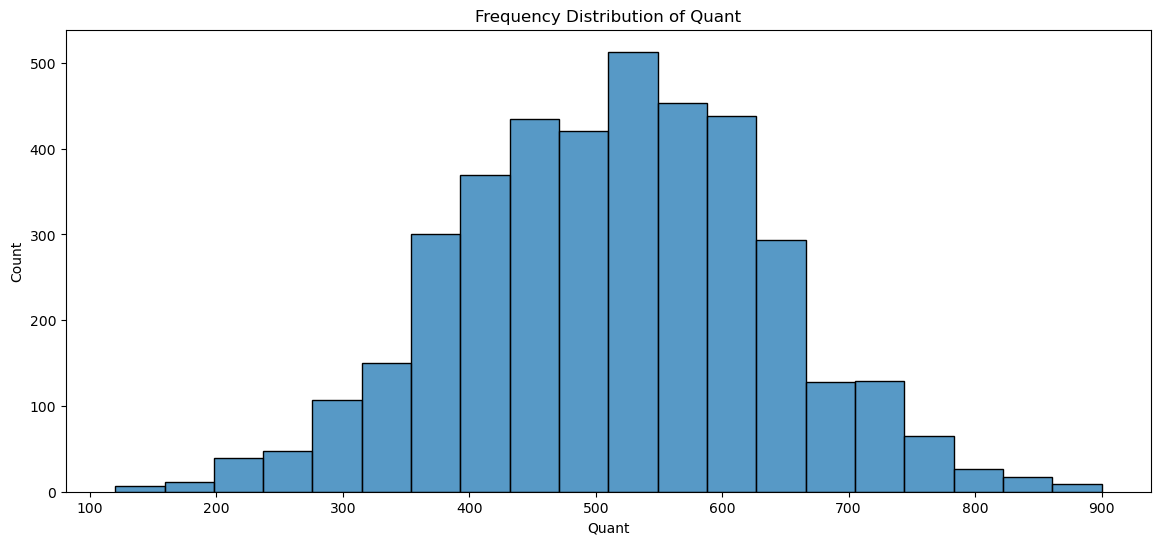

Outliers in Quant:
           ID    Salary        DOJ        DOL  \
195    863466  350000.0 2013-11-01 2014-07-01   
522    640774   55000.0 2014-02-01 2014-05-01   
564    558050  185000.0 2012-08-01 2015-08-01   
698   1122860  300000.0 2014-08-01 2015-12-31   
783   1262957  190000.0 2013-11-01 2015-01-01   
899    602267  320000.0 2014-09-01 2015-12-31   
1148  1145718  100000.0 2014-11-01 2015-01-01   
1310   596083  450000.0 2014-08-01 2015-12-31   
1661   591405  605000.0 2013-09-01 2015-12-31   
1815   806357  205000.0 2014-07-01 2015-06-01   
2007   637441  350000.0 2013-10-01 2015-04-01   
2134   602029  150000.0 2014-10-01 2015-09-01   
2155   900799  320000.0 2014-05-01 2015-12-31   
2411   655464  390000.0 2013-07-01 2015-12-31   
2437   489860  120000.0 2014-03-01 2015-03-01   
2490   595163   80000.0 2013-08-01 2014-02-01   
2616   730091   80000.0 2014-05-01 2015-04-01   
2932   624843  110000.0 2014-04-01 2014-09-01   
2957   510199  770000.0 2012-07-01 2015-12-31   
2

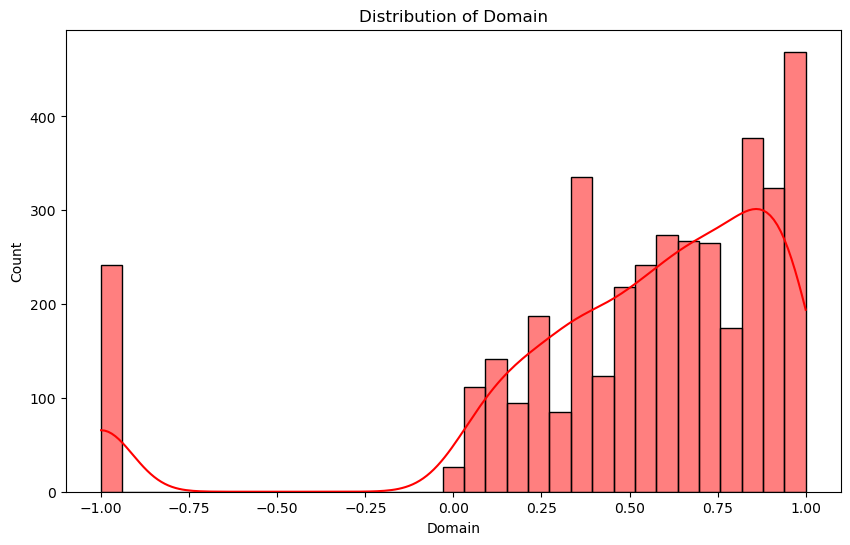

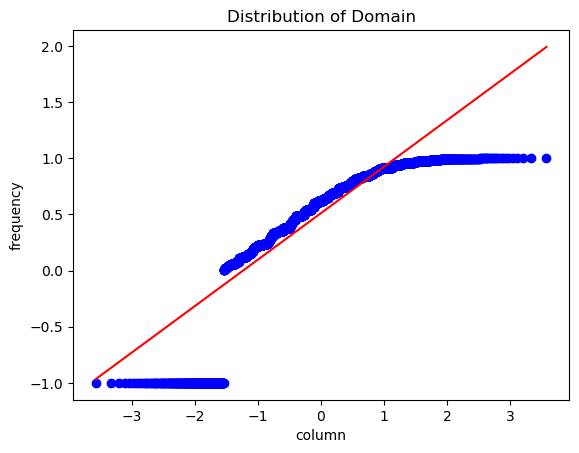

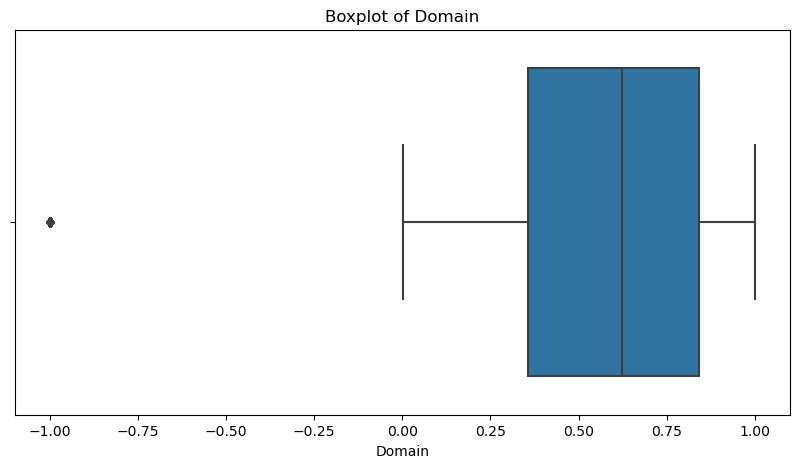

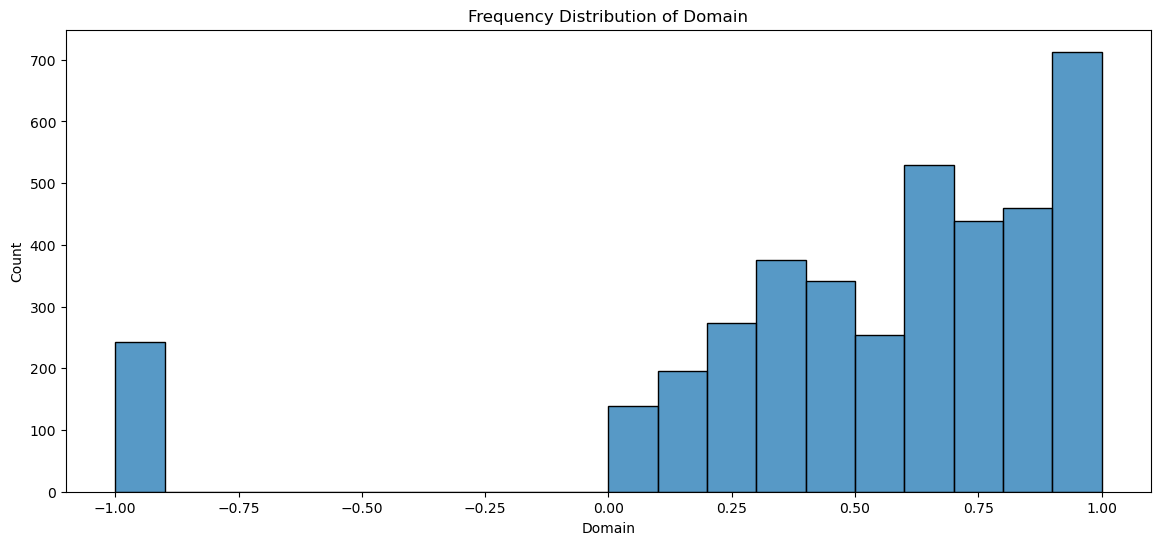

Outliers in Domain:
           ID    Salary        DOJ        DOL                   Designation  \
5     1027655  300000.0 2014-06-01 2015-12-31               system engineer   
14    1279958  300000.0 2013-07-01 2015-12-31        java software engineer   
16    1087625  325000.0 2014-09-01 2015-12-31  product development engineer   
22     995191  190000.0 2013-10-01 2015-04-01                     developer   
35     942679  350000.0 2014-03-01 2015-12-31      online marketing manager   
...       ...       ...        ...        ...                           ...   
3942  1067015  280000.0 2013-07-01 2015-12-31             software engineer   
3958  1039020  310000.0 2014-06-01 2015-12-31             software engineer   
3960  1037712  240000.0 2013-08-01 2014-01-01                 web developer   
3969  1233826  330000.0 2015-06-01 2015-12-31            technical engineer   
3978  1274658  320000.0 2013-08-01 2014-01-01             software engineer   

        JobCity Gender        D

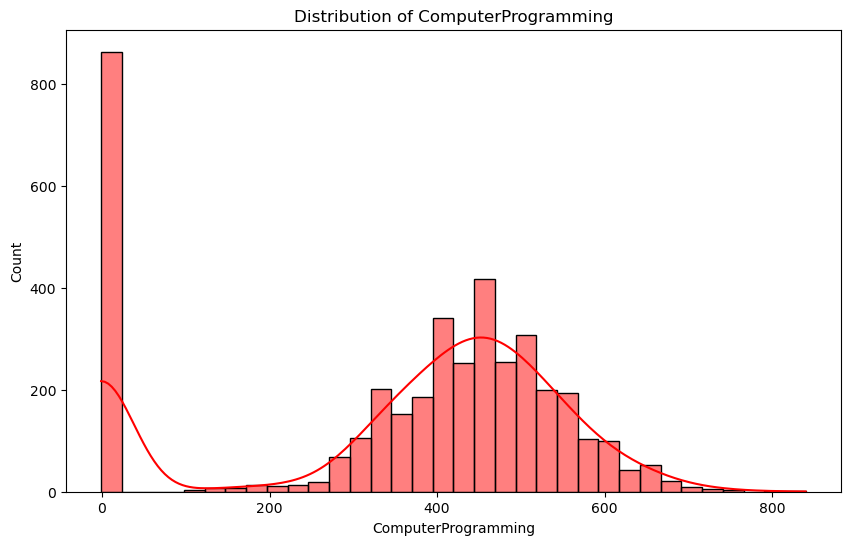

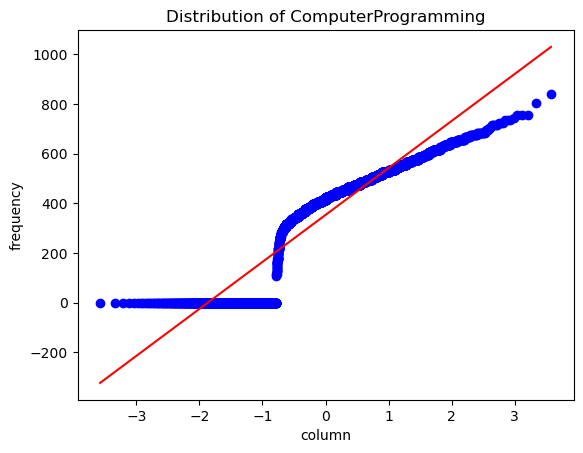

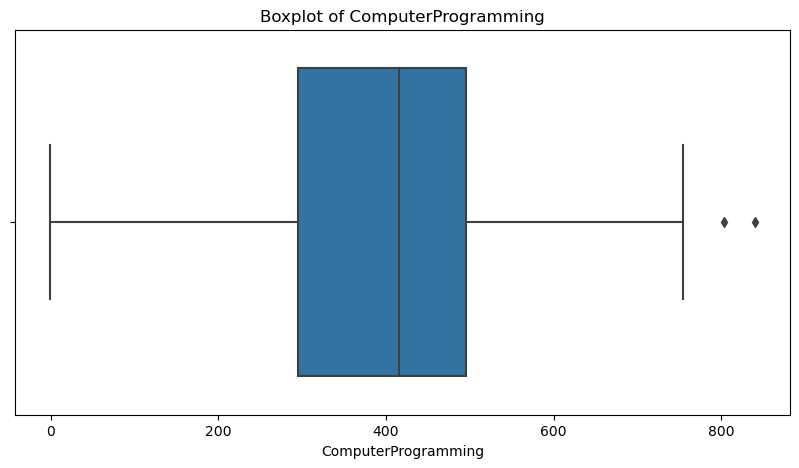

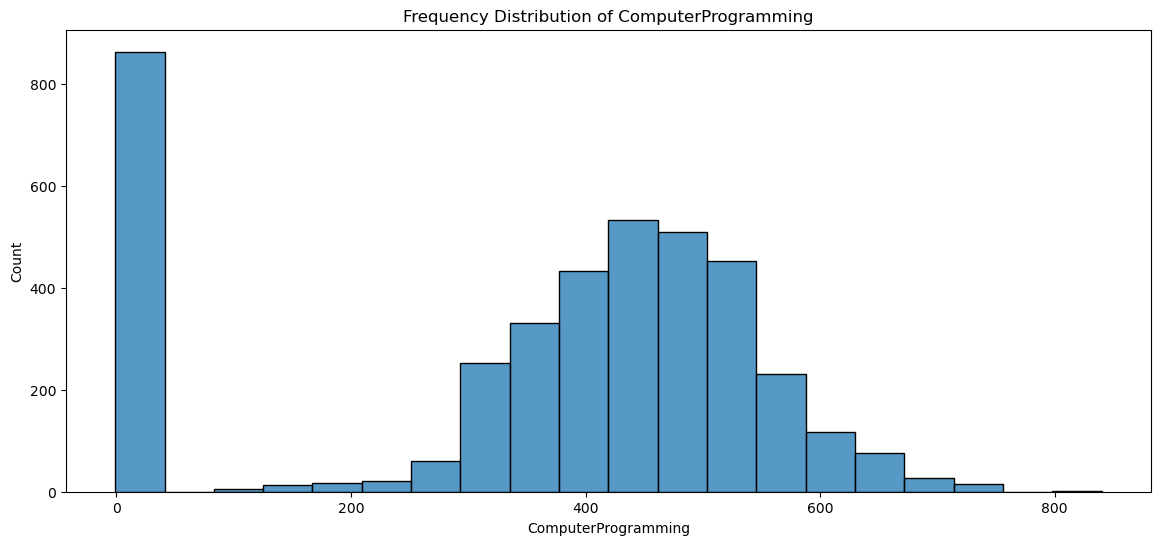

Outliers in ComputerProgramming:
          ID    Salary        DOJ        DOL             Designation  JobCity  \
64     31330  600000.0 2010-07-01 2012-07-01  java software engineer  Gurgaon   
1711  712570  625000.0 2014-02-01 2015-12-31            data analyst       -1   

     Gender        DOB  10percentage      10board  ...  ComputerScience  \
64        m 1986-05-29          78.0         cbse  ...               -1   
1711      m 1990-06-24          88.0  state board  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg conscientiousness  \
64                -1             -1           -1        -1            0.6646   
1711             233             -1           -1        -1           -0.7335   

      agreeableness  extraversion nueroticism  openess_to_experience  
64           0.3448        0.8171      0.6498                 0.0284  
1711        -0.7866       -0.4511     -1.5021                -1.8189  

[2 rows x 36 columns]


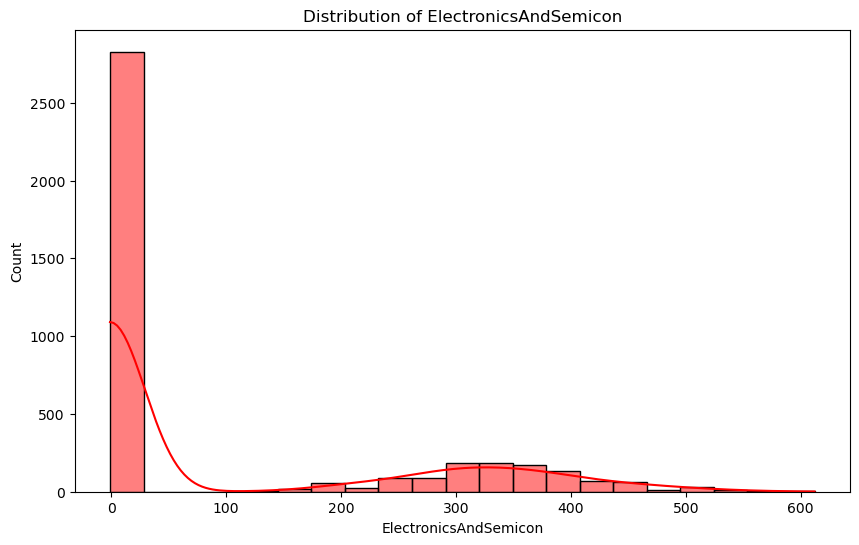

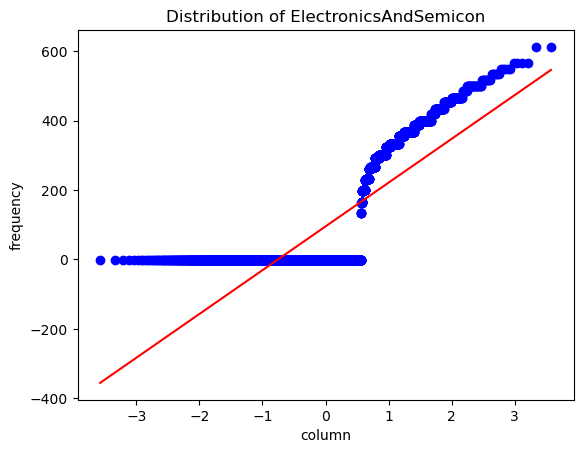

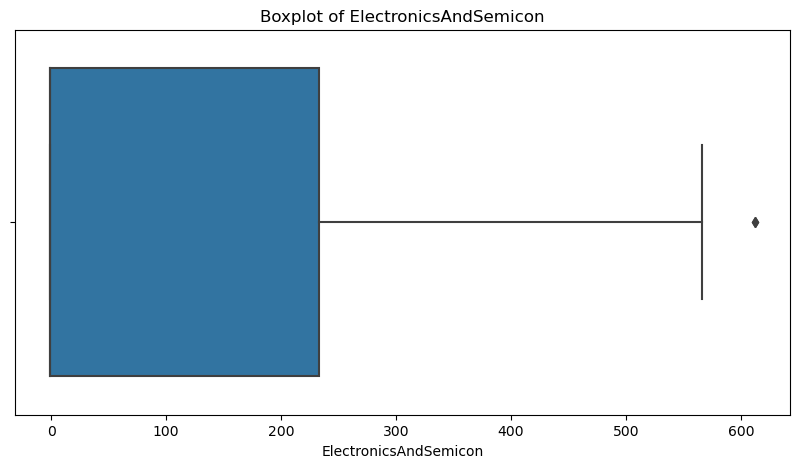

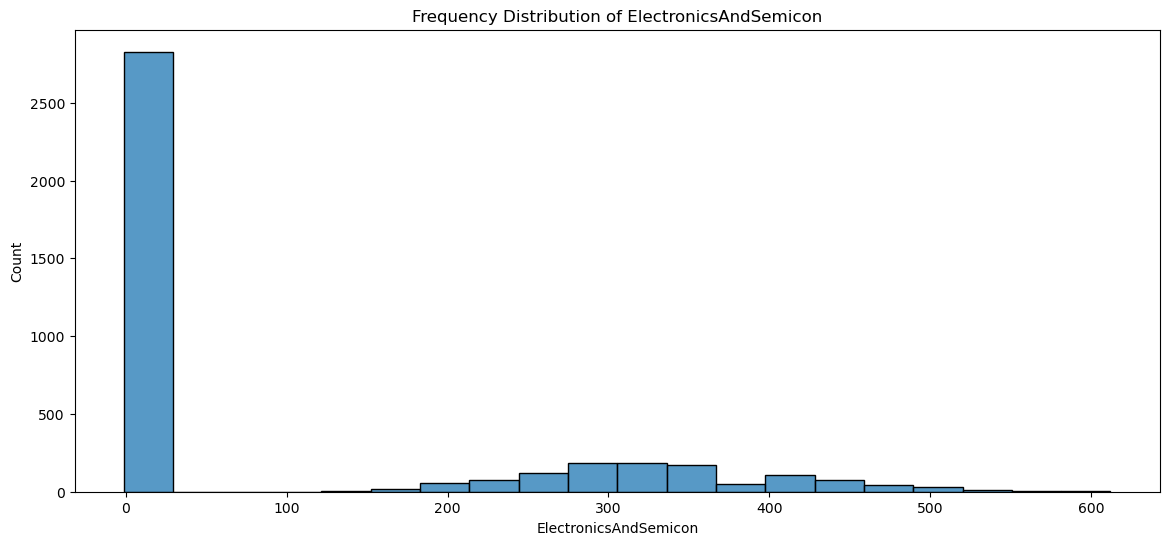

Outliers in ElectronicsAndSemicon:
           ID    Salary        DOJ        DOL              Designation  \
1557  1157412  350000.0 2014-07-01 2015-04-01         systems engineer   
3889  1062520  325000.0 2014-10-01 2015-12-31  assistant store manager   

        JobCity Gender        DOB  10percentage      10board  ...  \
1557  Hyderabad      f 1992-08-11          84.4         cbse  ...   
3889    Chennai      m 1993-08-28          93.4  state board  ...   

      ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg  \
1557               -1              -1            580           -1        -1   
3889               -1              -1             -1           -1        -1   

     conscientiousness  agreeableness  extraversion nueroticism  \
1557            1.8517         1.0449         0.010     -2.3895   
3889            0.1282         0.3789        -1.527     -0.8682   

      openess_to_experience  
1557                 0.8637  
3889                -0.6692  

[2 

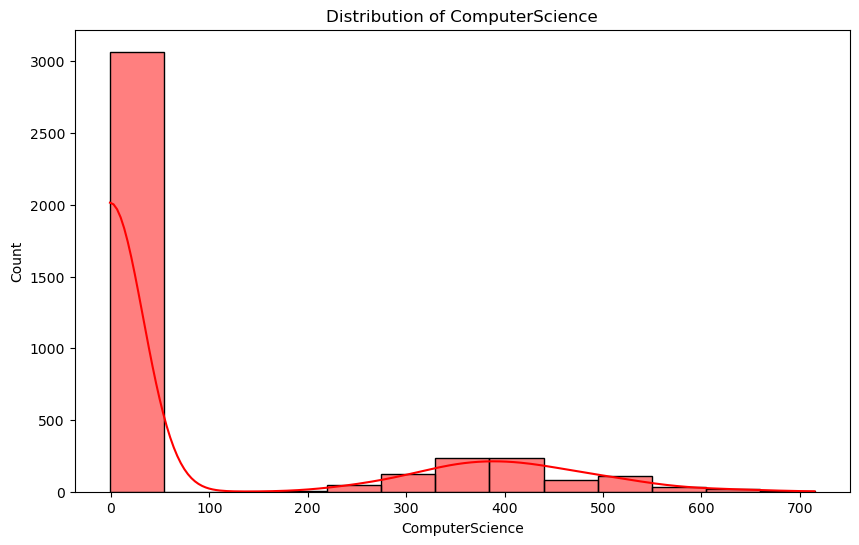

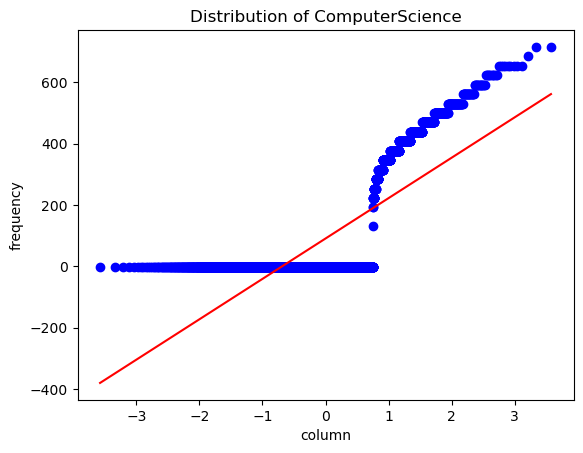

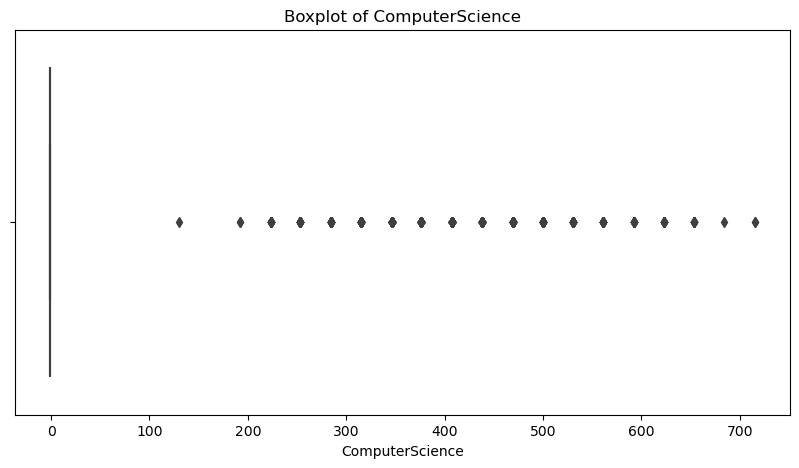

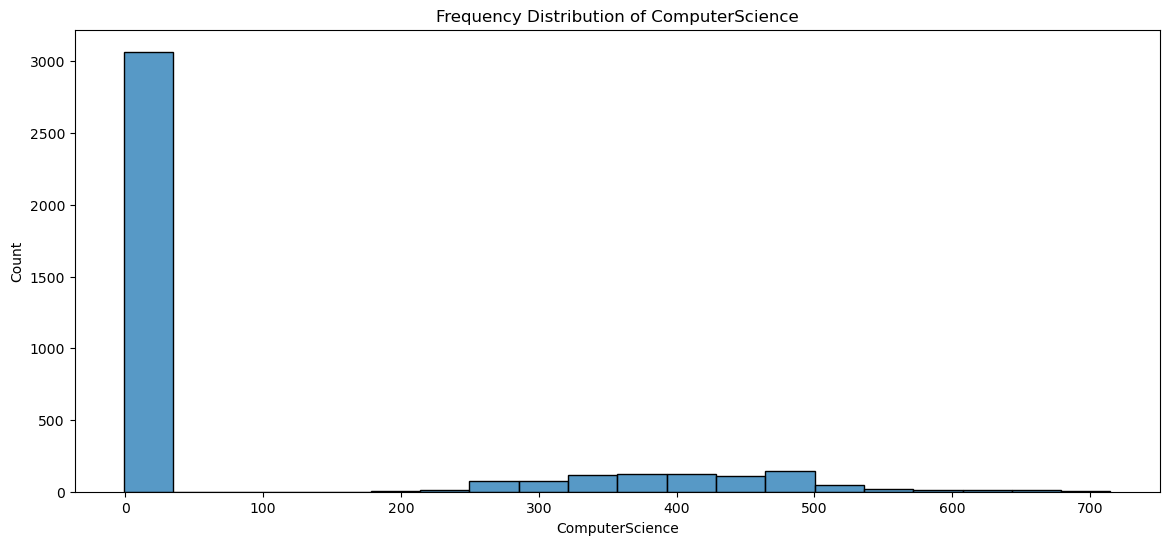

Outliers in ComputerScience:
           ID    Salary        DOJ        DOL                   Designation  \
5     1027655  300000.0 2014-06-01 2015-12-31               system engineer   
6      947847  300000.0 2014-08-01 2015-05-01        java software engineer   
14    1279958  300000.0 2013-07-01 2015-12-31        java software engineer   
17     874596  250000.0 2013-08-01 2014-09-01  associate software developer   
24     963123  335000.0 2014-06-01 2015-06-01            programmer analyst   
...       ...       ...        ...        ...                           ...   
3972  1044603  180000.0 2015-03-01 2015-05-01             help desk analyst   
3976  1006997  300000.0 2015-01-01 2015-12-31     graduate engineer trainee   
3981  1077872  220000.0 2014-09-01 2015-12-31             software engineer   
3989  1204604  300000.0 2014-09-01 2015-12-31             software engineer   
3996   947111  200000.0 2014-07-01 2015-01-01            software developer   

               JobCity

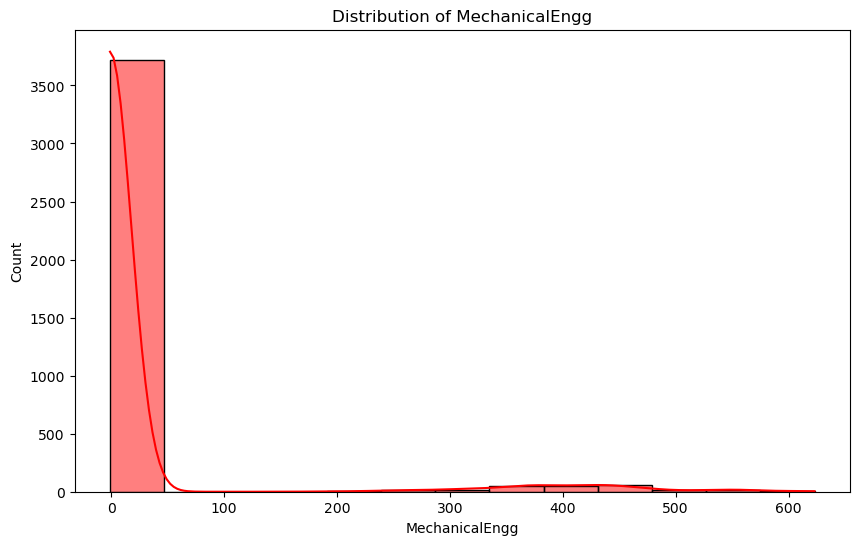

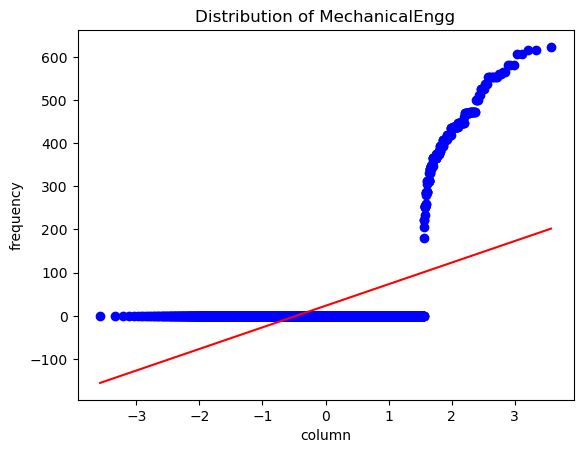

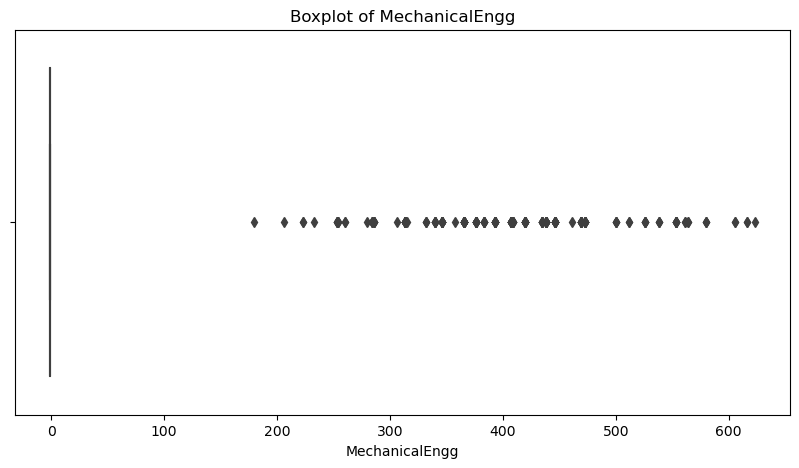

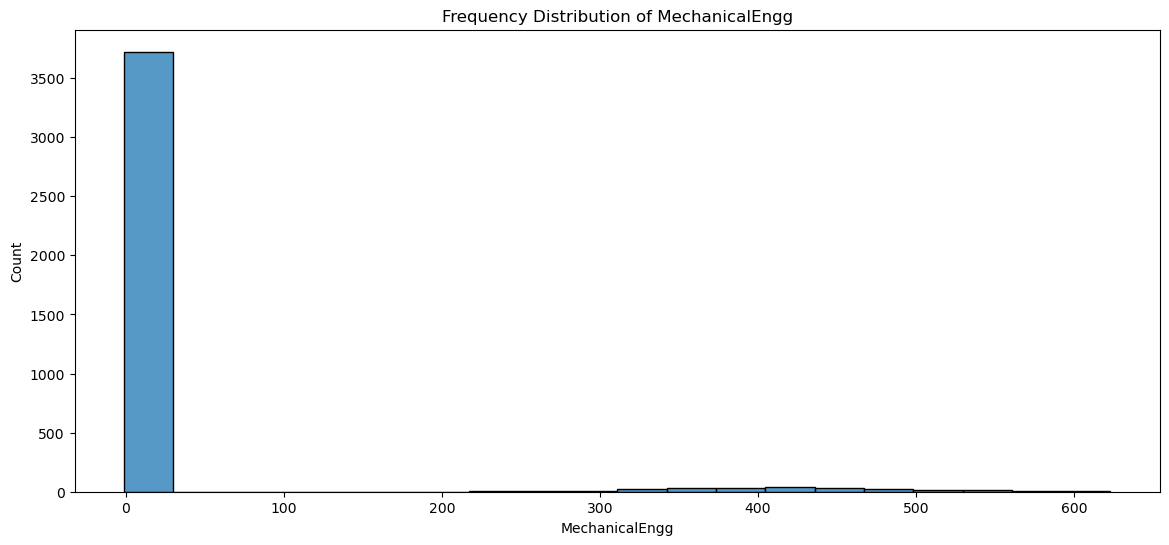

Outliers in MechanicalEngg:
           ID    Salary        DOJ        DOL               Designation  \
7      912934  400000.0 2014-07-01 2015-07-01       mechanical engineer   
26      65096  345000.0 2011-01-01 2013-10-01  senior software engineer   
40     245887  120000.0 2011-06-01 2012-03-01              site manager   
45    1230582  110000.0 2014-09-01 2015-01-01       production engineer   
59     536053  120000.0 2009-09-01 2013-04-01         software engineer   
...       ...       ...        ...        ...                       ...   
3909   628271  210000.0 2013-08-01 2015-12-31       production engineer   
3916   530146  360000.0 2013-06-01 2014-12-01        management trainee   
3929   336937  100000.0 2012-06-01 2014-04-01              cad designer   
3951   885459  145000.0 2014-05-01 2015-12-31       mechanical engineer   
3980   197796  150000.0 2011-07-01 2012-07-01                       get   

          JobCity Gender        DOB  10percentage  \
7       Bangalore 

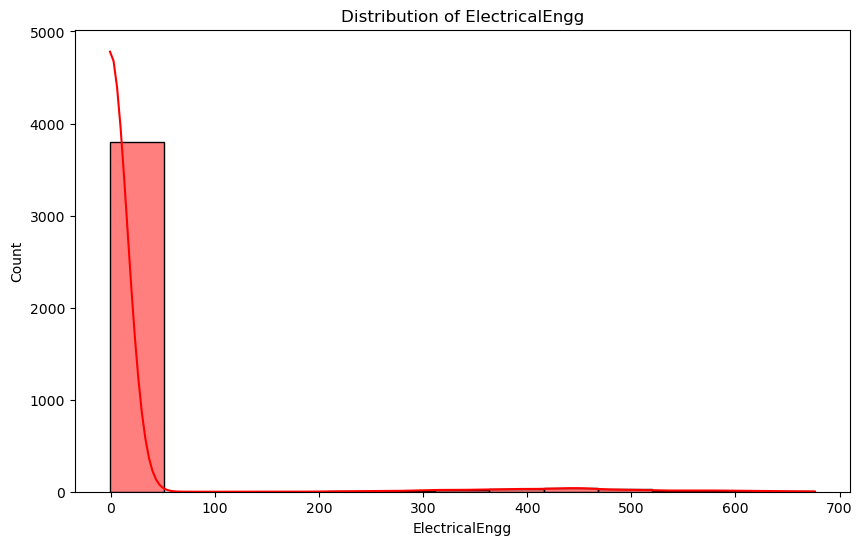

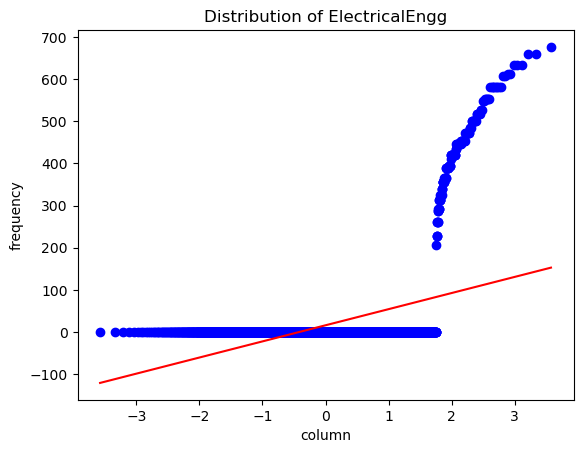

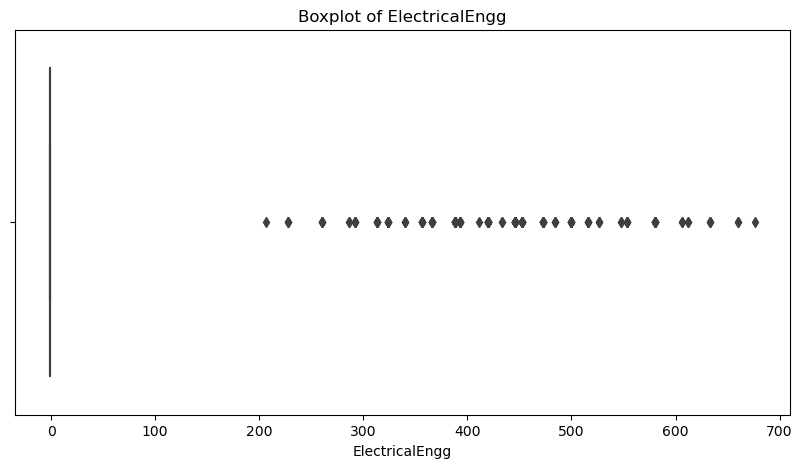

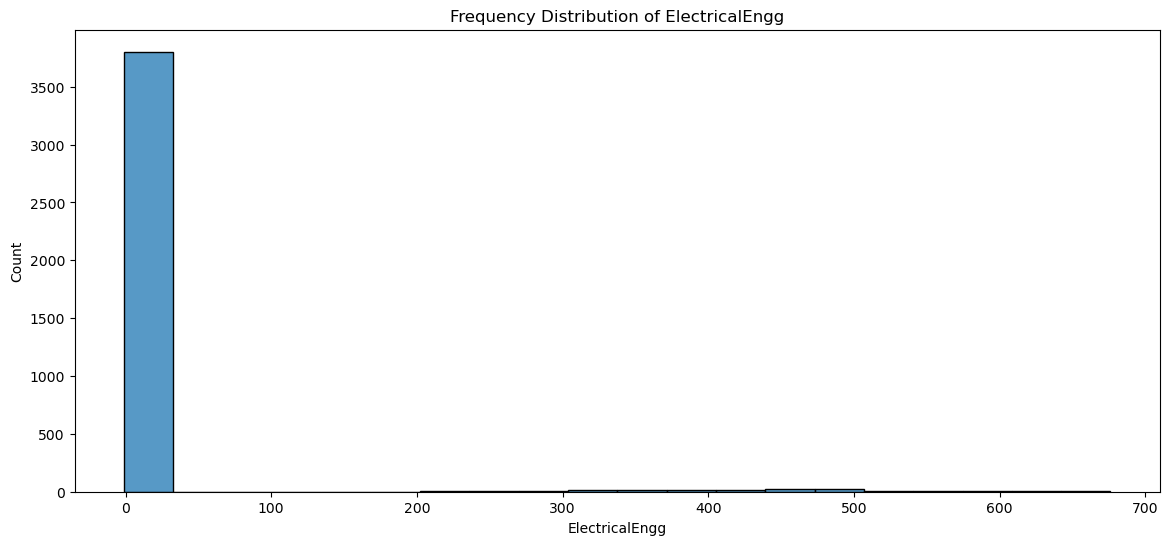

Outliers in ElectricalEngg:
           ID    Salary        DOJ        DOL                Designation  \
53    1082717  350000.0 2014-09-01 2015-12-31  assistant system engineer   
70     801755  320000.0 2014-03-01 2015-12-31            system engineer   
124    614524  315000.0 2014-11-01 2015-12-31         programmer analyst   
125    796063  300000.0 2014-11-01 2015-03-01         programmer analyst   
180    639785  180000.0 2013-09-01 2014-04-01            design engineer   
...       ...       ...        ...        ...                        ...   
3832   625434  565000.0 2013-10-01 2015-04-01                   engineer   
3835  1081640  100000.0 2014-04-01 2015-02-01           project engineer   
3837   898548  350000.0 2014-12-01 2015-12-31      application developer   
3839   644828  360000.0 2013-09-01 2015-12-31                        ase   
3844  1219891  200000.0 2015-01-01 2015-06-01        electrical engineer   

          JobCity Gender        DOB  10percentage      10bo

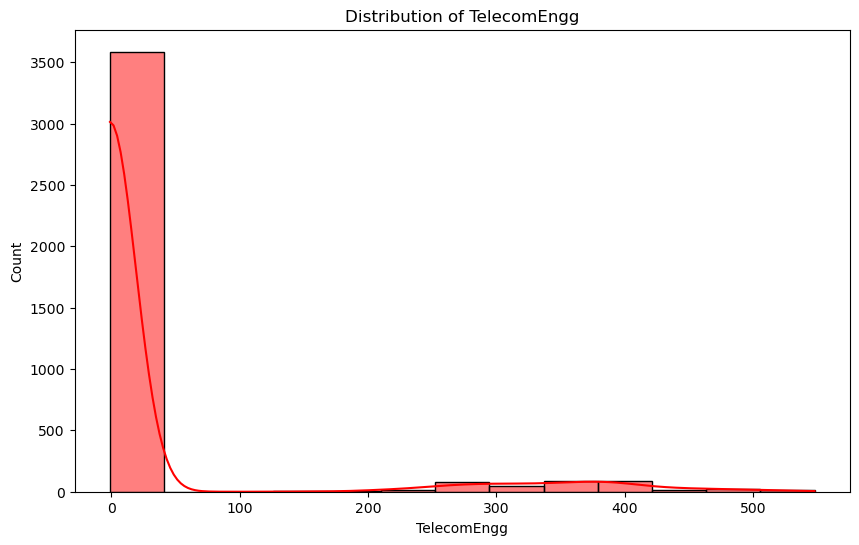

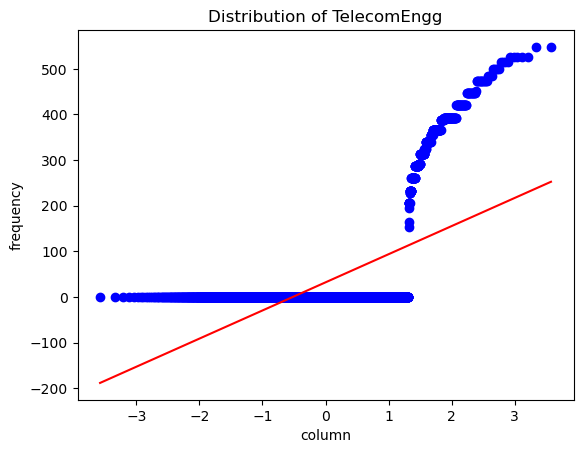

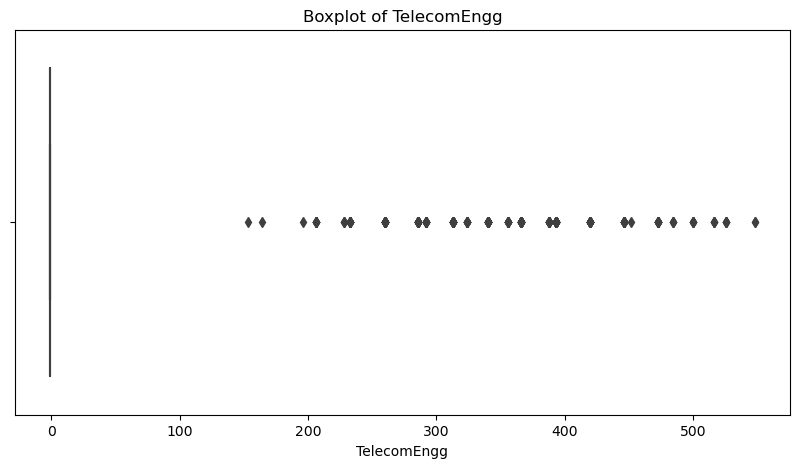

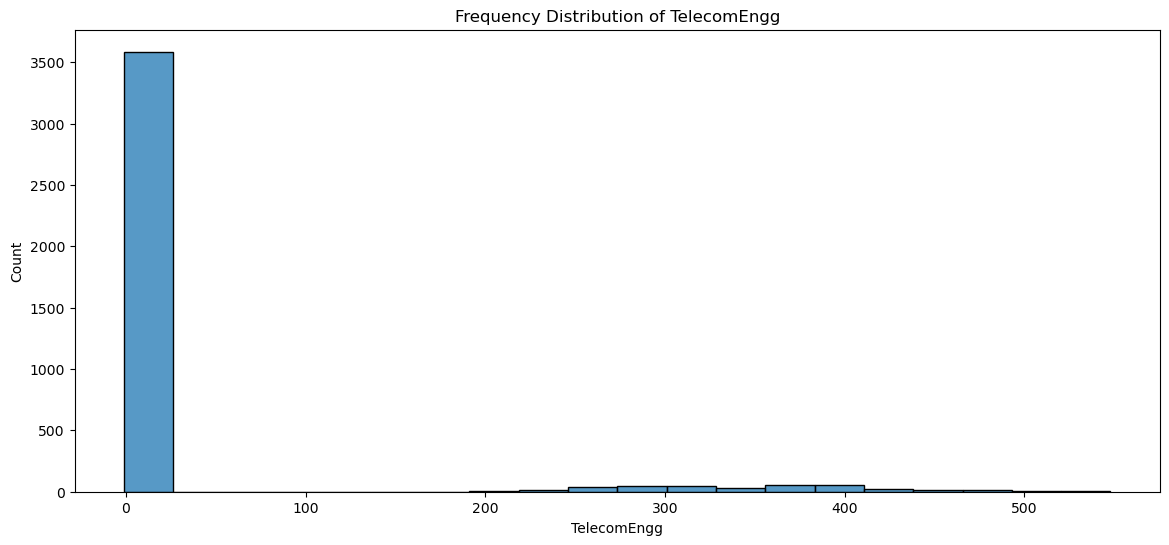

Outliers in TelecomEngg:
           ID    Salary        DOJ        DOL                    Designation  \
12     606655  270000.0 2013-12-01 2015-12-31     quality assurance engineer   
28     918981  145000.0 2015-02-01 2015-04-01     telecommunication engineer   
57     294700  525000.0 2012-03-01 2015-12-31                  test engineer   
62    1218578  145000.0 2014-06-01 2015-12-31                       engineer   
81     661546  280000.0 2014-10-01 2015-04-01                        faculty   
...       ...       ...        ...        ...                            ...   
3937   385546  205000.0 2012-10-01 2014-02-01            production engineer   
3938   340205  300000.0 2014-05-01 2015-12-31     desktop support technician   
3954   531726  310000.0 2014-04-01 2015-04-01  business intelligence analyst   
3990   204287  480000.0 2012-02-01 2015-12-31        senior systems engineer   
3991   230873  630000.0 2011-07-01 2014-10-01                systems analyst   

        JobCit

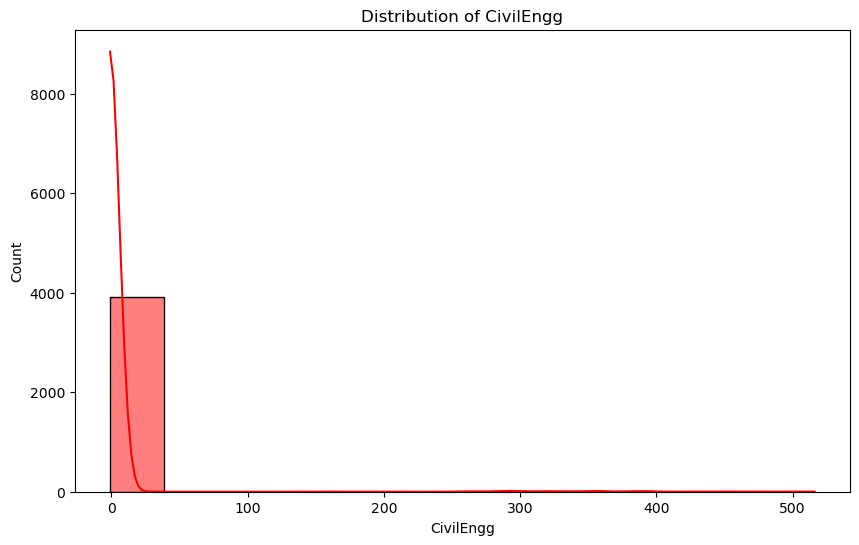

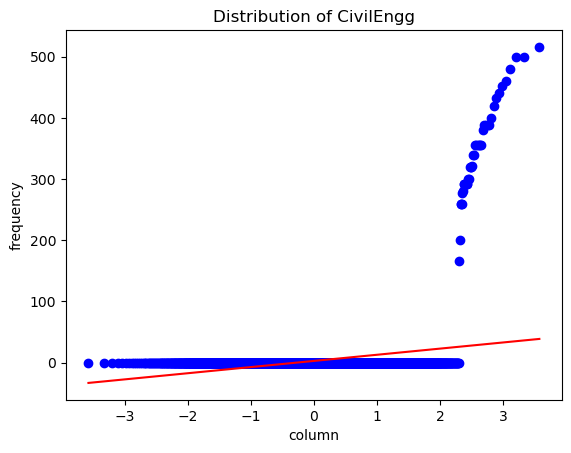

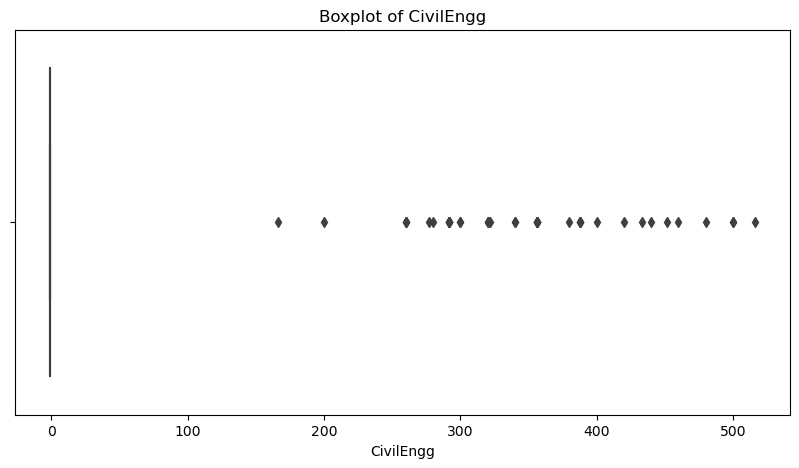

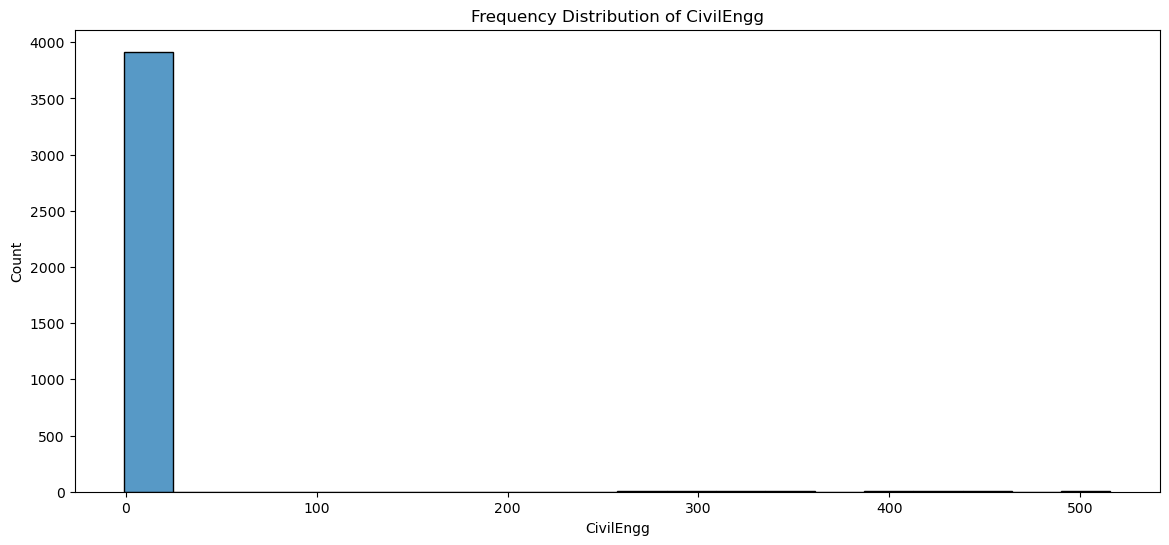

Outliers in CivilEngg:
           ID    Salary        DOJ        DOL                   Designation  \
26      65096  345000.0 2011-01-01 2013-10-01      senior software engineer   
59     536053  120000.0 2009-09-01 2013-04-01             software engineer   
172   1089283  110000.0 2014-06-01 2015-02-01           assistant professor   
211     46302  350000.0 2010-10-01 2013-05-01          maintenance engineer   
222    226736  100000.0 2013-03-01 2013-06-01                    programmer   
331    341114  700000.0 2014-04-01 2015-12-31             assistant manager   
403    795799  405000.0 2014-07-01 2015-12-31             planning engineer   
453   1253724  300000.0 2015-06-01 2015-12-31             software engineer   
492    795862  525000.0 2014-09-01 2015-12-31              business analyst   
493    609066  720000.0 2014-02-01 2015-12-31                  data analyst   
505    112626  500000.0 2011-08-01 2015-12-31          application engineer   
605    319130  350000.0 2012-

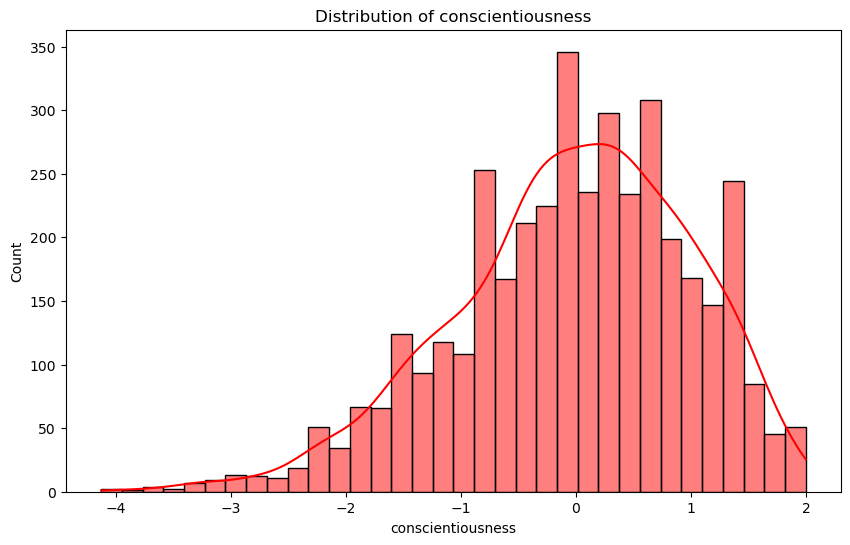

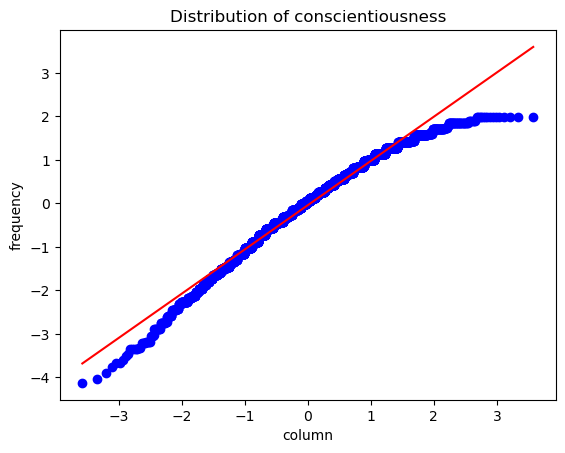

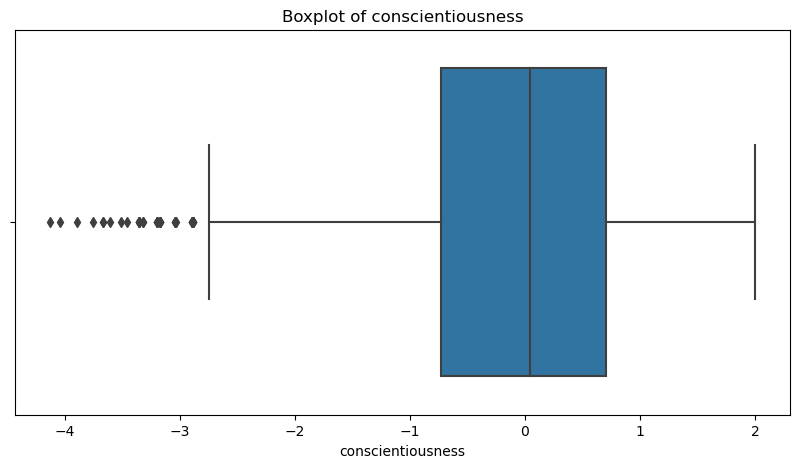

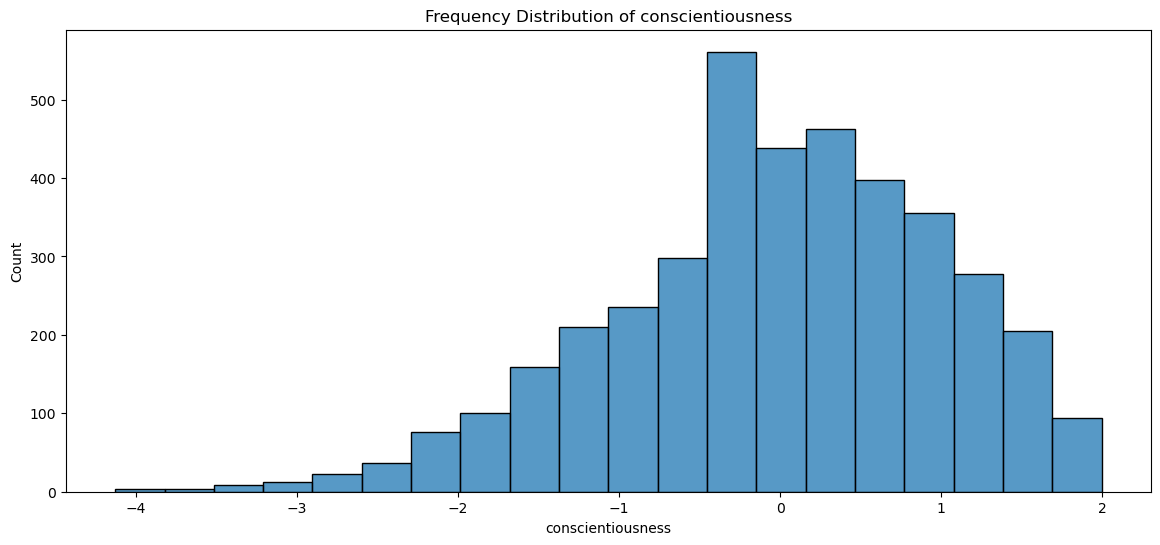

Outliers in conscientiousness:
           ID     Salary        DOJ        DOL  \
159    755080   340000.0 2014-06-01 2015-04-01   
210     30739   310000.0 2010-09-01 2012-03-01   
315    232430   360000.0 2012-05-01 2015-12-31   
335   1042343   120000.0 2014-02-01 2015-12-31   
373    215639   370000.0 2014-03-01 2015-12-31   
382     50739   260000.0 2011-03-01 2015-12-31   
408   1175511   280000.0 2015-02-01 2015-07-01   
468   1073243   240000.0 2013-07-01 2015-12-31   
523   1061906   120000.0 2014-03-01 2015-04-01   
1211   632729   420000.0 2013-08-01 2015-12-31   
1337   355018   285000.0 2013-02-01 2015-12-31   
1353   578644   350000.0 2013-06-01 2015-12-31   
1684   455020   450000.0 2013-03-01 2015-12-31   
1687   326762   450000.0 2013-03-01 2015-03-01   
1972   228051   605000.0 2012-05-01 2014-12-01   
2005   225959   395000.0 2013-09-01 2015-12-31   
2046   309046   250000.0 2014-02-01 2015-01-01   
2101   358268   450000.0 2013-03-01 2015-12-31   
2182    41147  4000

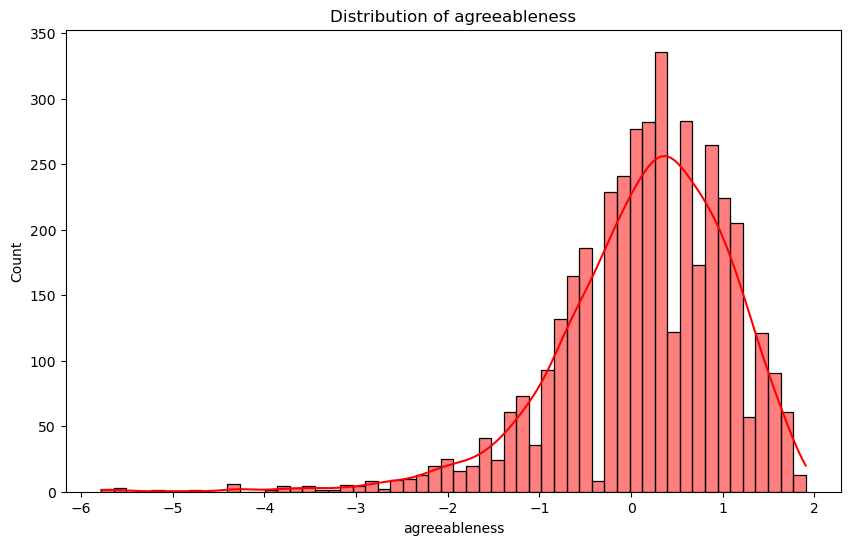

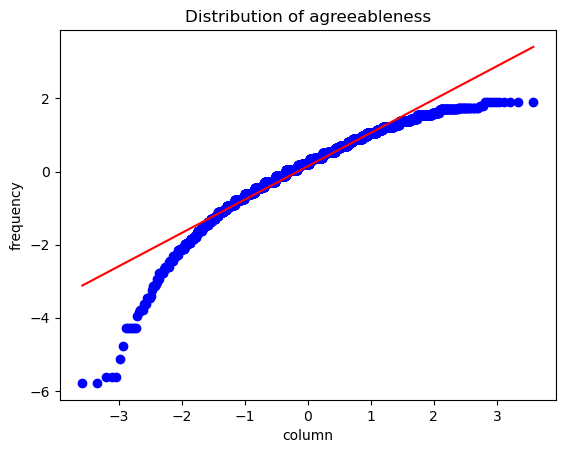

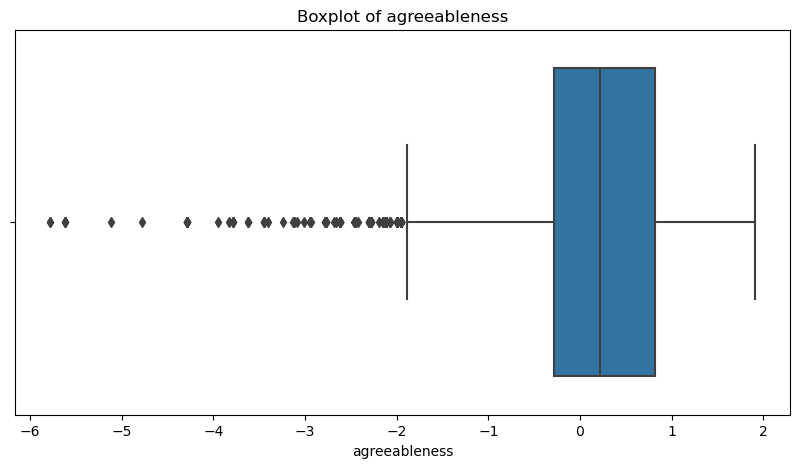

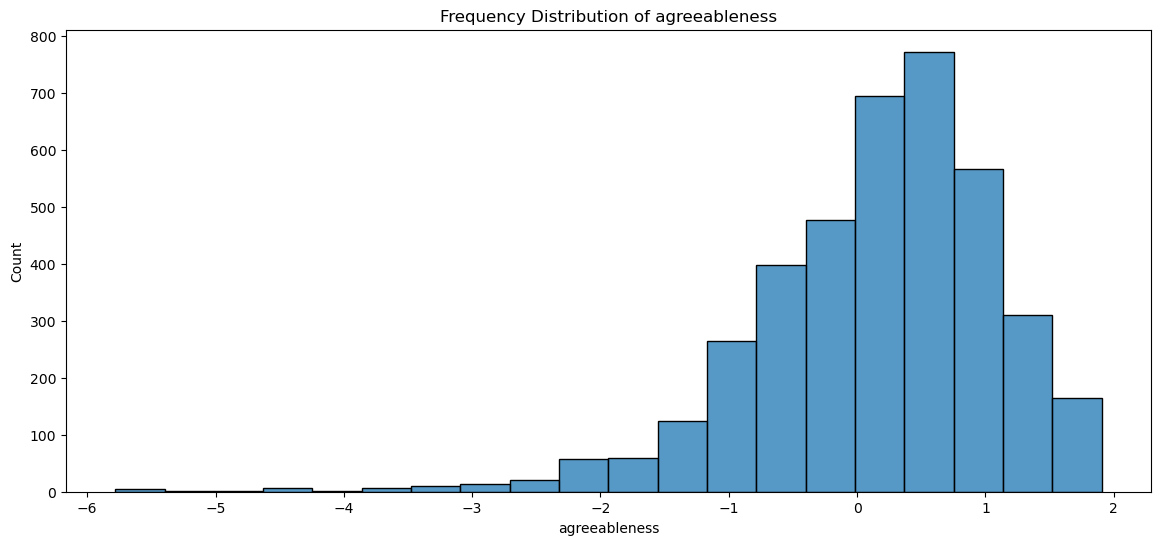

Outliers in agreeableness:
           ID    Salary        DOJ        DOL                  Designation  \
23     990077  180000.0 2014-08-01 2015-04-01  electrical project engineer   
43    1207660  120000.0 2014-04-01 2015-04-01               .net developer   
63     636871  150000.0 2014-10-01 2015-04-01           management trainee   
67     810433  400000.0 2014-08-01 2015-02-01                test engineer   
157    728009  405000.0 2013-08-01 2015-12-31              system engineer   
...       ...       ...        ...        ...                          ...   
3843   661427  240000.0 2013-08-01 2013-08-01                test engineer   
3855   530061  300000.0 2014-09-01 2015-12-31             engineer trainee   
3878   663824  260000.0 2013-10-01 2015-12-31            software engineer   
3939   716325  100000.0 2013-07-01 2014-12-01            software engineer   
3953   331779  160000.0 2013-05-01 2015-12-31       software test engineer   

         JobCity Gender        DOB  

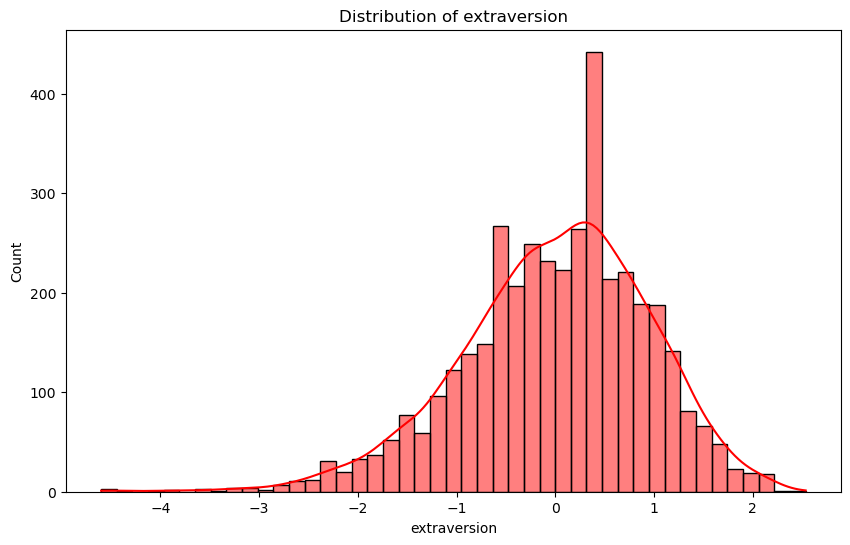

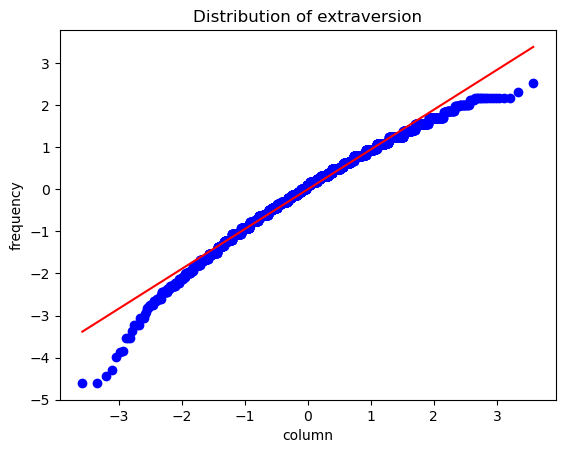

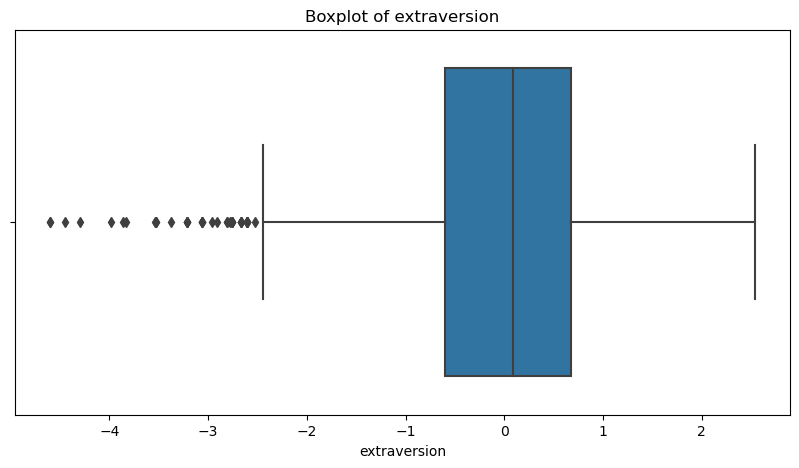

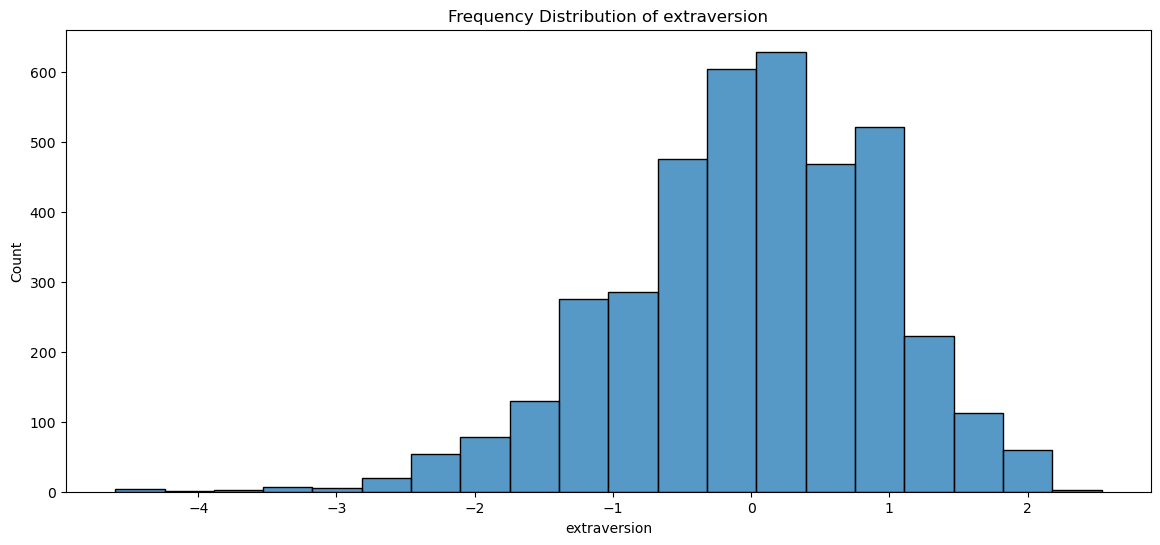

Outliers in extraversion:
           ID    Salary        DOJ        DOL                   Designation  \
63     636871  150000.0 2014-10-01 2015-04-01            management trainee   
159    755080  340000.0 2014-06-01 2015-04-01             asp.net developer   
335   1042343  120000.0 2014-02-01 2015-12-31           electrical engineer   
408   1175511  280000.0 2015-02-01 2015-07-01                  web designer   
523   1061906  120000.0 2014-03-01 2015-04-01     junior software developer   
666    820152  110000.0 2014-01-01 2015-12-31            software developer   
726    471413  480000.0 2013-07-01 2015-04-01        java software engineer   
1169   179878  105000.0 2011-01-01 2011-06-01              software trainee   
1211   632729  420000.0 2013-08-01 2015-12-31       senior network engineer   
1217   669692  600000.0 2014-10-01 2015-02-01             assistant manager   
1242   319644  395000.0 2012-06-01 2015-04-01              project engineer   
1353   578644  350000.0 20

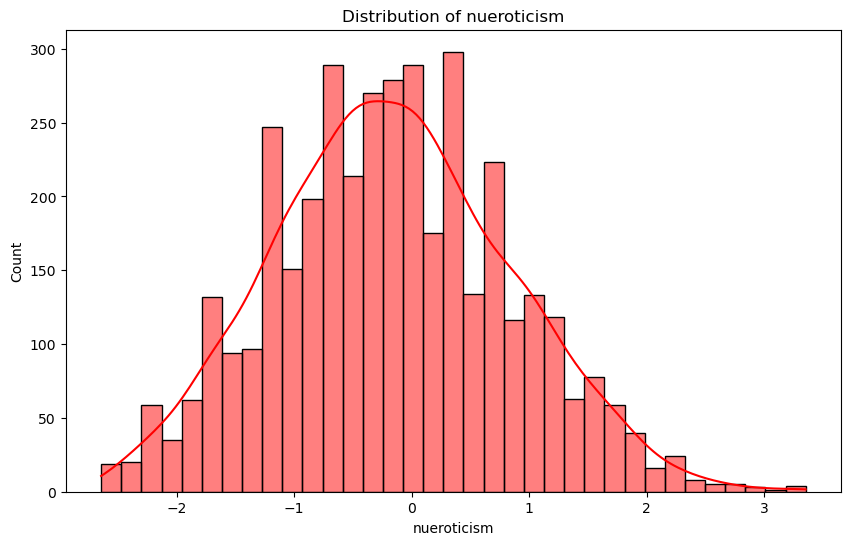

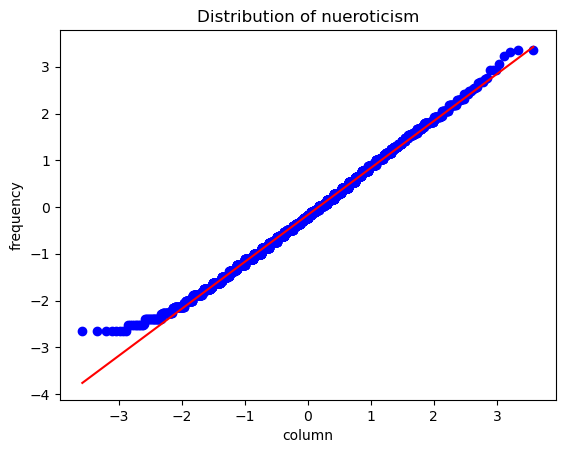

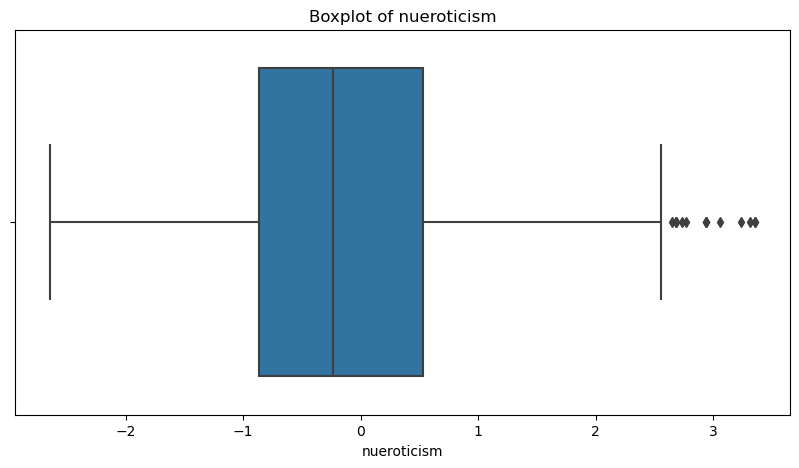

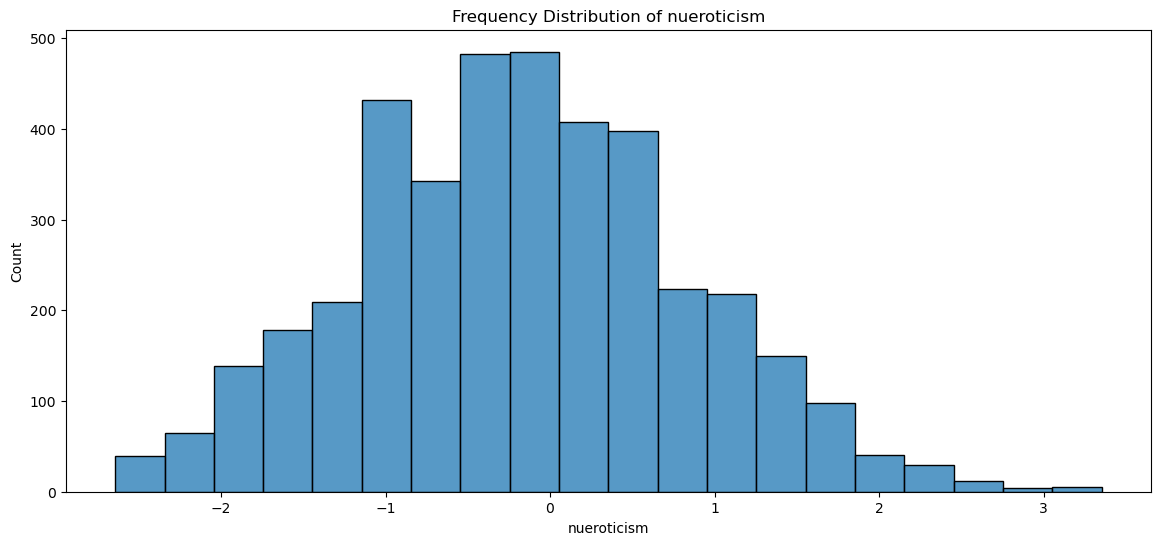

Outliers in nueroticism:
           ID    Salary        DOJ        DOL                 Designation  \
222    226736  100000.0 2013-03-01 2013-06-01                  programmer   
405    601563  145000.0 2013-10-01 2014-07-01             sales executive   
1151   346395  140000.0 2012-07-01 2014-01-01           software engineer   
1191   356498  445000.0 2013-03-01 2015-05-01             system engineer   
1383   349752  550000.0 2012-06-01 2015-12-31           assistant manager   
1602   862240  180000.0 2014-04-01 2015-04-01      software test engineer   
1843   843714  280000.0 2013-08-01 2015-12-31      software test engineer   
2054   348114  335000.0 2013-07-01 2015-12-31            systems engineer   
2234   530441  360000.0 2014-02-01 2015-12-31  project management officer   
2275  1052796  100000.0 2014-01-01 2015-12-31          software developer   
2608   914037  180000.0 2014-10-01 2015-01-01           asp.net developer   
2859  1152368  180000.0 2014-01-01 2015-02-01      

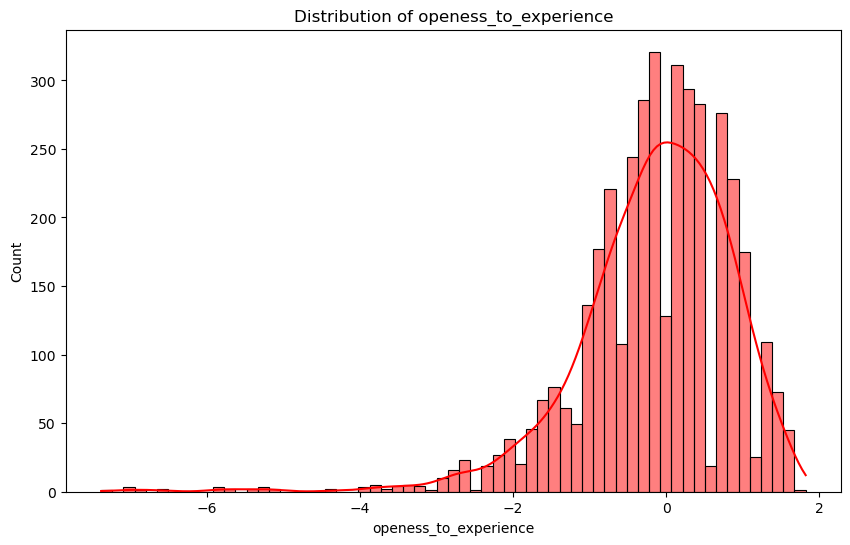

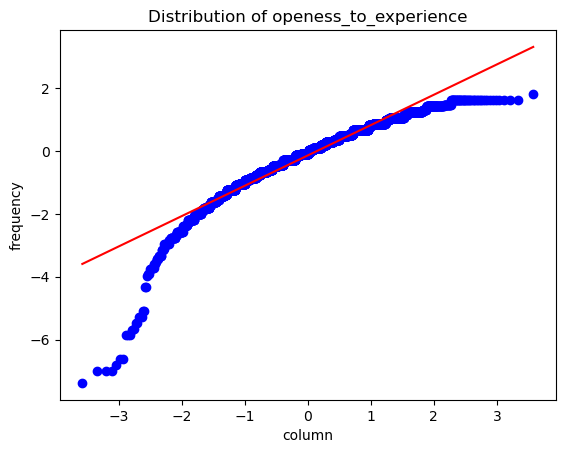

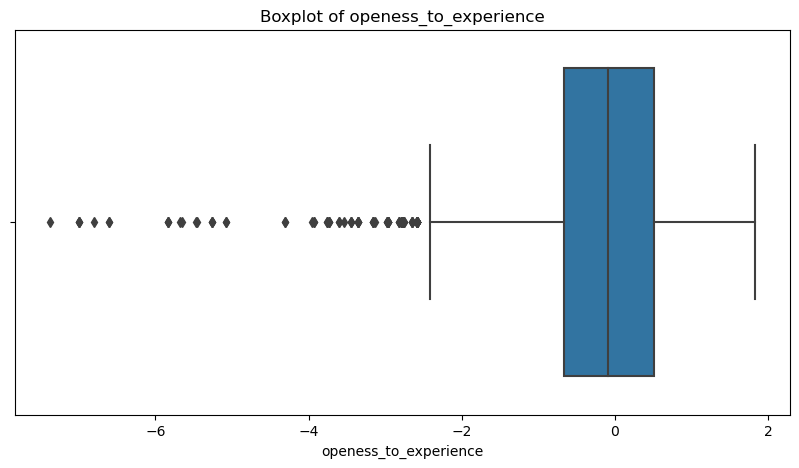

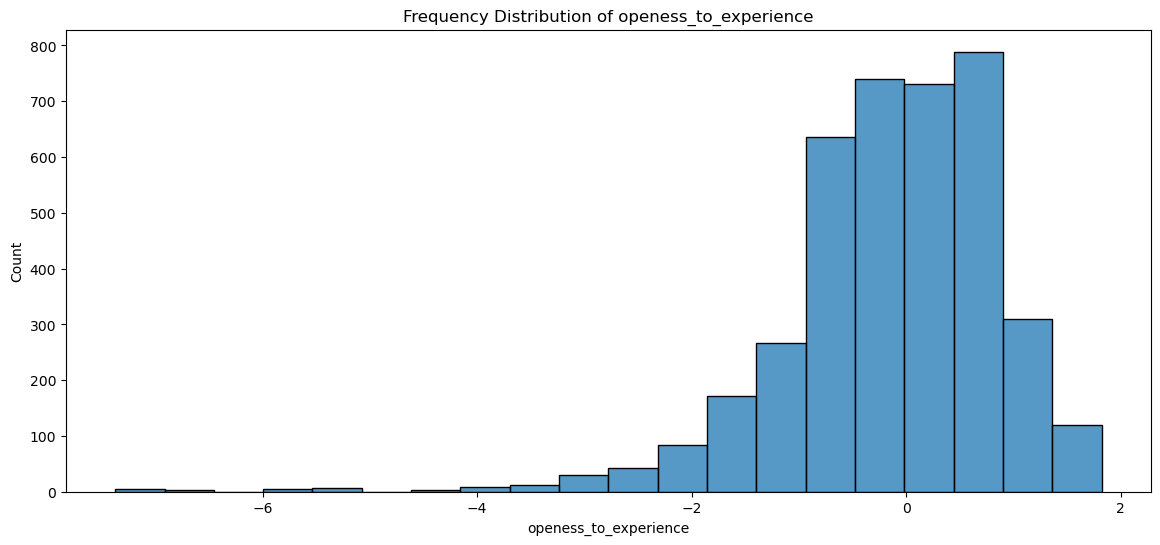

Outliers in openess_to_experience:
           ID    Salary        DOJ        DOL                     Designation  \
22     995191  190000.0 2013-10-01 2015-04-01                       developer   
23     990077  180000.0 2014-08-01 2015-04-01     electrical project engineer   
43    1207660  120000.0 2014-04-01 2015-04-01                  .net developer   
63     636871  150000.0 2014-10-01 2015-04-01              management trainee   
128    206734  675000.0 2011-11-01 2015-12-31        senior software engineer   
...       ...       ...        ...        ...                             ...   
3868   618243  320000.0 2013-06-01 2015-12-31                project engineer   
3892  1089287  300000.0 2014-08-01 2015-12-31          manufacturing engineer   
3901   677204  390000.0 2013-07-01 2015-04-01  software engineering associate   
3918   988486  120000.0 2014-08-01 2015-12-31            system administrator   
3957   425242  180000.0 2012-09-01 2013-10-01           network administra

In [21]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    

    # Histogram 
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True,color='red')
    plt.title(f'Distribution of {column}')
    plt.show()
    
    #QQ plot
    stats.probplot(data[column],dist='norm',plot=plt)
    plt.title(f'Distribution of {column}')
    plt.xlabel('column')
    plt.ylabel('frequency')
    plt.show()
    
  
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

    # Frequency 
    
    plt.figure(figsize=(14, 6))
    sns.histplot(data[column], bins=20, kde=False)
    plt.title(f'Frequency Distribution of {column}')
    plt.show()
    
    
    #outliers 
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    print(f'Outliers in {column}:\n{outliers}')
    

# observations

- Salary   :    Distribution is right skewed and there is very less outlier data .
- 10percentage : distribution is nearly normally distributed and there is large outlier .
- 12graduation : distribution is nearly normal distribution  and have few outlier
- 12percentage : iit has is normal distribution .
- collegeGPA   : it has  is normal distribution with lots of outlier .
- English      : it has  is normal distribution with lots of outlier .
- Logical      :it has  is normal distribution with few of outlier .
- Quant        : it has  is normal distribution with very little of outliers .
- ComputerProgramming:  it has  is normal distribution with few outliers.
- conscientiousness  :  it has  is normal distribution with lots of  outliers.
- agreeableness:  it has  is normal distribution with lots of outliers.
- extraversion :  it has  is normal distribution with lots of outliers.
- nueroticsm   :  it has  is normal distribution with few outliers.
- openess_to_experience   : it has  is left skewed distribution with lots of outliers.

# Categorical  Analysis

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3997
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3958 non-null   int64         
 1   Salary                 3958 non-null   float64       
 2   DOJ                    3958 non-null   datetime64[ns]
 3   DOL                    3958 non-null   datetime64[ns]
 4   Designation            3958 non-null   object        
 5   JobCity                3958 non-null   object        
 6   Gender                 3958 non-null   object        
 7   DOB                    3958 non-null   datetime64[ns]
 8   10percentage           3958 non-null   float64       
 9   10board                3958 non-null   object        
 10  12graduation           3958 non-null   int64         
 11  12percentage           3958 non-null   float64       
 12  12board                3958 non-null   object        
 13  Col

<Axes: ylabel='Gender'>

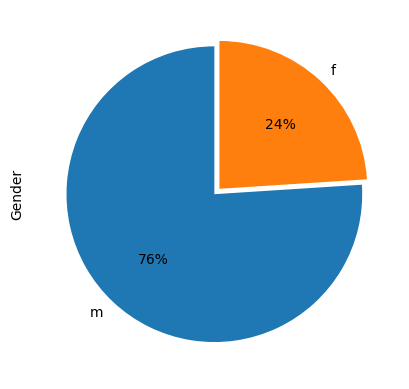

In [23]:
data['Gender'].value_counts().plot.pie(autopct="%0.0f%%",startangle=90,explode=(0,0.05))

<Axes: ylabel='Degree'>

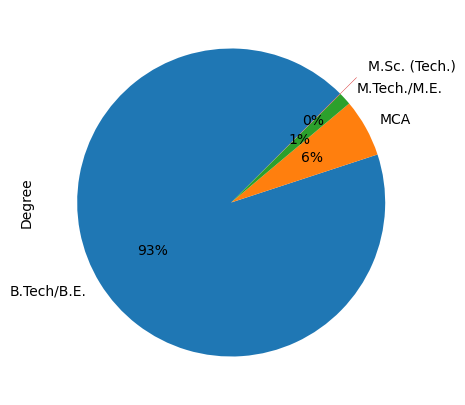

In [24]:
data['Degree'].value_counts().plot.pie(autopct="%0.0f%%",startangle=45,explode=(0,0,0,0.15),figsize=(14,5))

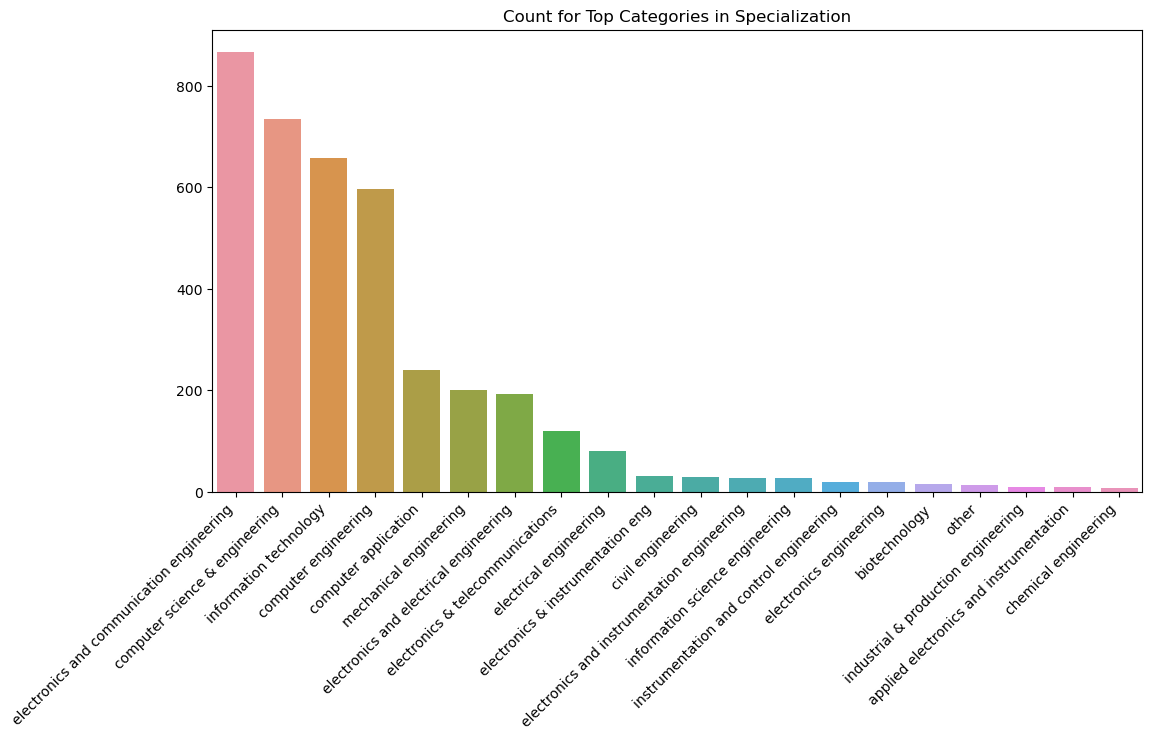

In [40]:
most_specialization=data['Specialization'].value_counts().nlargest(20)
plt.figure(figsize=(12,6))
sns.barplot(x=most_specialization.index,y=most_specialization.values)
plt.xticks(rotation=45,ha='right')
plt.yticks()
plt.title("Count for Top Categories in Specialization")
plt.show()

In [44]:
data['CollegeState'].nunique()

26

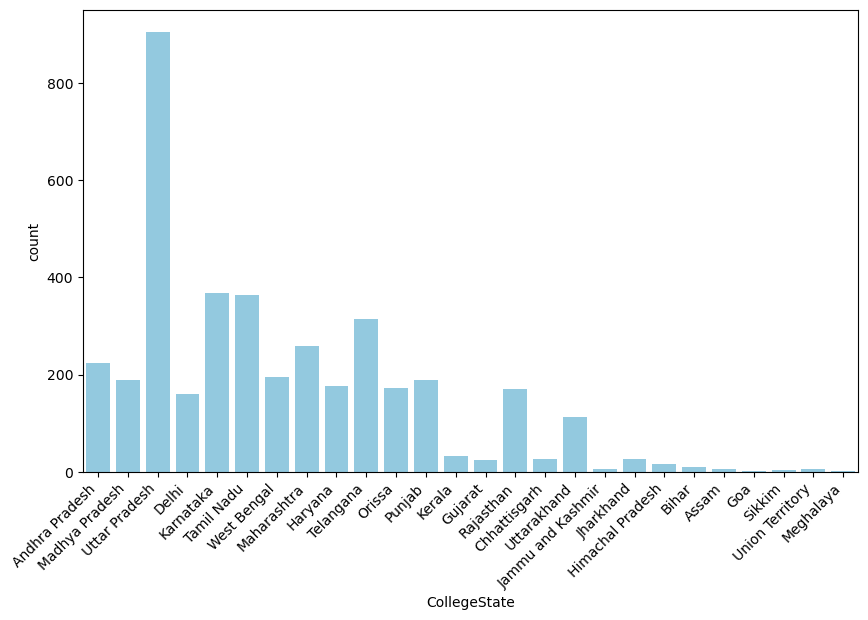

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x='CollegeState',color='skyblue')
plt.xticks(rotation=45,ha='right')
plt.yticks()
plt.show()

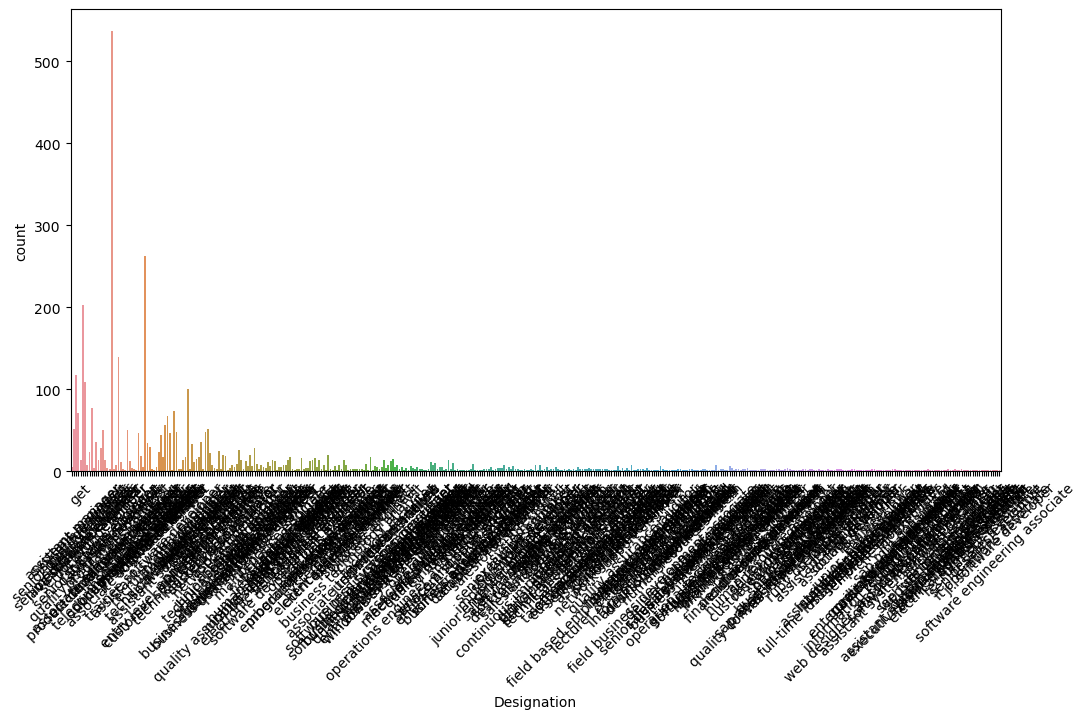

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='Designation',data=data)
plt.xticks(rotation=45)
plt.yticks()
plt.show()

In [27]:
data['JobCity'].value_counts().sort_values().nlargest(20)

Bangalore        626
-1               449
Noida            362
Hyderabad        331
Pune             287
Chennai          270
New Delhi        196
Gurgaon          194
Mumbai           108
Kolkata           98
Jaipur            46
Mysore            35
Lucknow           35
Navi Mumbai       32
chennai           27
pune              26
Greater Noida     26
Chandigarh        26
Indore            24
Bhubaneswar       22
Name: JobCity, dtype: int64

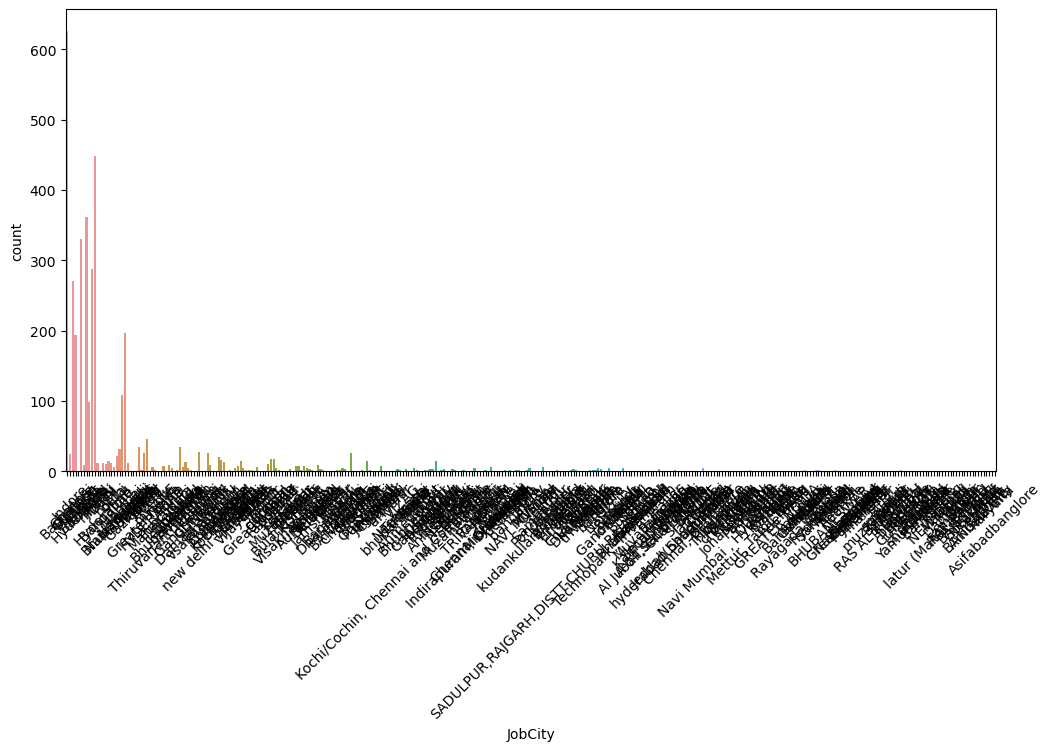

In [28]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['JobCity'],data=data)
plt.xticks(rotation=45)
plt.yticks()
plt.show()

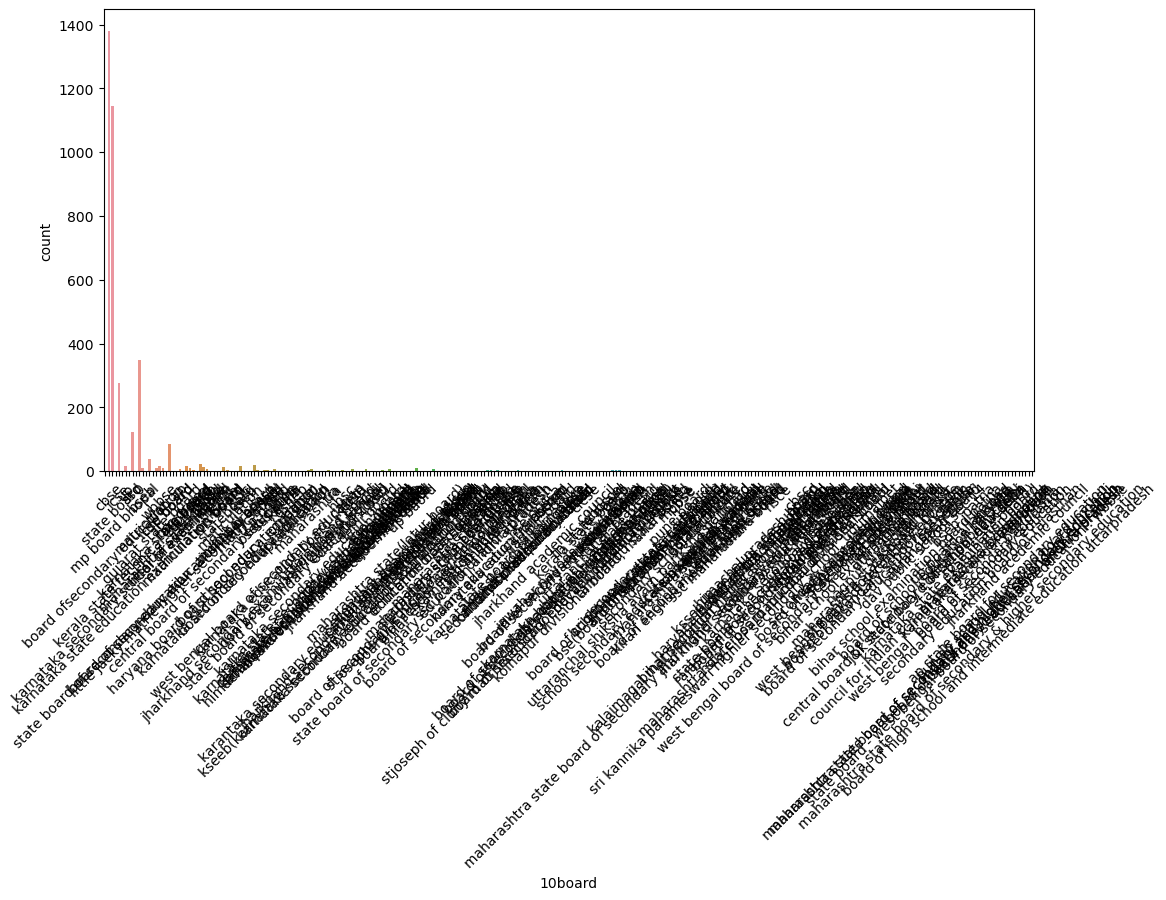

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['10board'],data=data)
plt.xticks(rotation=45)
plt.yticks()
plt.show()

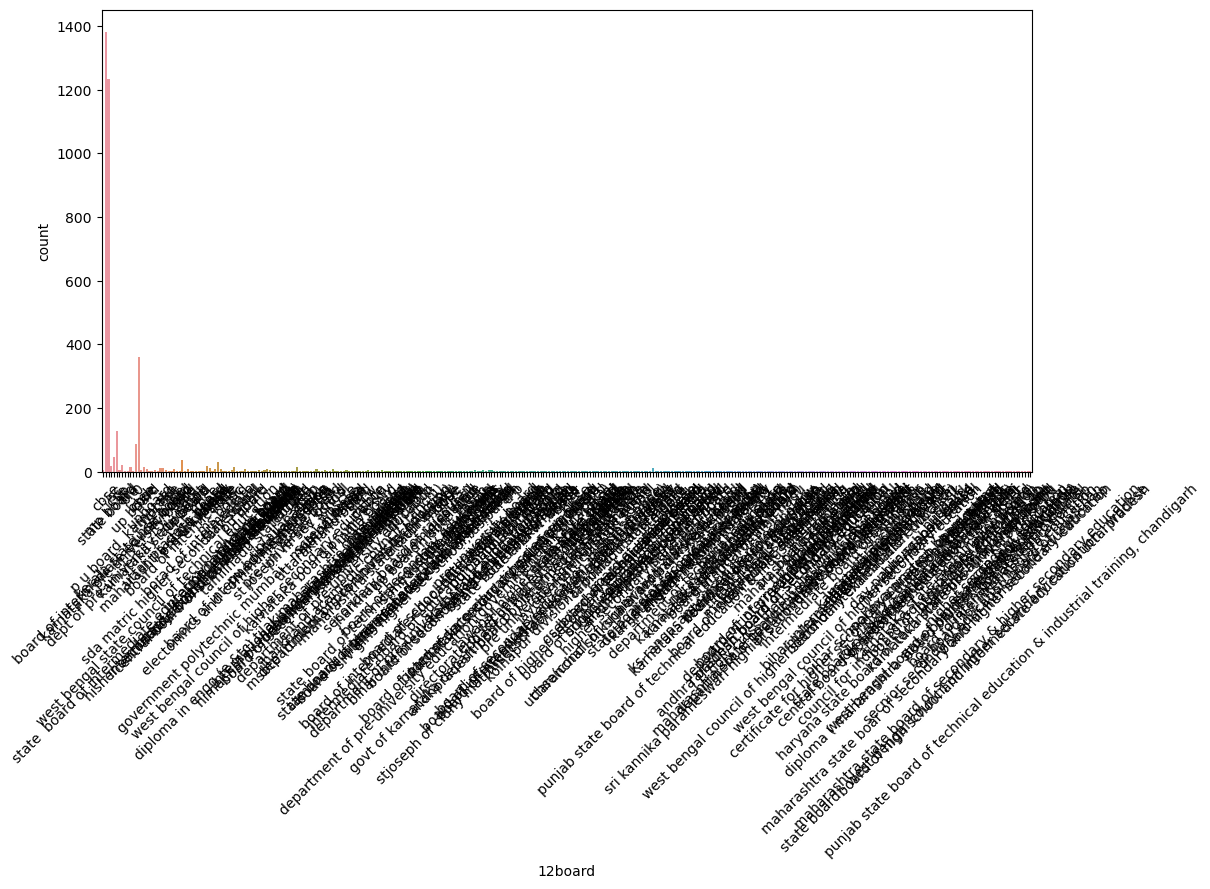

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['12board'],data=data)
plt.xticks(rotation=45)
plt.yticks()
plt.show()

# Observation

- In Gender Column Male(76%) aspirants are compared to females(24%).
- In Degree column mostly people took  B.Tech/B.E (93%) as there degree followed by MCA(6%) ,Mtech(1%) and MSC(0%).
- In specialization most of them took electronics and communication engineering followed by computer science and information   technology and then computer engineering
- Most of peoples college state is Uttar Pradesh

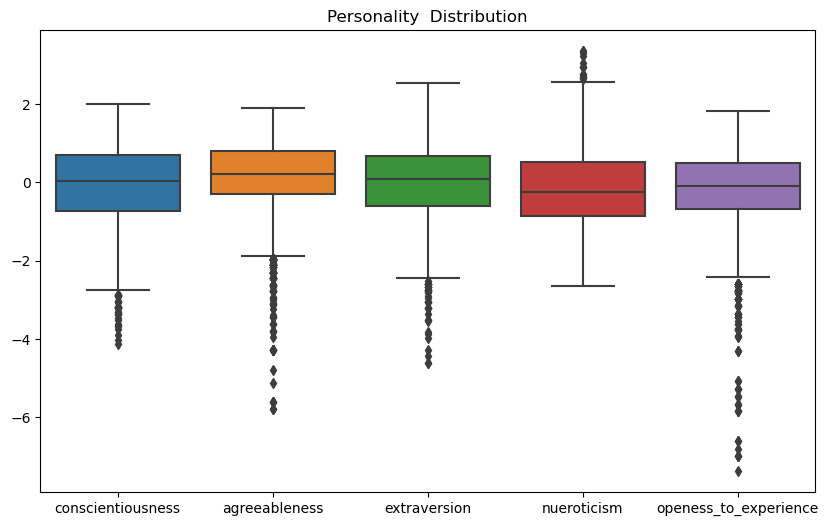

In [58]:
float_columns= ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[float_columns])
plt.title('Personality  Distribution')
plt.show()

- openess_to_experience has high outliers and in nueroticism least outliers

**Analysis on Target column**

In [59]:
data['Salary']

0        420000.0
1        500000.0
2        325000.0
3       1100000.0
4        200000.0
          ...    
3993     280000.0
3994     100000.0
3995     320000.0
3996     200000.0
3997     400000.0
Name: Salary, Length: 3958, dtype: float64

In [60]:
data['Salary'].nunique()

176

In [61]:
data['Salary'].value_counts()

300000.0     291
180000.0     237
200000.0     202
325000.0     187
120000.0     160
            ... 
2050000.0      1
144000.0       1
1320000.0      1
755000.0       1
925000.0       1
Name: Salary, Length: 176, dtype: int64

In [68]:
data['Salary'].agg({'min','max','std','skew','kurtosis'})

min         3.500000e+04
std         2.122649e+05
skew        6.502468e+00
max         4.000000e+06
kurtosis    8.216939e+01
Name: Salary, dtype: float64

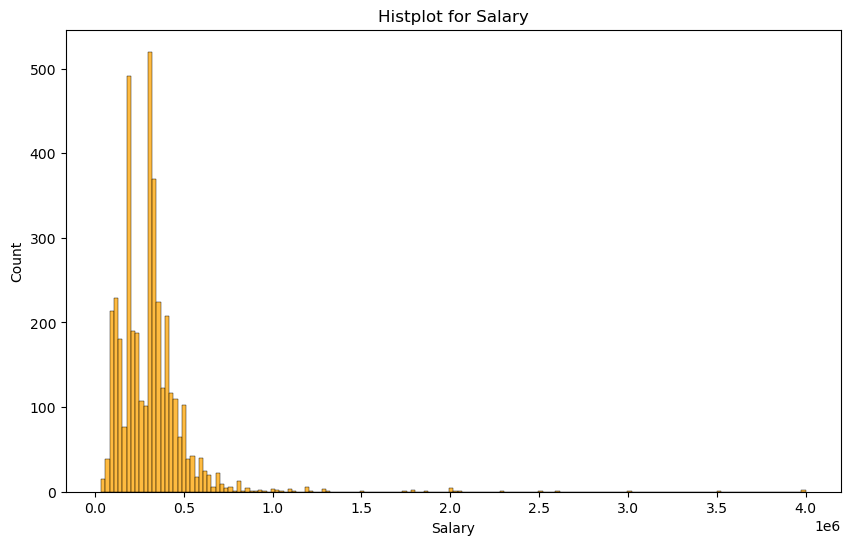

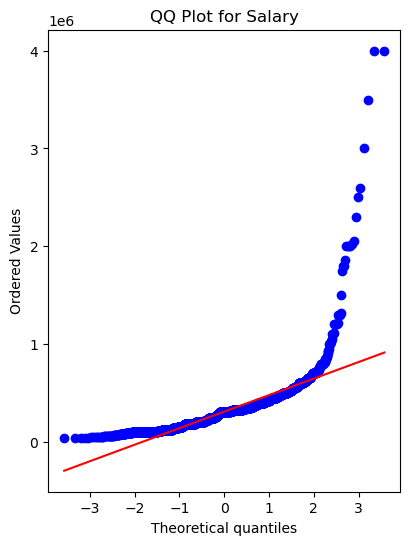

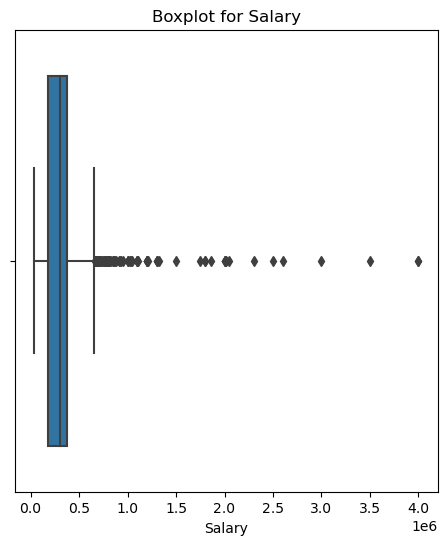

In [98]:
plt.figure(figsize=(10,6))
plt.subplot(1,1,1)
sns.histplot(data=data,x='Salary',color='orange')
plt.title("Histplot for Salary")
plt.show()

#QQ Plot
plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
stats.probplot(data['Salary'],dist='norm',plot=plt)
plt.title("QQ Plot for Salary")
plt.show()

#Boxplot for salary
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
sns.boxplot(data=data,x='Salary')
plt.title("Boxplot for Salary")
plt.show()

In [102]:
Q1 = data['Salary'].quantile(0.25)
Q3 = data['Salary'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Salary'] < Q1 - 1.5 * IQR) | (data['Salary'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")
print(outliers[['Salary']])

Number of outliers: 107
         Salary
3     1100000.0
76     800000.0
123   1200000.0
128    675000.0
166   1860000.0
...         ...
3823   775000.0
3904   850000.0
3912   730000.0
3961   700000.0
3992   800000.0

[107 rows x 1 columns]


# Bivariate Analysis

Text(0.5, 1.0, 'Scatter Plot for Salary vs ComputerProgramming')

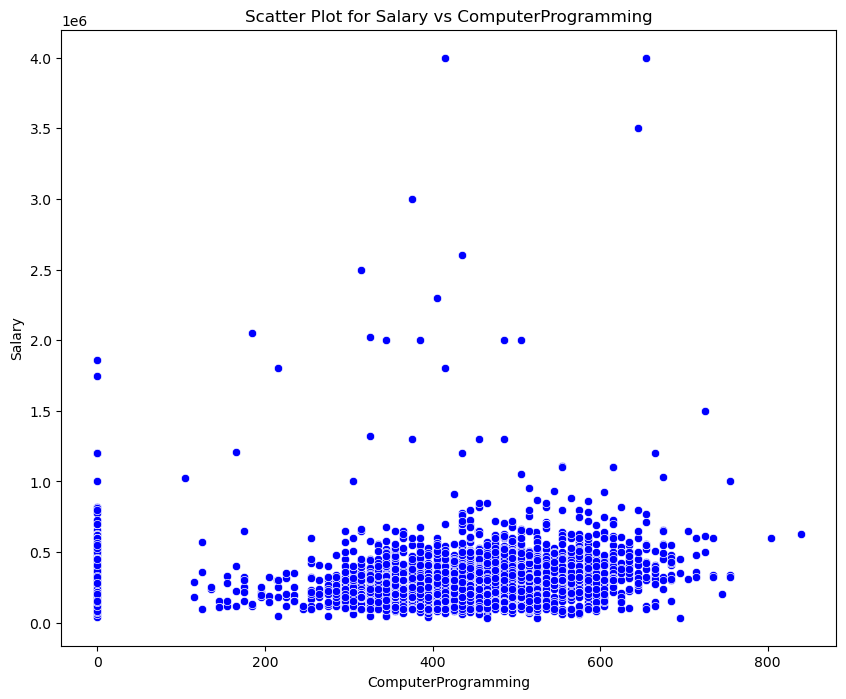

In [109]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='ComputerProgramming', y='Salary', data=data, color='blue')
plt.xlabel('ComputerProgramming')
plt.ylabel('Salary')
plt.title("Scatter Plot for Salary vs ComputerProgramming")

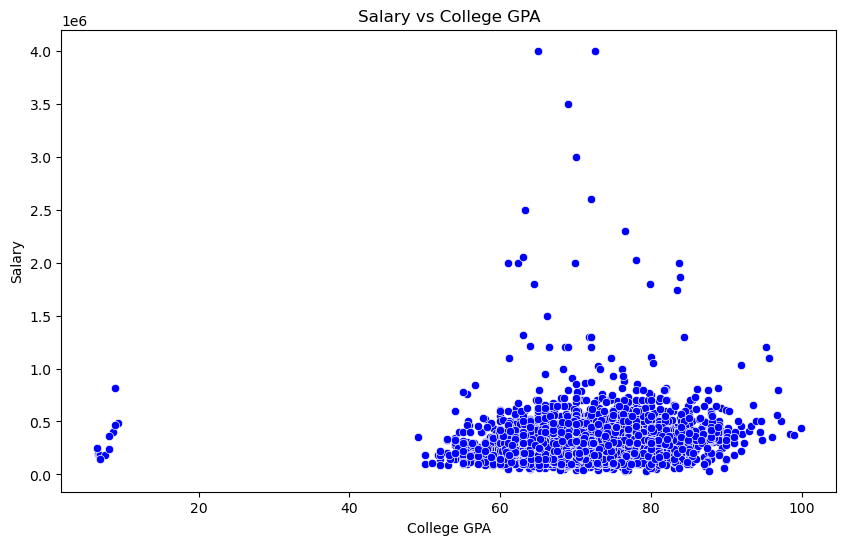

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=data, color='blue')
plt.title('Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()

**Realationship with Target and othrer Numeric columns**

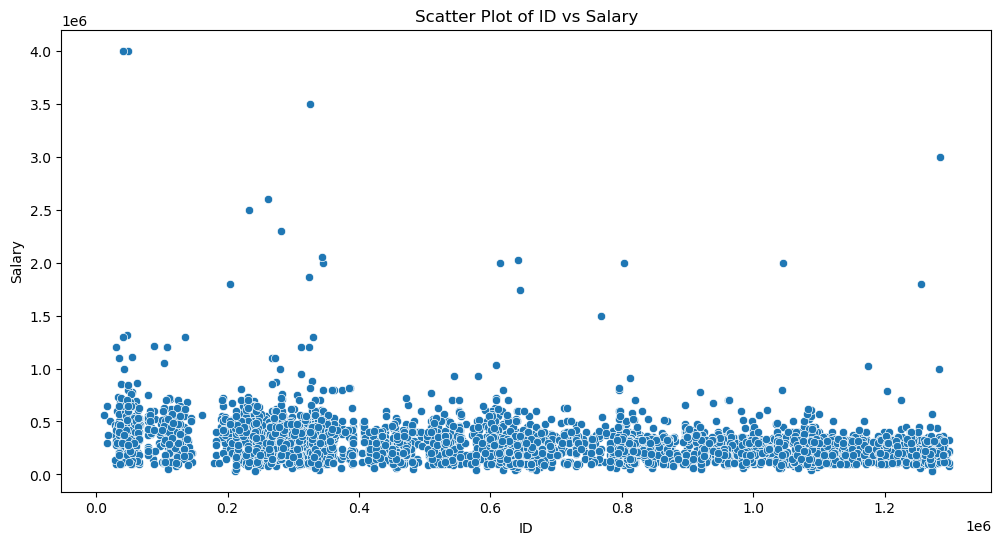

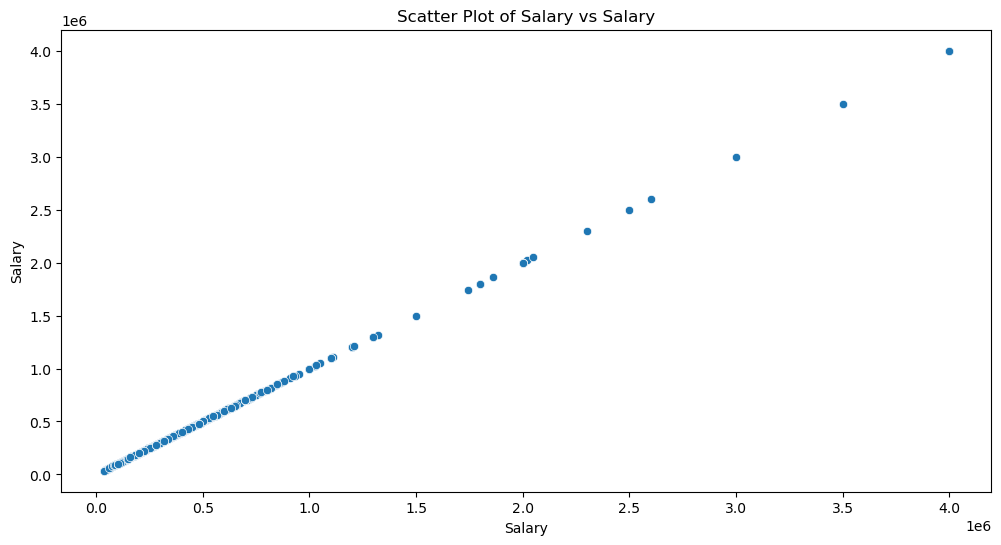

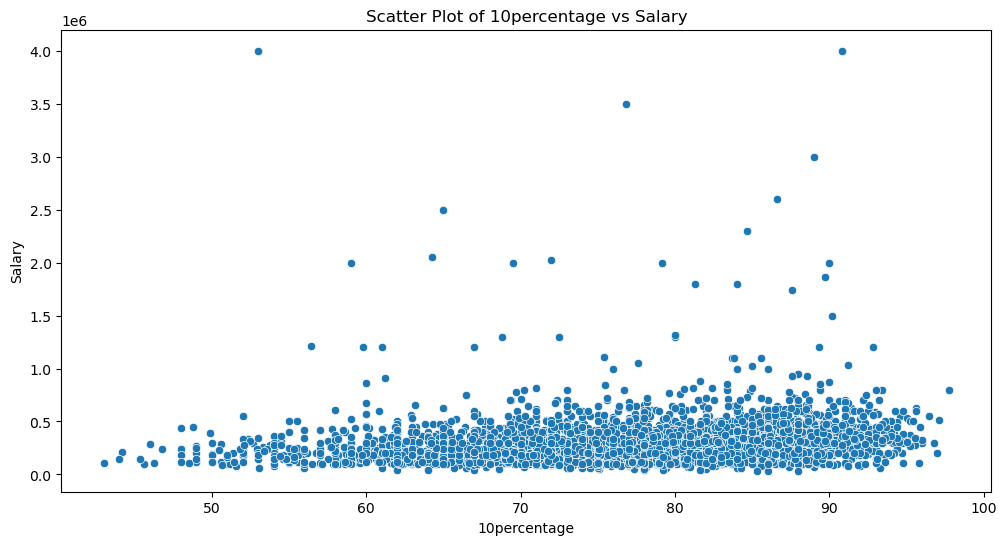

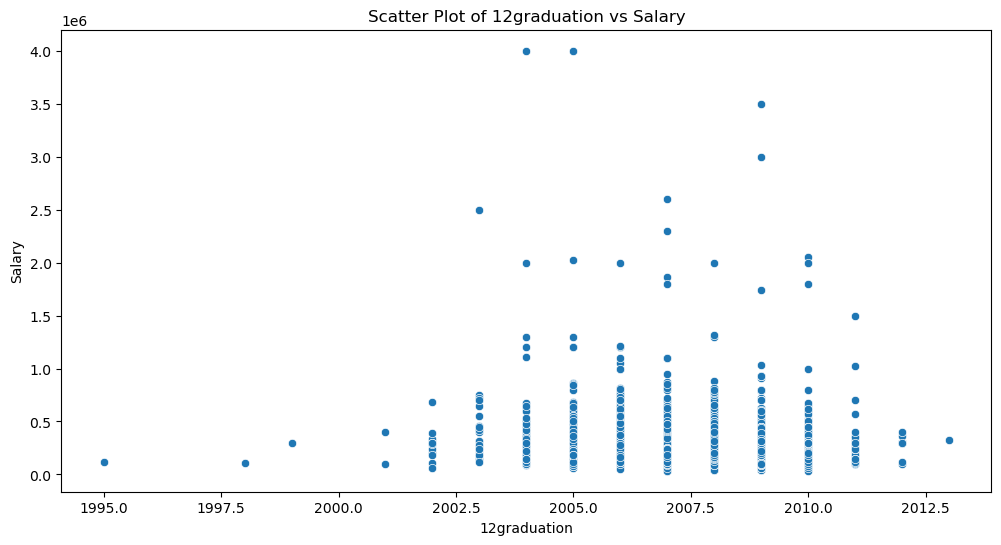

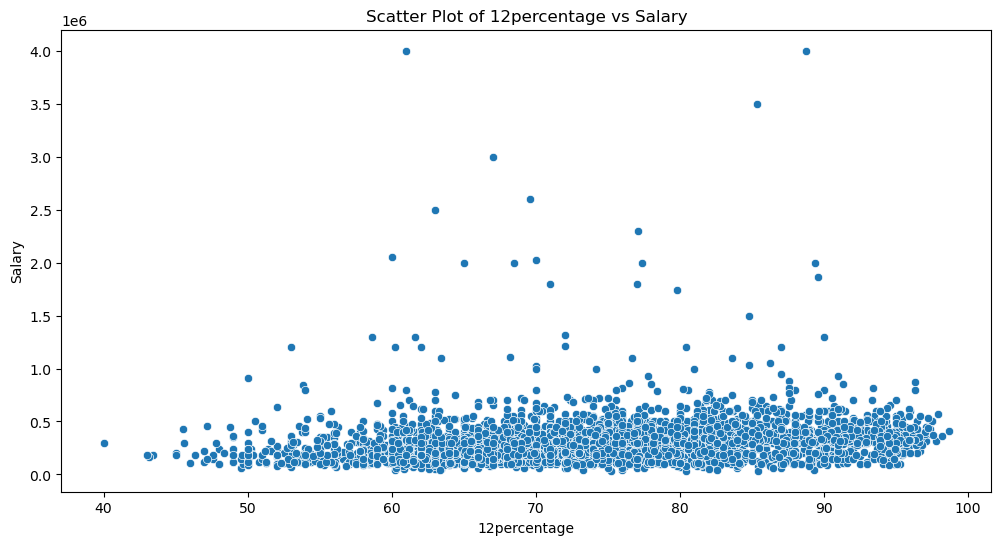

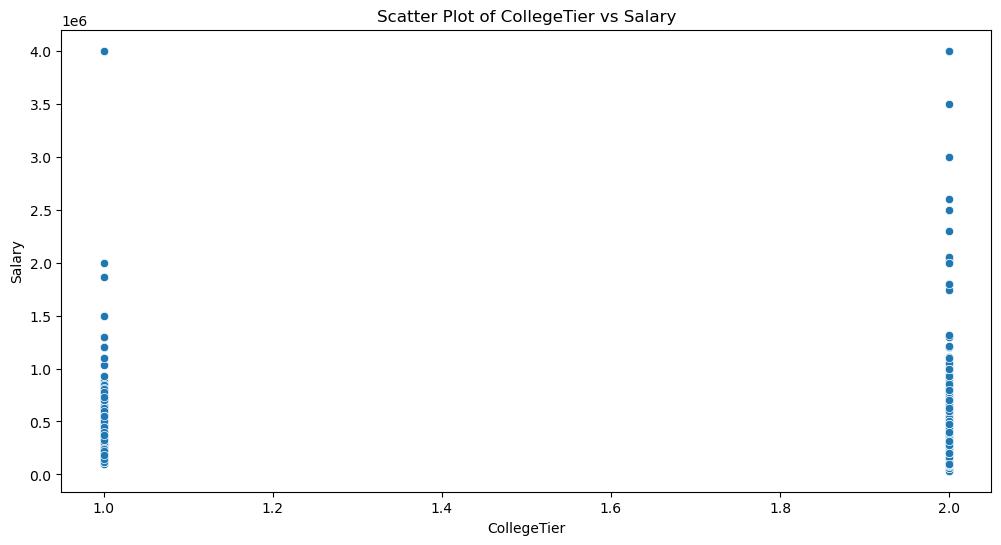

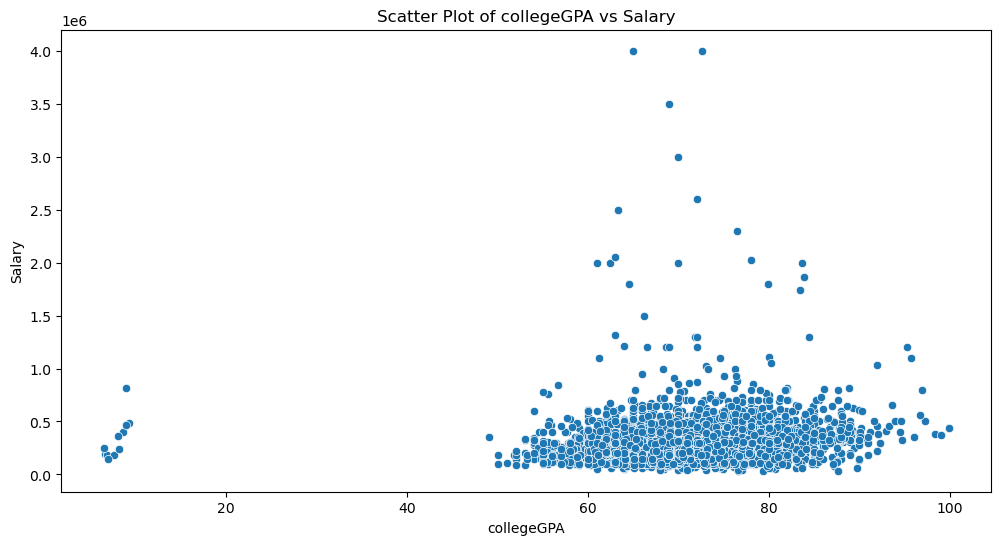

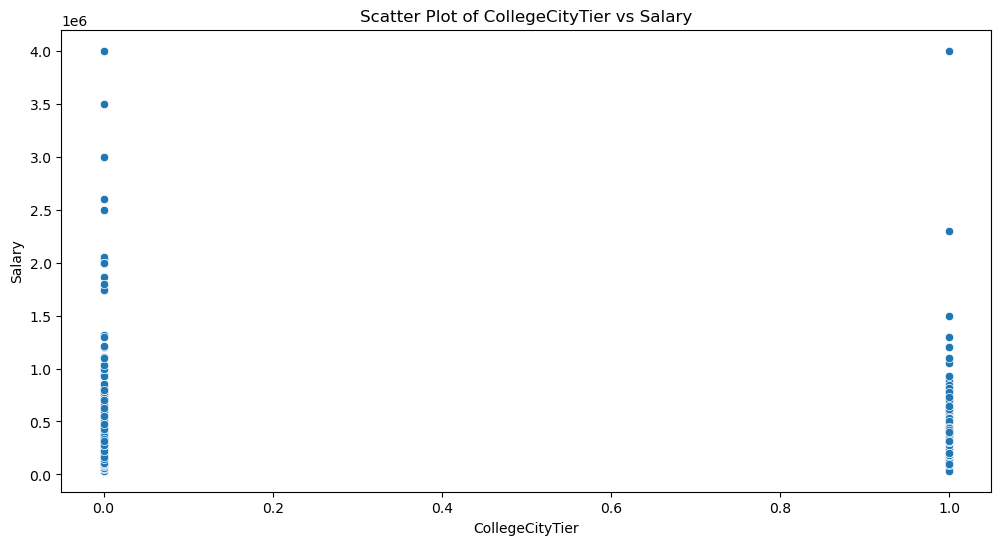

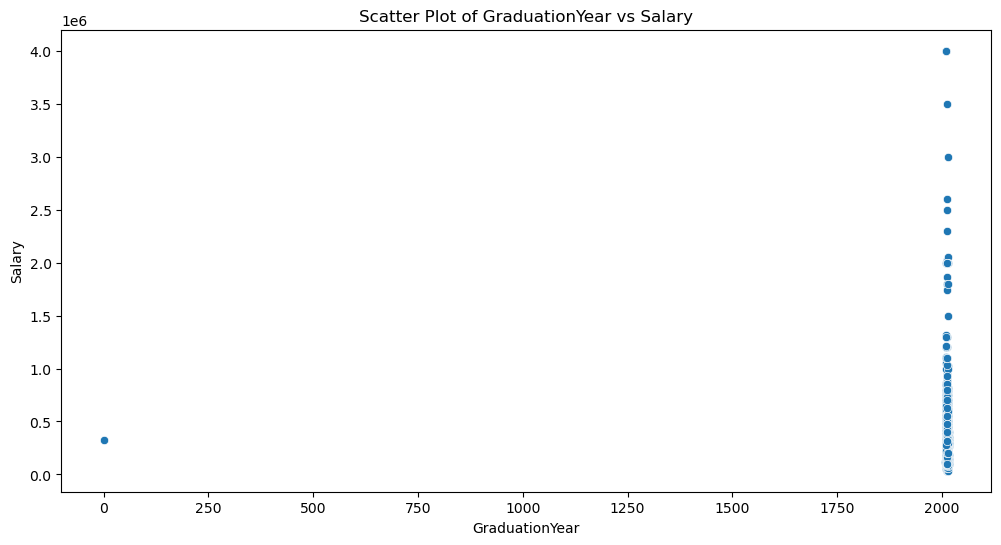

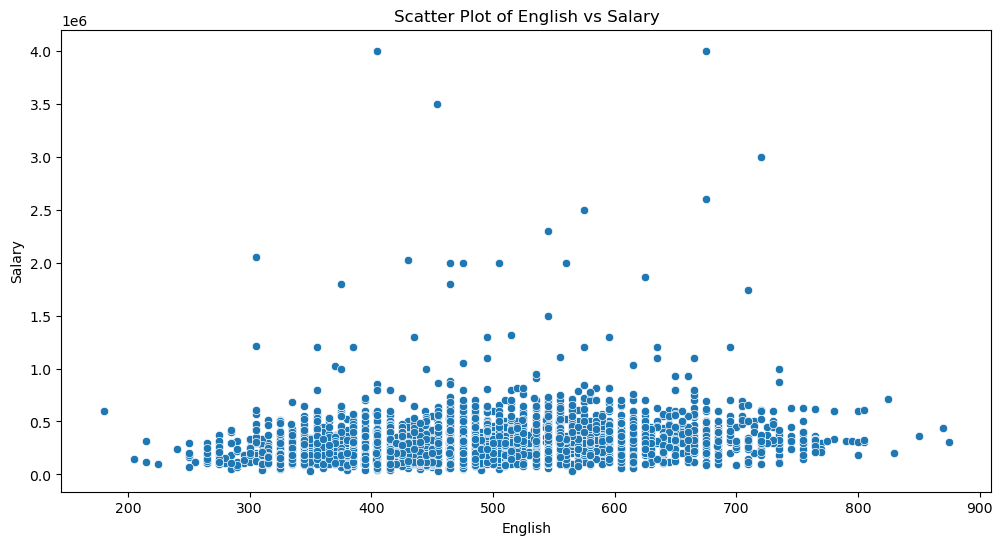

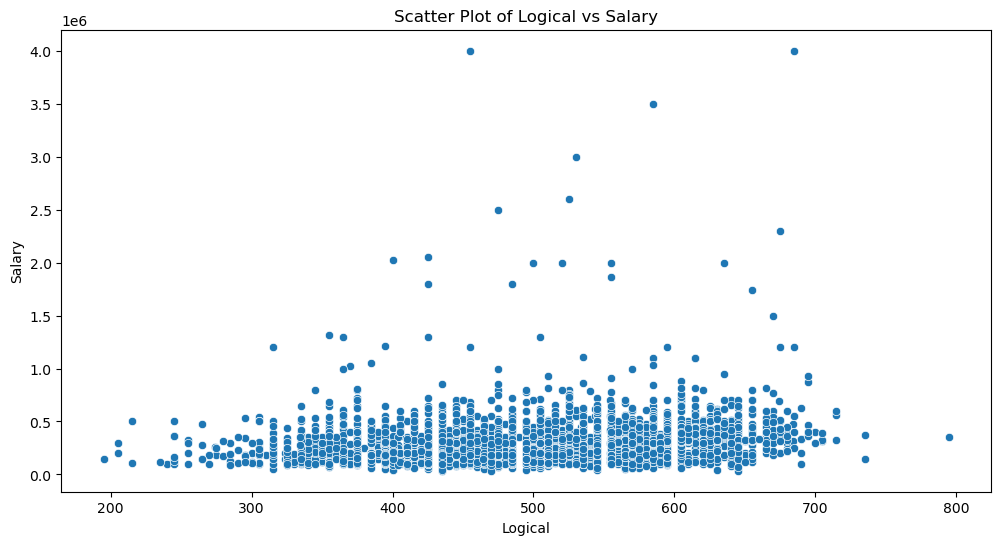

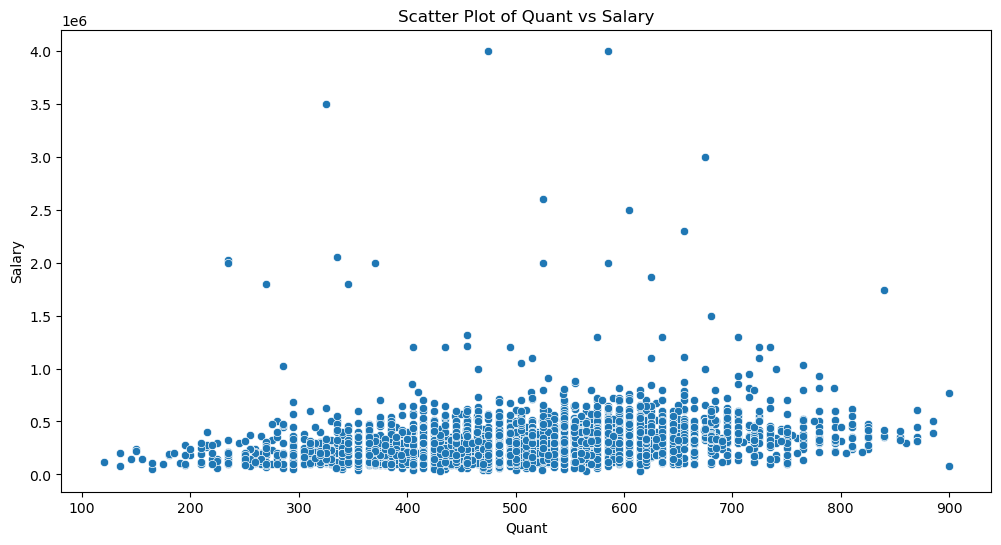

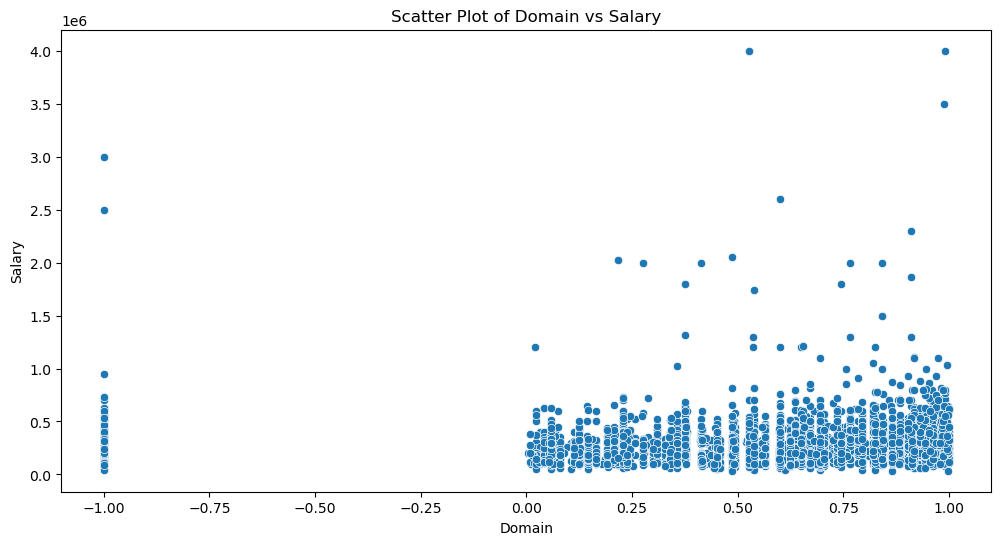

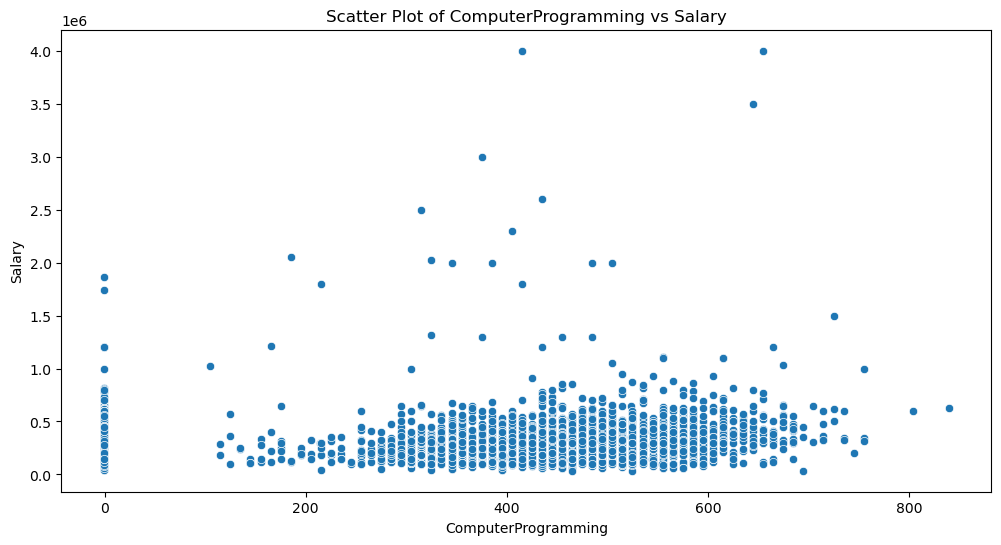

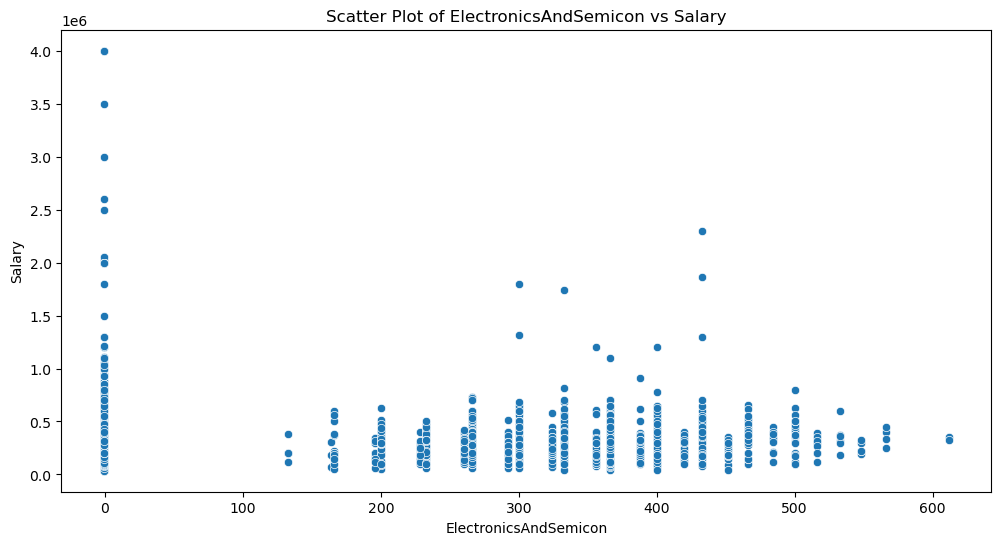

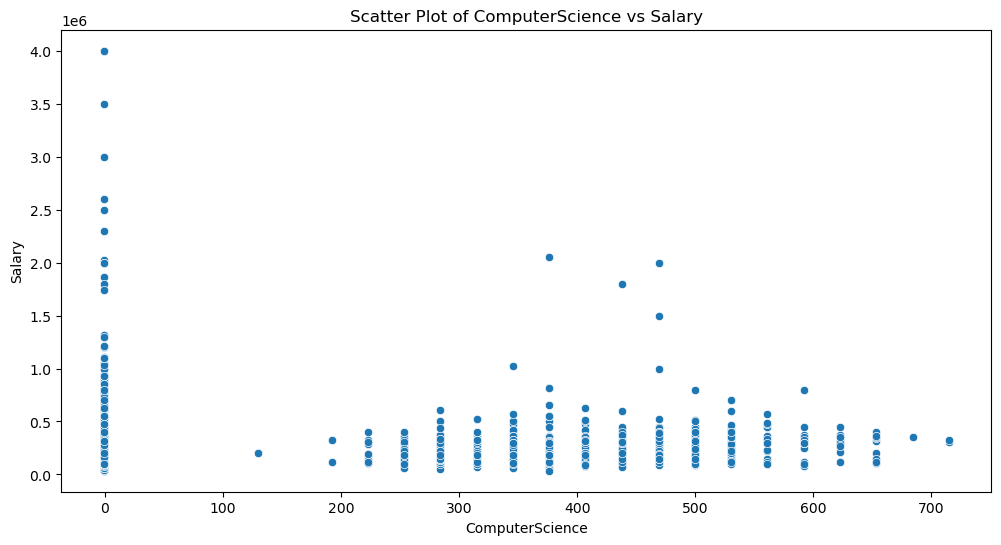

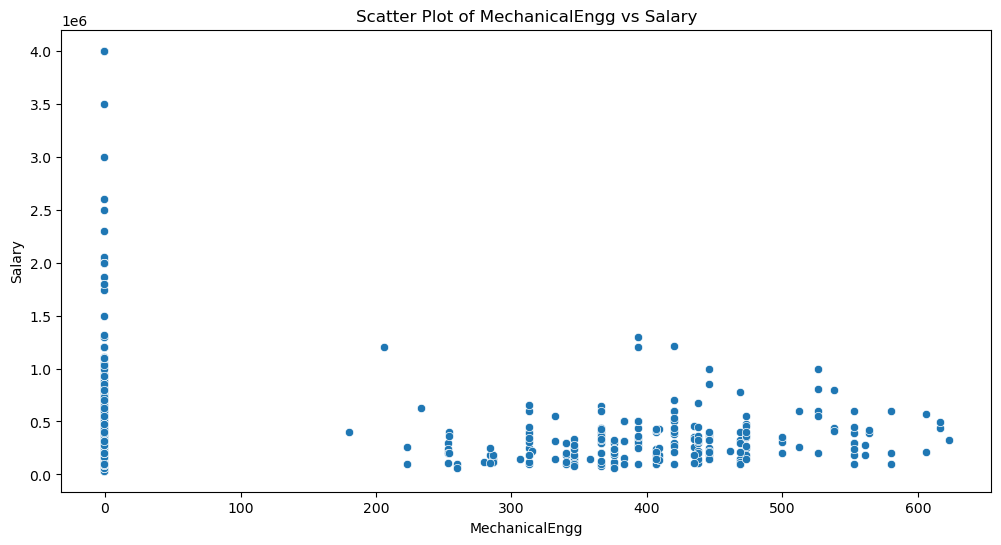

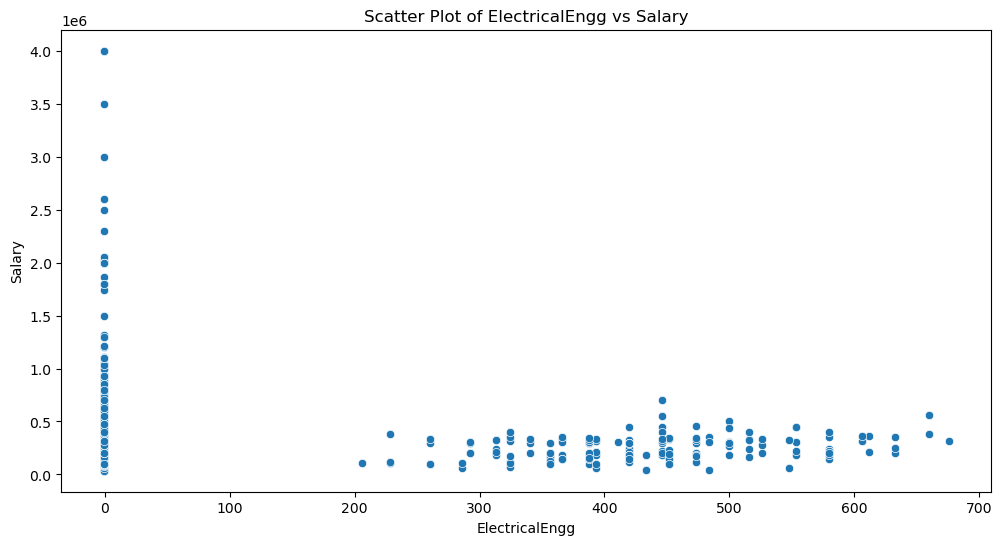

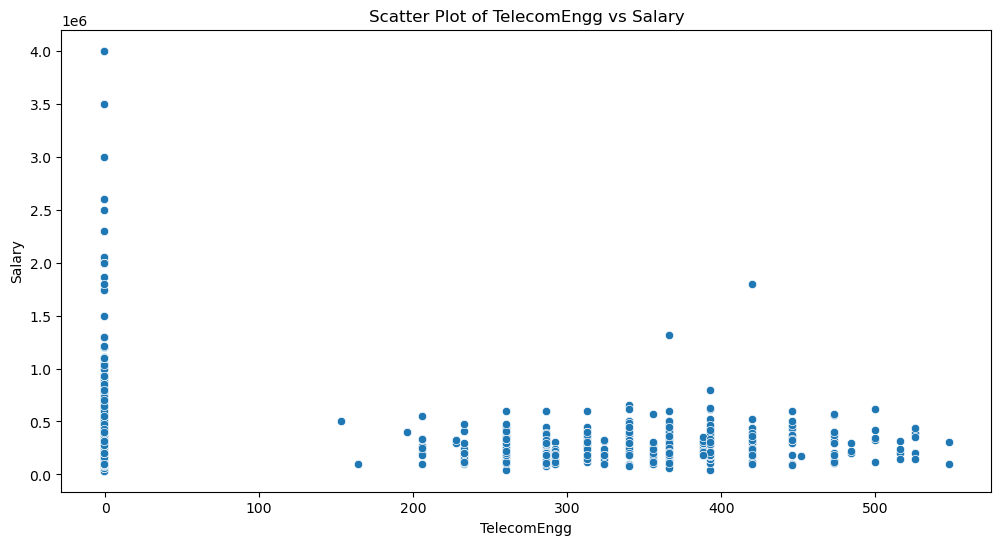

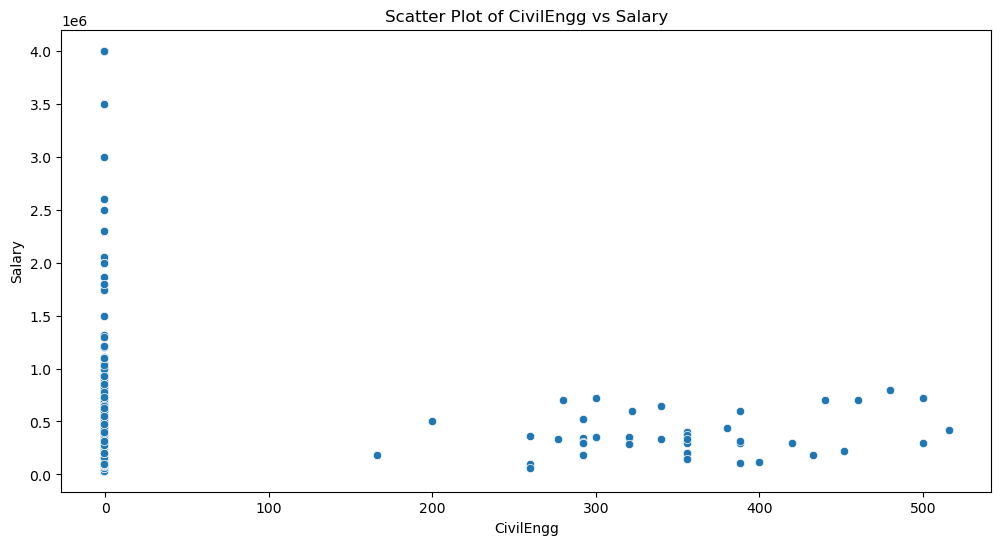

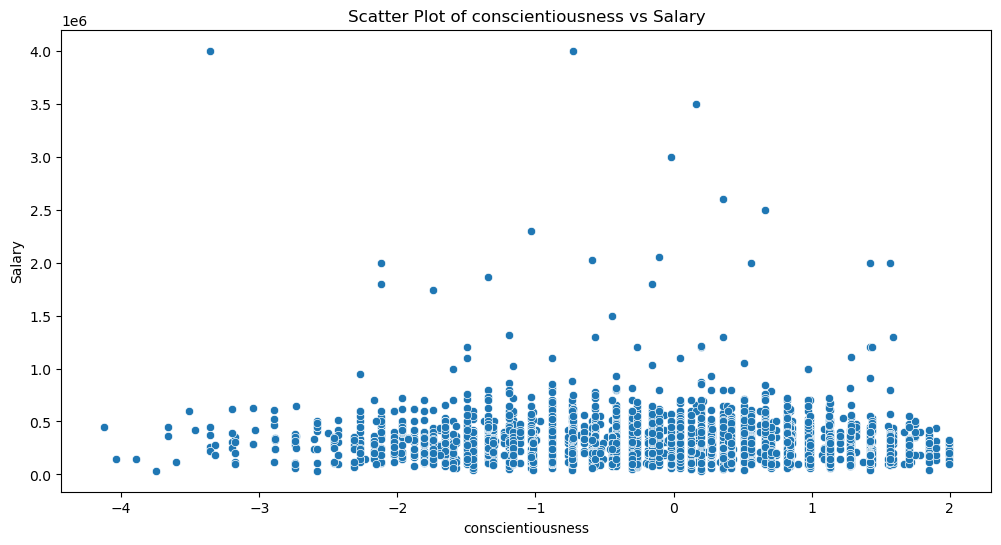

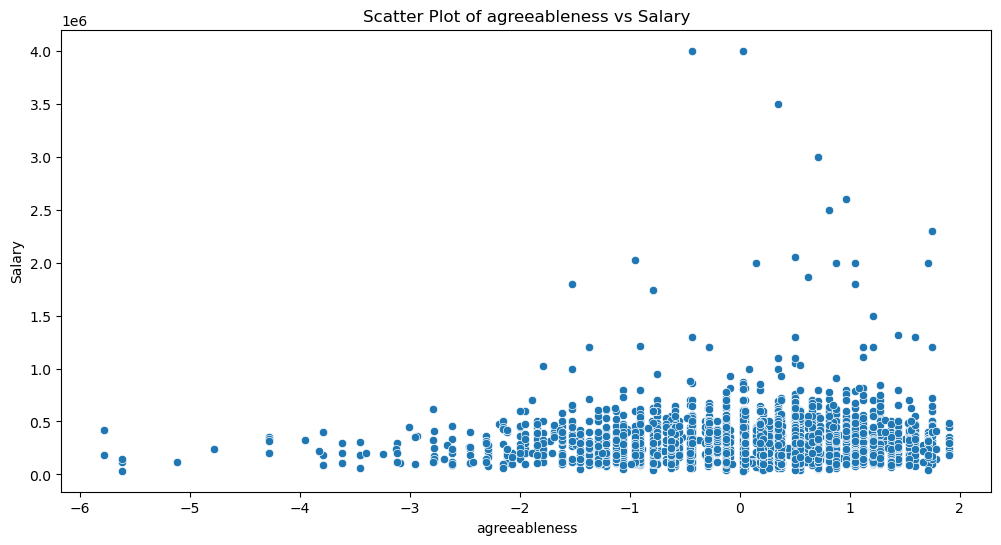

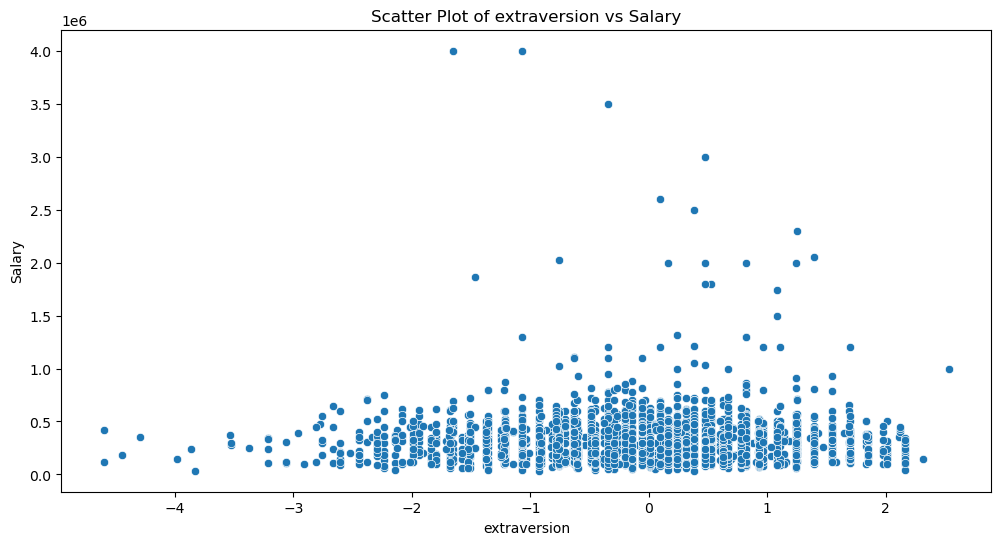

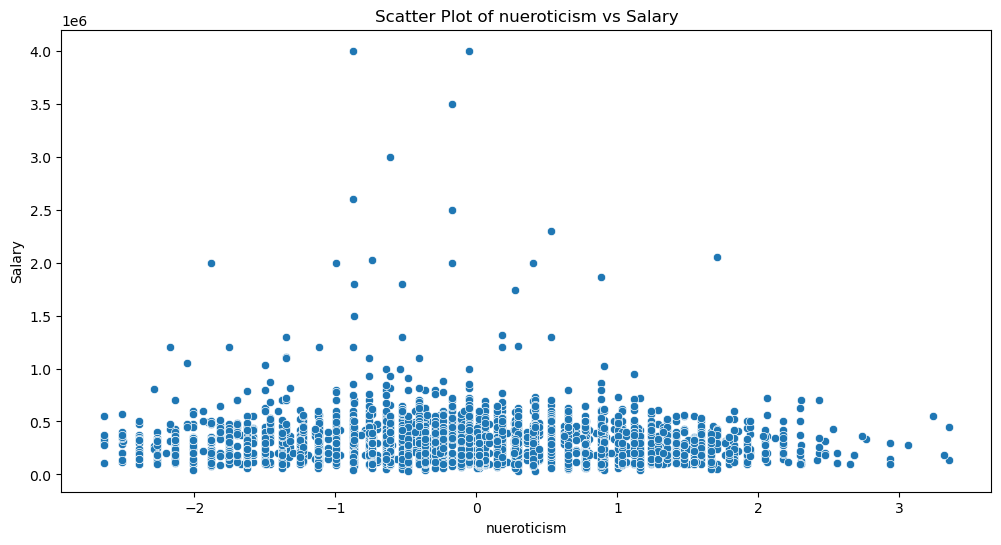

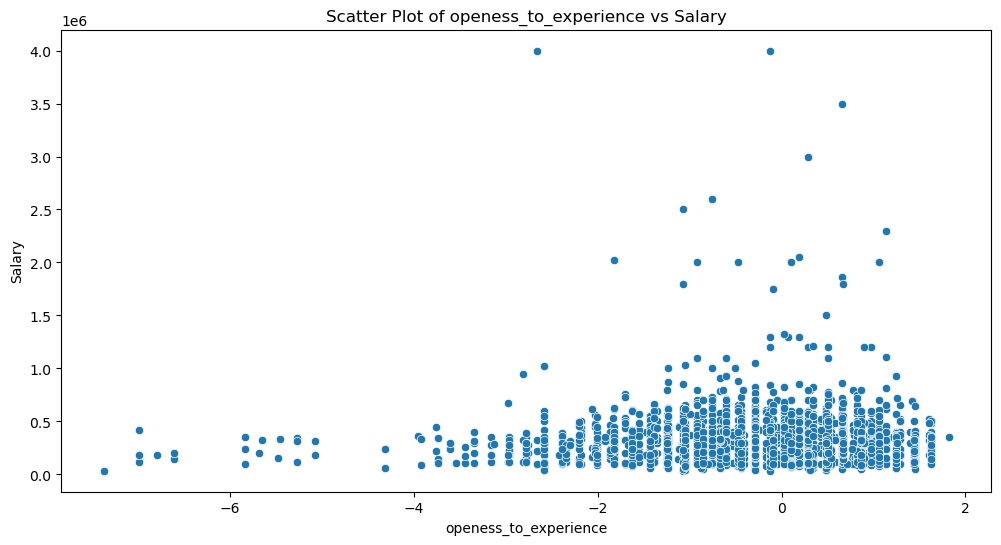

In [133]:
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=column, y='Salary', data=data)
    plt.title(f'Scatter Plot of {column} vs Salary')
    plt.xlabel(column)
    plt.ylabel('Salary')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 53.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 72.6% of the points

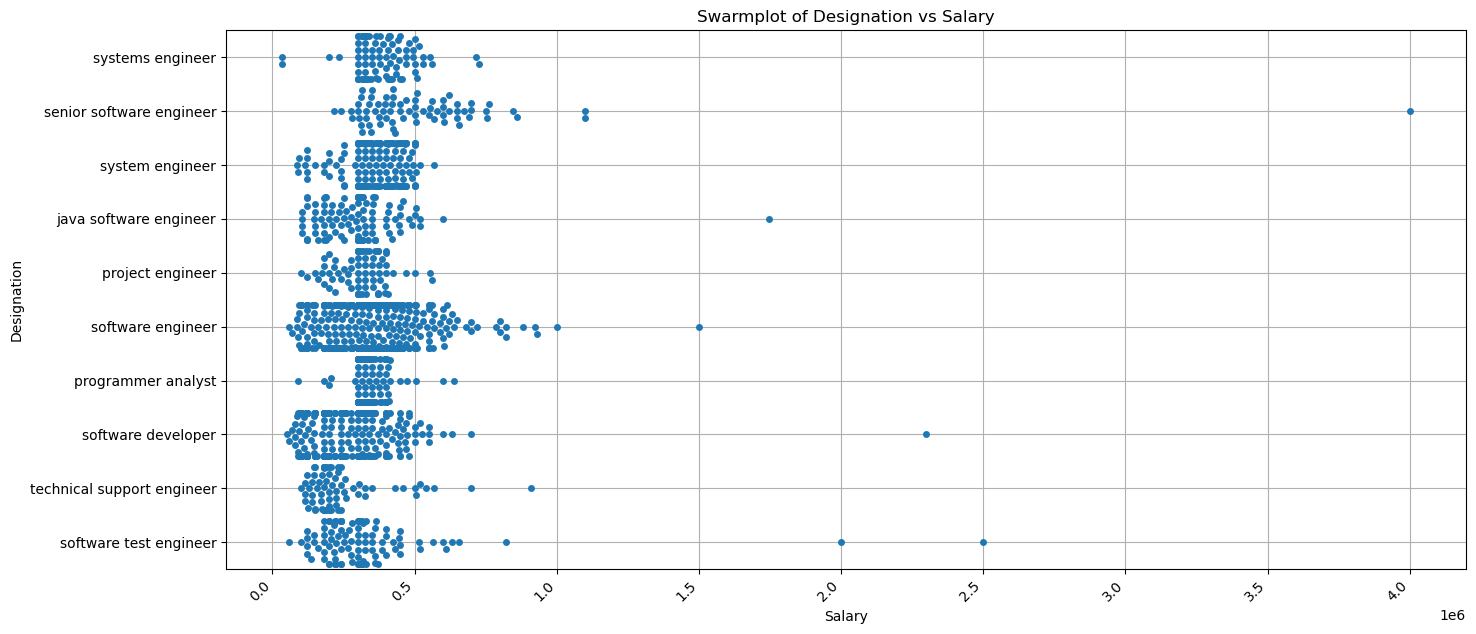

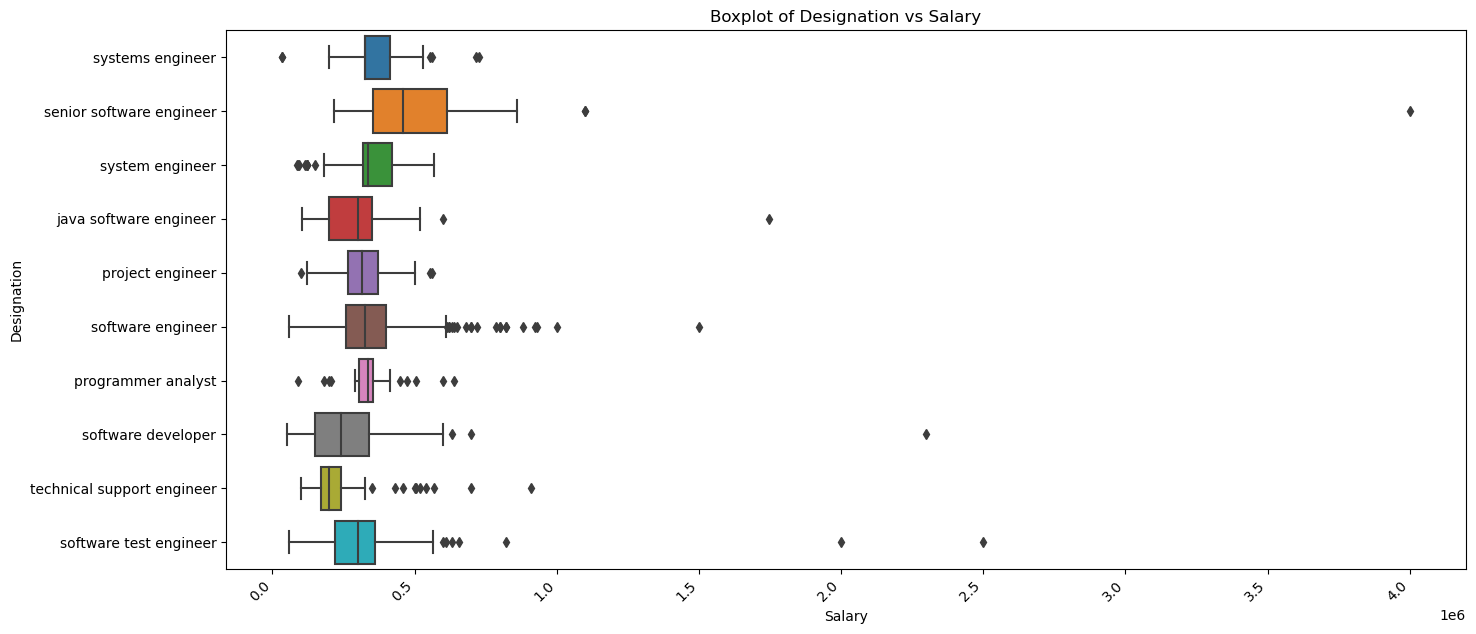

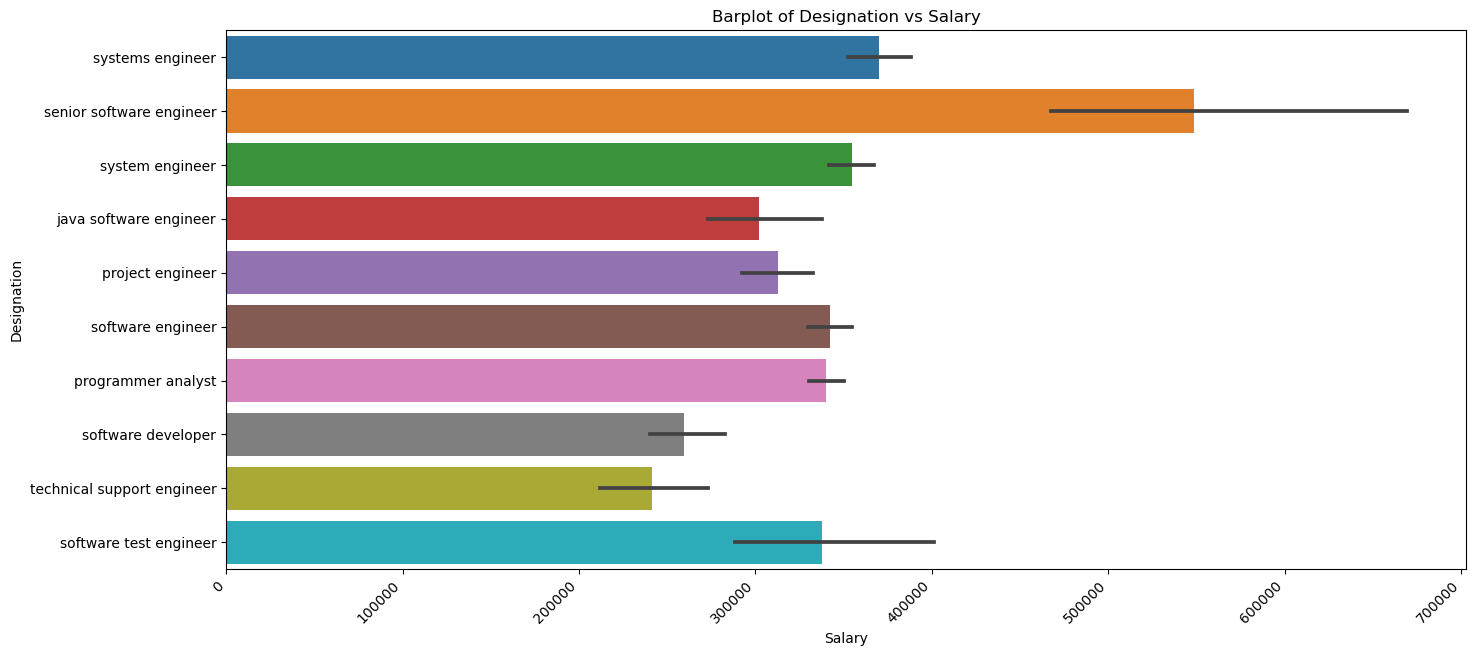

In [139]:
top_designations = data['Designation'].value_counts().nlargest(10).index
data_filtered = data[data['Designation'].isin(top_designations)]

# Swarmplot
plt.figure(figsize=(16, 7))
sns.swarmplot(x='Salary', y='Designation', data=data_filtered)
plt.title('Swarmplot of Designation vs Salary')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.xticks(rotation=45, ha='right')  
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(16,7))
sns.boxplot(x='Salary', y='Designation', data=data_filtered)
plt.title('Boxplot of Designation vs Salary')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.xticks(rotation=45, ha='right')  
plt.show()

# Barplot
plt.figure(figsize=(16, 7))
sns.barplot(x='Salary', y='Designation', data=data_filtered)
plt.title('Barplot of Designation vs Salary')
plt.xlabel('Salary')
plt.ylabel('Designation')
plt.xticks(rotation=45, ha='right')  
plt.show()

**observation**

- senior software engineer has maximum salary
- technical support engineer has minimum salary

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 82.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


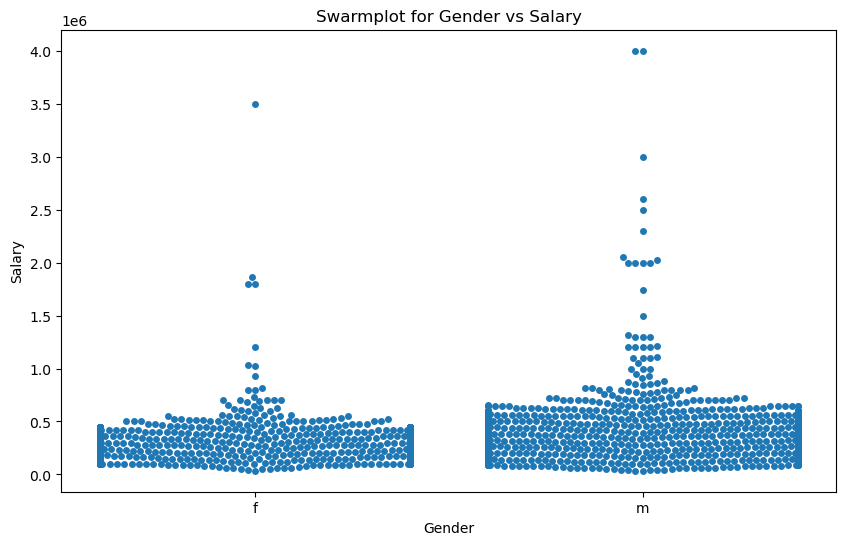

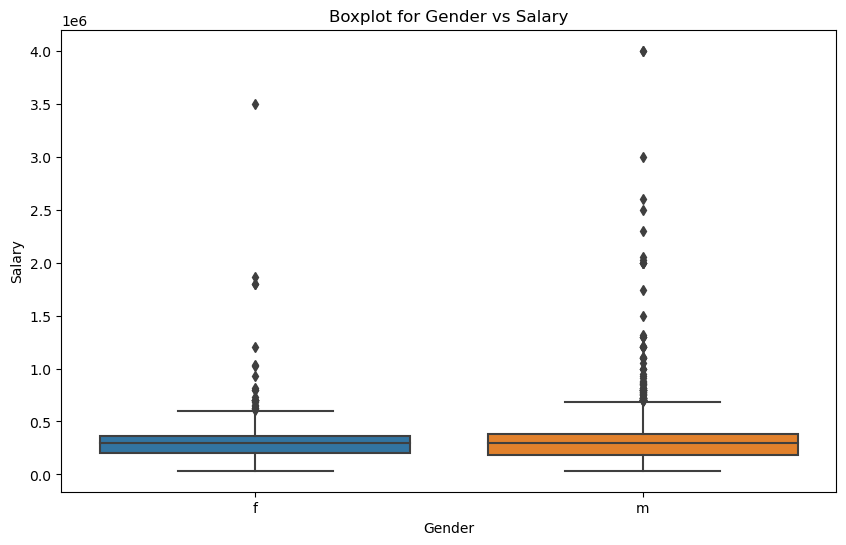

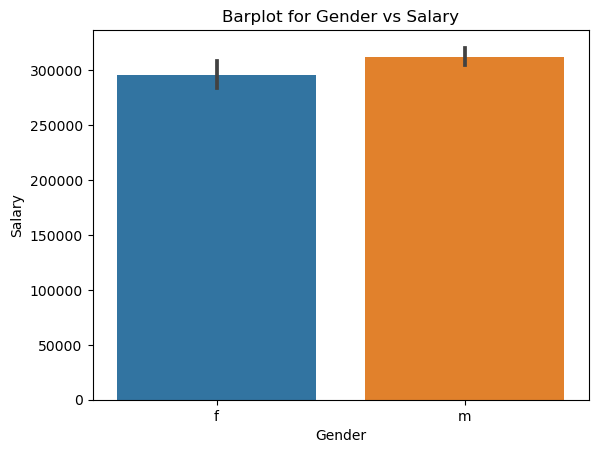

In [142]:
#swarmplot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Gender', y='Salary', data=data)
plt.title('Swarmplot for Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Salary', data=data)
plt.title('Boxplot for Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

#Barplot
sns.barplot(x='Gender', y='Salary', data=data)
plt.title('Barplot for Gender vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

# Onservation

- From the above plots we conclude that both genders have equal salary and male has more outliers 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


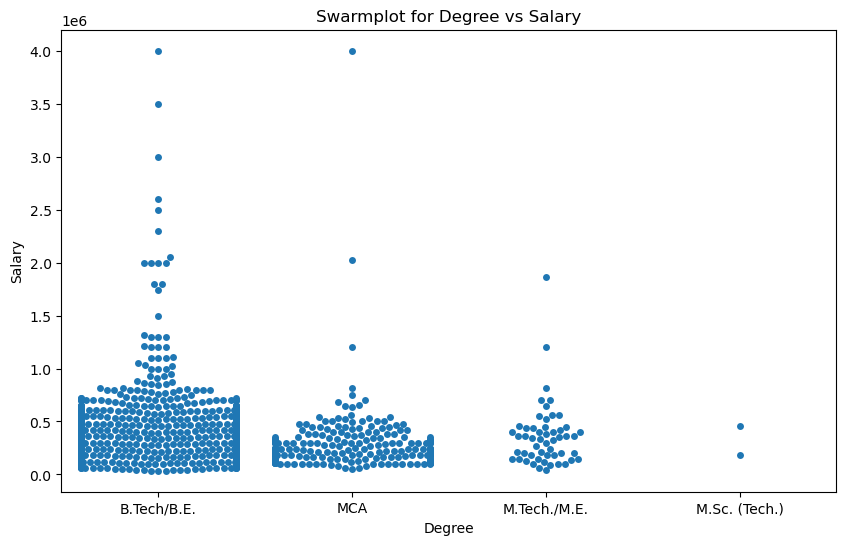

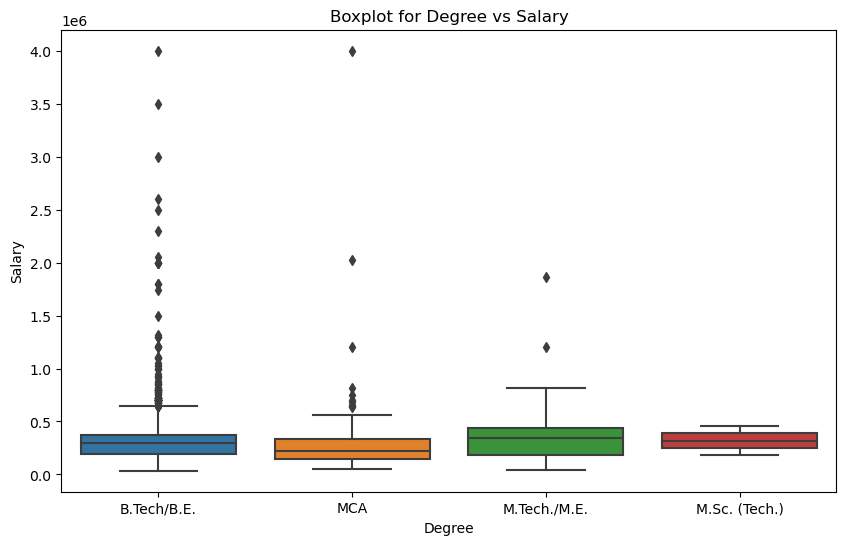

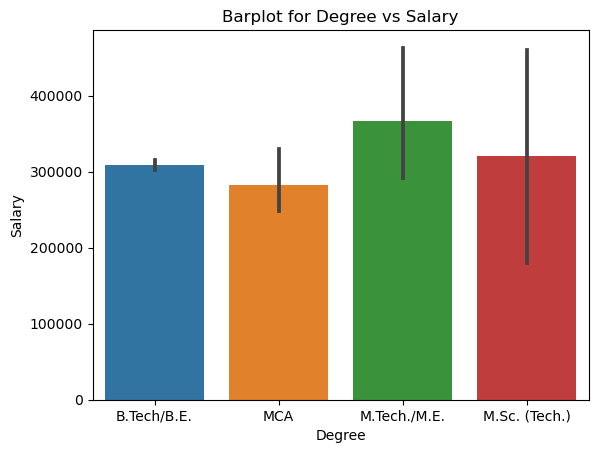

In [143]:
#swarmplot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Degree', y='Salary', data=data)
plt.title('Swarmplot for Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary', data=data)
plt.title('Boxplot for Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

#Barplot
sns.barplot(x='Degree', y='Salary', data=data)
plt.title('Barplot for Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

# Observation

- M.tech/M.E students have highest salary followed by M.SC(Tech)
- B.Tech/B.E students have outliers

<Figure size 1000x600 with 0 Axes>

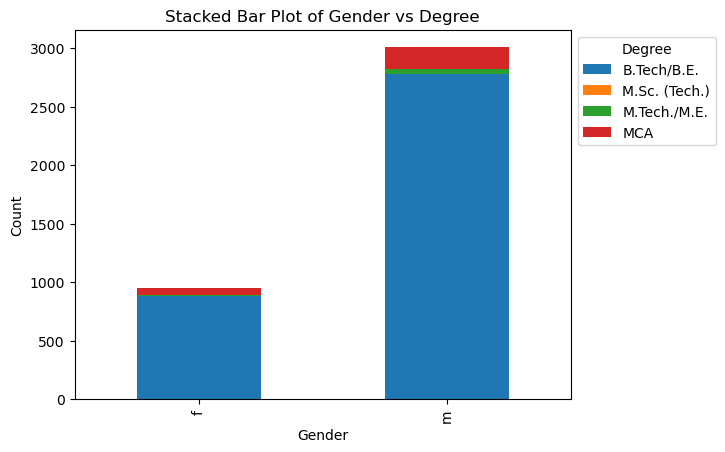

In [144]:
categorical_columns = ['Gender', 'Degree']
contingency_table = pd.crosstab(data['Gender'], data['Degree'])
# Stacked bar plot
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Gender vs Degree')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Degree', bbox_to_anchor=(1, 1))
plt.show()

**Observation**
- In both genders most of the students are from B.Tech followed by MCA

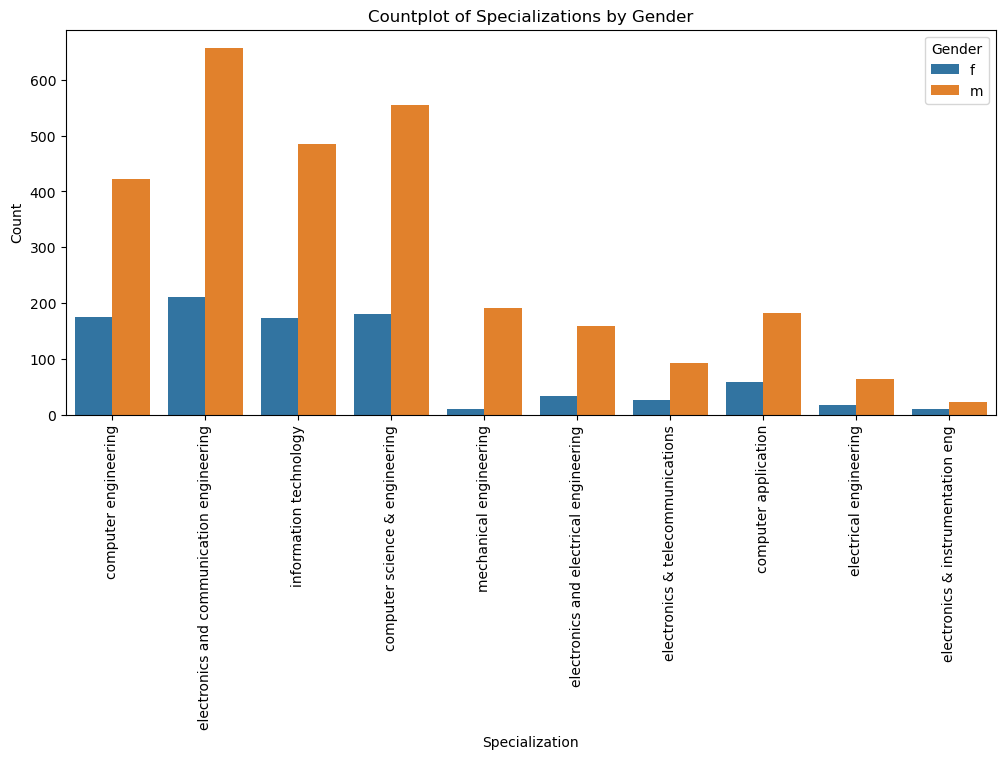

In [152]:
top_specializations = data['Specialization'].value_counts().nlargest(10).index
filtered_data = data[data['Specialization'].isin(top_specializations)]
plt.figure(figsize=(12,5))
sns.countplot(x='Specialization', hue='Gender', data=filtered_data)
plt.title('Countplot of Specializations by Gender')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

- In all the specializations Male students are more than Female

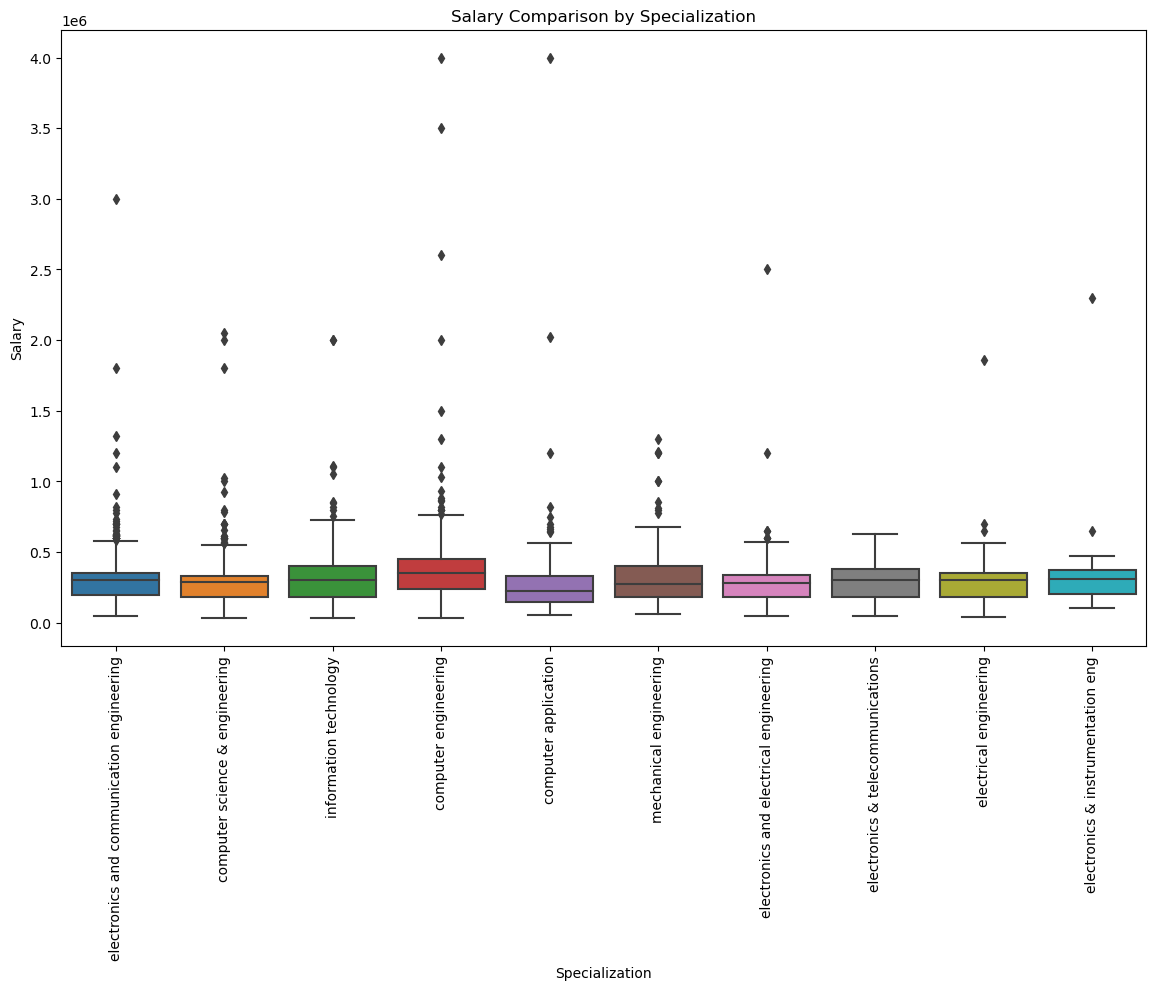

In [155]:
top_specializations = data['Specialization'].value_counts().nlargest(10).index
filtered_data = data[data['Specialization'].isin(top_specializations)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='Specialization', y='Salary', data=filtered_data, order=top_specializations)
plt.title('Salary Comparison by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

- Computetr enginerring background students have high salaries compared to other braches 

# Multivariate Analysis

In [111]:
correlation=data.corr()
correlation

C:\Users\Admin\AppData\Local\Temp\ipykernel_3348\4094602434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


ID    Salary  10percentage  12graduation  \
ID                     1.000000 -0.248732      0.045983      0.673828   
Salary                -0.248732  1.000000      0.176111     -0.160660   
10percentage           0.045983  0.176111      1.000000      0.273198   
12graduation           0.673828 -0.160660      0.273198      1.000000   
12percentage           0.007427  0.168387      0.642804      0.260889   
CollegeTier            0.033894 -0.179967     -0.125968      0.026989   
collegeGPA             0.047259  0.131170      0.312301      0.086880   
CollegeCityTier       -0.038207  0.013932      0.116370     -0.002870   
GraduationYear         0.027374 -0.009906     -0.013710      0.014210   
English                0.137315  0.181473      0.351221      0.149837   
Logical                0.102867  0.181925      0.314110      0.107246   
Quant                 -0.054017  0.233882      0.315396      0.002681   
Domain                -0.122565  0.104620      0.078206     -0.031373   
ComputerProgramming    0.018300  0.116969      0.052754     -0.048853   
ElectronicsAndSemicon -0.115904  0.000542      0.084924     -0.006396   
ComputerScience        0.485620 -0.102292     -0.014481      0.296598   
MechanicalEngg        -0.025117  0.017700      0.050078      0.036753   
ElectricalEngg         0.104830 -0.046517      0.072771      0.122916   
TelecomEngg           -0.047997 -0.023638      0.048320      0.024177   
CivilEngg             -0.017477  0.037538      0.029931     -0.004256   
conscientiousness      0.174037 -0.064481      0.067123      0.103448   
agreeableness          0.025061  0.057049      0.136331      0.041020   
extraversion           0.119666 -0.010532     -0.004990      0.060792   
nueroticism           -0.146348 -0.054375     -0.131989     -0.073292   
openess_to_experience  0.029503 -0.012081      0.037397     -0.015462   

                       12percentage  CollegeTier  collegeGPA  CollegeCityTier  \
ID                         0.007427     0.033894    0.047259        -0.038207   
Salary                     0.168387    -0.179967    0.131170         0.013932   
10percentage               0.642804    -0.125968    0.312301         0.116370   
12graduation               0.260889     0.026989    0.086880        -0.002870   
12percentage               1.000000    -0.100269    0.345299         0.128601   
CollegeTier               -0.100269     1.000000   -0.087325        -0.100736   
collegeGPA                 0.345299    -0.087325    1.000000         0.018584   
CollegeCityTier            0.128601    -0.100736    0.018584         1.000000   
GraduationYear            -0.012920    -0.005644    0.008733         0.008211   
English                    0.213469    -0.183705    0.108084         0.049856   
Logical                    0.243251    -0.182229    0.196904         0.020365   
Quant                      0.312657    -0.250496    0.218343         0.007995   
Domain                     0.074581    -0.061178    0.106584         0.011686   
ComputerProgramming        0.079941    -0.073962    0.136796         0.065870   
ElectronicsAndSemicon      0.118661    -0.030730    0.030494         0.039520   
ComputerScience           -0.041577     0.000410    0.008572        -0.010024   
MechanicalEngg             0.037606    -0.021132   -0.032017        -0.052677   
ElectricalEngg             0.063380     0.001159    0.050072         0.012157   
TelecomEngg                0.042561     0.003723   -0.005114         0.047670   
CivilEngg                  0.005850    -0.033598   -0.019068        -0.033563   
conscientiousness          0.057569     0.055014    0.069386         0.013656   
agreeableness              0.103919    -0.038058    0.068916         0.007290   
extraversion              -0.008968     0.010273   -0.032335        -0.009220   
nueroticism               -0.094070     0.024456   -0.074362         0.001384   
openess_to_experience      0.004325    -0.019283    0.028021        -0.018532   

                       

In [112]:
correlation['Salary']

ID                      -0.248732
Salary                   1.000000
10percentage             0.176111
12graduation            -0.160660
12percentage             0.168387
CollegeTier             -0.179967
collegeGPA               0.131170
CollegeCityTier          0.013932
GraduationYear          -0.009906
English                  0.181473
Logical                  0.181925
Quant                    0.233882
Domain                   0.104620
ComputerProgramming      0.116969
ElectronicsAndSemicon    0.000542
ComputerScience         -0.102292
MechanicalEngg           0.017700
ElectricalEngg          -0.046517
TelecomEngg             -0.023638
CivilEngg                0.037538
conscientiousness       -0.064481
agreeableness            0.057049
extraversion            -0.010532
nueroticism             -0.054375
openess_to_experience   -0.012081
Name: Salary, dtype: float64

<Axes: >

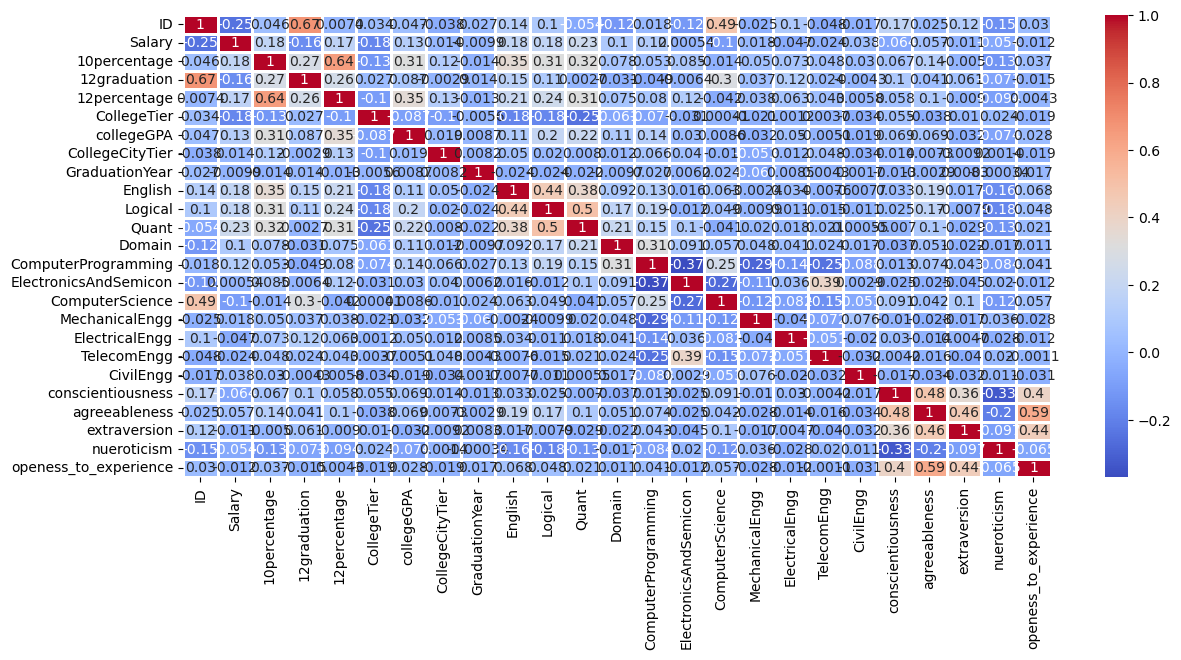

In [128]:
plt.figure(figsize=(14,6))
sns.heatmap(correlation,cmap='coolwarm',annot=True,linewidths=1)

# Research question

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
- Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [160]:
data['Designation'].value_counts()

software engineer                    537
software developer                   263
system engineer                      203
programmer analyst                   139
systems engineer                     117
                                    ... 
human resources intern                 1
senior quality assurance engineer      1
clerical assistant                     1
delivery software engineer             1
jr. software developer                 1
Name: Designation, Length: 417, dtype: int64

In [161]:
data['Designation'].nunique()

417

In [162]:
data[data['Designation']=='hardware engineer']

ID    Salary        DOJ        DOL        Designation     JobCity  \
197   1001099  240000.0 2014-09-01 2015-12-31  hardware engineer     chennai   
802   1077576  450000.0 2014-02-01 2015-12-31  hardware engineer   Bangalore   
839    693533  315000.0 2013-08-01 2015-02-01  hardware engineer      Mumbai   
1886   354739  105000.0 2014-03-01 2015-04-01  hardware engineer   Bangalore   
2070   555964  180000.0 2014-05-01 2015-12-31  hardware engineer   Bangalore   
2533   909998  400000.0 2014-07-01 2015-05-01  hardware engineer  Coimbatore   
3438   341274  400000.0 2013-10-01 2015-12-31  hardware engineer          -1   
3547   212076  160000.0 2014-01-01 2015-12-31  hardware engineer      Mumbai   

     Gender        DOB  10percentage  \
197       m 1993-06-06         81.00   
802       m 1991-07-26         83.30   
839       m 1989-10-02         78.80   
1886      m 1988-08-12         56.00   
2070      f 1991-10-18         86.40   
2533      f 1993-02-11         88.00   
3438      m 1990-12-08         90.58   
3547      m 1989-02-25         55.33   

                                                10board  ...  ComputerScience  \
197                                         state board  ...               -1   
802                                         state board  ...               -1   
839                                                cbse  ...               -1   
1886                                              state  ...               -1   
2070                                                  0  ...               -1   
2533                                        state board  ...               -1   
3438  maharashtra state board of secondary and highe...  ...               -1   
3547                                                  0  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg conscientiousness  \
197               -1            580           -1        -1            0.1282   
802               -1             -1           -1        -1           -0.0154   
839               -1             -1          366        -1            0.2718   
1886              -1             -1           -1        -1           -1.8083   
2070              -1             -1           -1        -1            0.4155   
2533              -1             -1           -1        -1            0.1282   
3438              -1             -1           -1        -1            0.1623   
3547              -1             -1           -1        -1           -0.2628   

      agreeableness  extraversion nueroticism  openess_to_experience  
197         -0.6201        0.0100     0.77980                -0.8608  
802         -0.6201        0.3174    -1.50210                -1.8189  
839          1.2114        0.1637    -0.99500                 0.4805  
1886         0.3838        0.2729     0.17980                -0.1295  
2070         0.5454       -1.0659     0.27270                 1.0554  
2533         0.8784        0.4711    -1.50210                -0.0943  
3438         0.6568       -0.4891    -1.14217                -0.4455  
3547         0.0328        0.8171     0.53230                -0.2875  

[8 rows x 36 columns]

In [163]:
data[data['Designation']=='programmer analyst']

ID    Salary        DOJ        DOL         Designation  \
24     963123  335000.0 2014-06-01 2015-06-01  programmer analyst   
44     247617  380000.0 2012-05-01 2015-04-01  programmer analyst   
75    1067148  300000.0 2014-09-01 2015-12-31  programmer analyst   
114     50876  640000.0 2010-04-01 2015-12-31  programmer analyst   
124    614524  315000.0 2014-11-01 2015-12-31  programmer analyst   
...       ...       ...        ...        ...                 ...   
3539    33117  475000.0 2011-03-01 2015-12-31  programmer analyst   
3777   656694  400000.0 2013-11-01 2015-04-01  programmer analyst   
3820   661378  335000.0 2014-02-01 2015-12-31  programmer analyst   
3880  1233727  300000.0 2015-06-01 2015-12-31  programmer analyst   
3973   755067  335000.0 2013-08-01 2015-12-31  programmer analyst   

          JobCity Gender        DOB  10percentage      10board  ...  \
24      Hyderabad      m 1993-06-28         88.00  state board  ...   
44     Bangalore       f 1989-01-06         84.50            0  ...   
75      Bangalore      m 1992-09-03         70.60         cbse  ...   
114     Bangalore      m 1987-04-24         78.00            0  ...   
124            -1      f 1991-02-06         82.30         cbse  ...   
...           ...    ...        ...           ...          ...  ...   
3539    Hyderabad      m 1986-08-17         64.80         cbse  ...   
3777  Bhubaneswar      f 1991-05-19         84.40         cbse  ...   
3820      kolkata      f 1991-05-04         84.40         cbse  ...   
3880      Gurgaon      m 1994-06-30         81.00         cbse  ...   
3973           -1      m 1990-05-20         66.85  state board  ...   

      ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg  \
24                346              -1             -1           -1        -1   
44                 -1              -1             -1           -1        -1   
75                 -1              -1             -1           -1        -1   
114                -1              -1             -1           -1        -1   
124                -1              -1            393           -1        -1   
...               ...             ...            ...          ...       ...   
3539               -1              -1             -1           -1        -1   
3777               -1              -1             -1          340        -1   
3820               -1              -1             -1           -1        -1   
3880              592              -1             -1           -1        -1   
3973               -1              -1             -1           -1        -1   

     conscientiousness  agreeableness  extraversion nueroticism  \
24              0.4155         0.8027        0.1357     -0.9950   
44              0.5100         0.6568       -0.6343      0.2973   
75              0.5591         0.2124       -1.2196     -0.7415   
114            -0.2628        -0.5913        0.2366     -0.1727   
124            -0.1590        -1.1196        1.2396      1.6672   
...                ...            ...           ...         ...   
3539           -0.4173         0.1888        0.3817      0.1798   
3777            1.4208         0.3789        1.0859     -0.6147   
3820            0.2718        -1.1196       -0.4511     -0.4879   
3880           -1.3080         0.2124        1.3933      2.9349   
3973            0.2718        -0.1206       -1.2196     -0.3612   

      openess_to_experience  
24                  -0.6692  
44                   0.1864  
75                  -0.8608  
114                  0.8183  
124                  0.6721  
...                     ...  
3539                 0.5024  
3777                 0.8637  
3820                -0.8608  
3880                 0.4805  
3973                -0.6692  

[139 rows x 36 columns]

In [164]:
data[data['Designation']=='system engineer']

ID    Salary        DOJ        DOL      Designation    JobCity  \
5     1027655  300000.0 2014-06-01 2015-12-31  system engineer  Hyderabad   
65    1044453  310000.0 2014-02-01 2014-05-01  system engineer     Mysore   
66     125529  455000.0 2011-01-01 2013-09-01  system engineer  Bangalore   
70     801755  320000.0 2014-03-01 2015-12-31  system engineer    Chennai   
78    1168608  325000.0 2014-12-01 2015-04-01  system engineer     Mysore   
...       ...       ...        ...        ...              ...        ...   
3841   868791  325000.0 2014-07-01 2015-12-31  system engineer  Bangalore   
3859  1203568  300000.0 2014-09-01 2015-04-01  system engineer    Chennai   
3933   116358  490000.0 2011-02-01 2015-12-31  system engineer    Chennai   
3966   224873  450000.0 2012-10-01 2015-12-31  system engineer     mumbai   
3985   358393  430000.0 2013-03-01 2015-12-31  system engineer    Gurgaon   

     Gender        DOB  10percentage  \
5         m 1992-07-02         89.92   
65        m 1990-12-02         89.37   
66        m 1989-08-29         90.00   
70        m 1992-12-12         89.00   
78        f 1993-05-05         86.40   
...     ...        ...           ...   
3841      m 1993-05-19         83.60   
3859      f 1993-04-20         96.80   
3933      m 1989-01-21         87.00   
3966      m 1990-03-15         89.60   
3985      f 1990-05-14         90.40   

                                                10board  ...  ComputerScience  \
5                                           state board  ...              407   
65                                          state board  ...               -1   
66    state board of secondary education, andhra pra...  ...               -1   
70                                          state board  ...               -1   
78                                                 cbse  ...              530   
...                                                 ...  ...              ...   
3841                                        state board  ...              407   
3859                                               cbse  ...               -1   
3933                                                ssc  ...               -1   
3966                              karnataka state board  ...               -1   
3985                                               cbse  ...               -1   

      MechanicalEngg ElectricalEngg  TelecomEngg CivilEngg conscientiousness  \
5                 -1             -1           -1        -1           -0.3027   
65                -1             -1           -1        -1            0.9900   
66                -1             -1           -1        -1           -0.2628   
70                -1            606           -1        -1           -1.4517   
78                -1             -1           -1        -1            0.8463   
...              ...            ...          ...       ...               ...   
3841              -1             -1           -1        -1            1.5644   
3859              -1             -1           -1        -1            0.1282   
3933              -1             -1           -1        -1            0.6646   
3966              -1             -1           -1        -1           -1.6538   
3985              -1             -1           -1        -1            0.2782   

      agreeableness  extraversion nueroticism  openess_to_experience  
5           -0.6201       -2.2954     -0.7415                -0.8608  
65           1.2114       -0.2974     -1.1218                 1.2470  
66          -0.1232        0.0914     -1.2303                -0.1295  
70          -1.4526       -1.2196      1.7940                -2.3937  
78           1.3779        1.3933      0.6530                -0.2859  
...             ...           ...         ...                    ...  
3841         0.7119        1.5470     -2.1360                -0.0943  
3859         0.7119        0.4711     -0.9950                 1.0554  
3933         0.1888        0.236

In [167]:
analysts = data[data['Designation'].str.contains('Analyst',case=False, na=False)]
print("Designation Counts with 'Analyst':")
print(analysts['Designation'].value_counts())

Designation Counts with 'Analyst':
programmer analyst                    139
data analyst                           48
business analyst                       48
qa analyst                             28
quality analyst                        24
research analyst                       15
operations analyst                     12
systems analyst                        11
business analyst consultant             9
it analyst                              7
information security analyst            6
technology analyst                      6
programmer analyst trainee              5
software quality assurance analyst      5
business system analyst                 4
it business analyst                     4
marketing analyst                       4
senior business analyst                 3
desktop support analyst                 3
business technology analyst             3
business intelligence analyst           3
help desk analyst                       2
portfolio analyst                       2

C:\Users\Admin\AppData\Local\Temp\ipykernel_3348\1467085589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Salary_in_lakhs'] = filtered_data['Salary'] / 100000


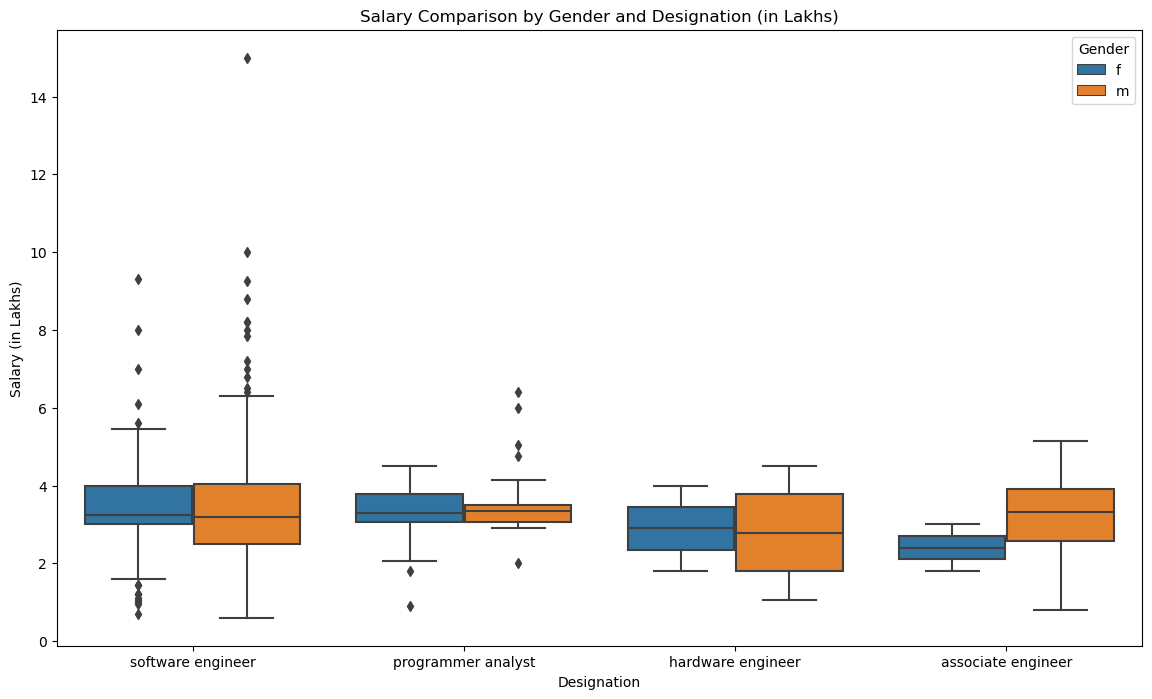

In [168]:
selected_designations = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']
# Filter the data for selected designations
filtered_data = data[data['Designation'].isin(selected_designations)]

# Convert Salary to lakhs for selected designations
filtered_data['Salary_in_lakhs'] = filtered_data['Salary'] / 100000

# Boxplot for salary comparison by gender and designation
plt.figure(figsize=(14, 8))
sns.boxplot(x='Designation', y='Salary_in_lakhs', hue='Gender', data=filtered_data)
plt.title('Salary Comparison by Gender and Designation (in Lakhs)')
plt.xlabel('Designation')
plt.ylabel('Salary (in Lakhs)')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_3348\1474121829.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_graduates['Salary_in_lakhs'] = cs_graduates['Salary'] / 100000


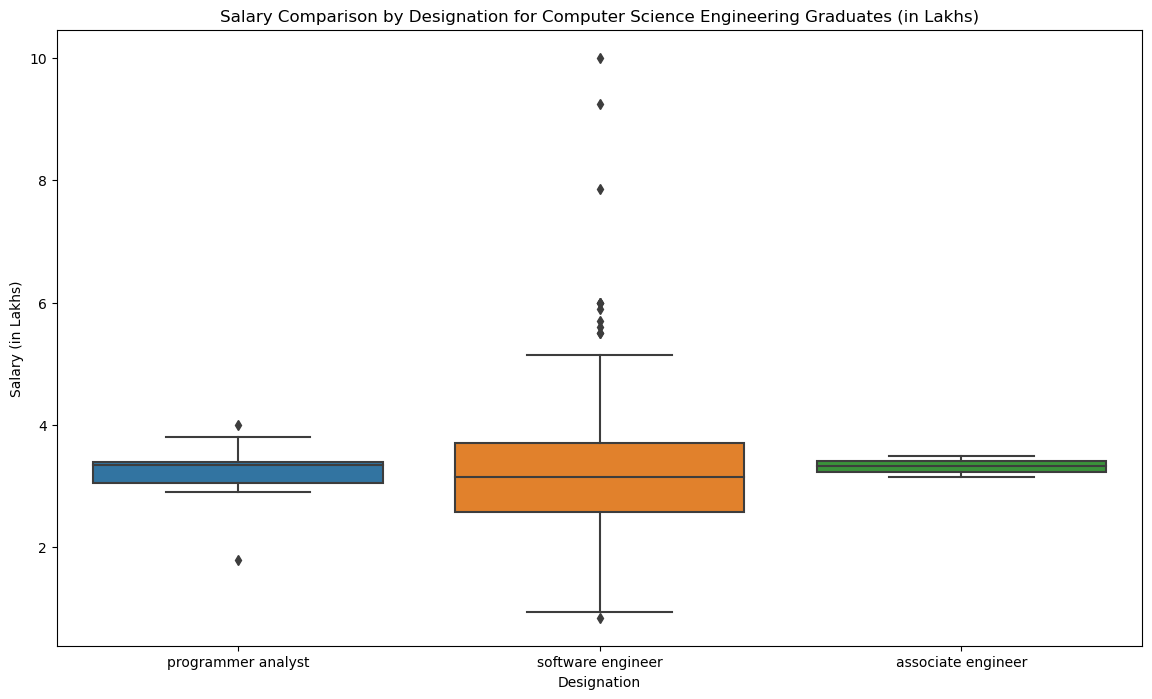

In [170]:
selected_designations = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']

# Filter the data for Computer Science Engineering graduates with selected specializations and designations
cs_graduates = data[(data['Specialization'] == 'computer science & engineering') &
                     (data['Designation'].isin(selected_designations)) &
                     (data['Degree'] == 'B.Tech/B.E.')]

# Convert Salary to lakhs for Computer Science Engineering graduates with selected designations
cs_graduates['Salary_in_lakhs'] = cs_graduates['Salary'] / 100000

# Boxplot for salary comparison by designation for Computer Science Engineering graduates
plt.figure(figsize=(14, 8))
sns.boxplot(x='Designation', y='Salary_in_lakhs', data=cs_graduates)
plt.title('Salary Comparison by Designation for Computer Science Engineering Graduates (in Lakhs)')
plt.xlabel('Designation')
plt.ylabel('Salary (in Lakhs)')
plt.show()

- Looking at above plot It completely supports the claim of Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.  

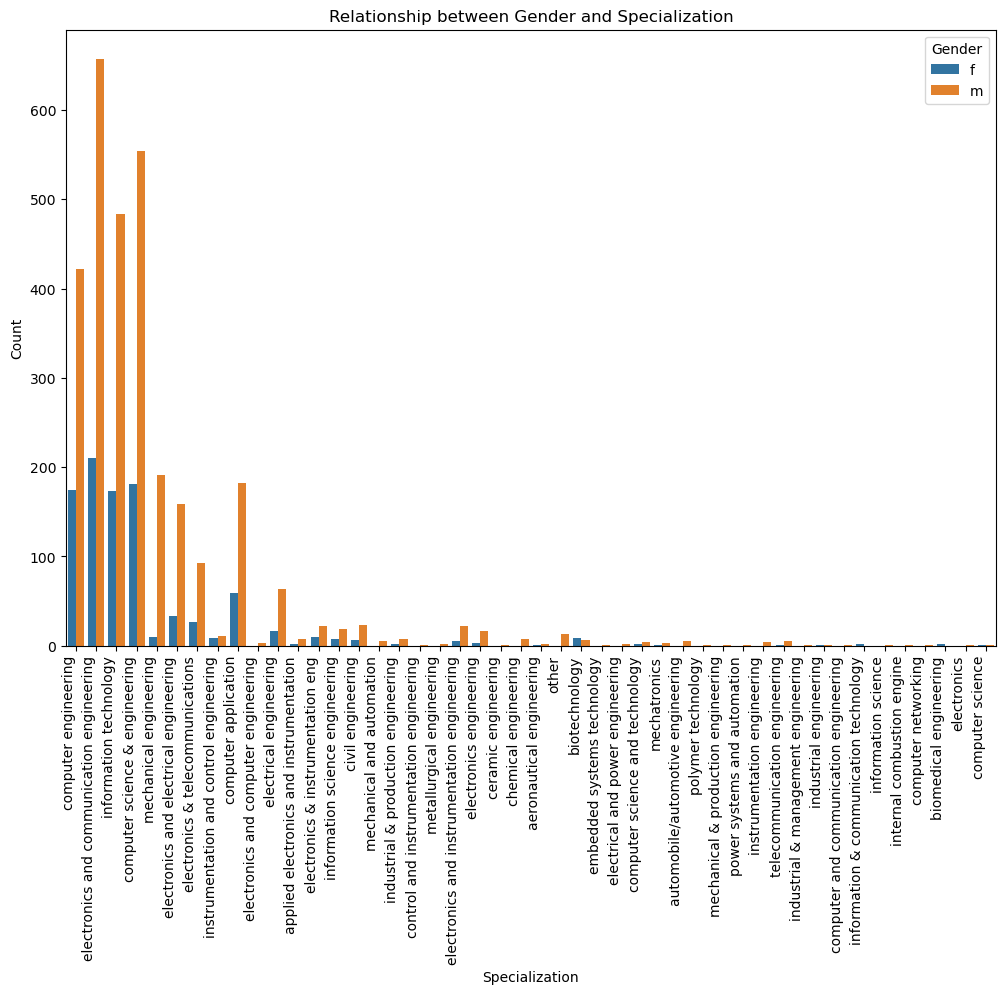

In [172]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Specialization', hue='Gender', data=data)
plt.title('Relationship between Gender and Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

- From the above plot we conclude that Male students are doing more specialization.